| **Columna**        | **Descripción**                                                                     |
| ------------------ | ----------------------------------------------------------------------------------- |
| `Id`               | Identificador único del vehículo (interno del dataset).                             |
| `Model`            | Modelo del vehículo (en este caso, todos parecen ser "TOYOTA Corolla").             |
| `Price`            | Precio de venta del vehículo en euros (€).                                          |
| `Age_08_04`        | Edad del vehículo en meses al 08/2004 (agosto de 2004).                             |
| `Mfg_Month`        | Mes de fabricación.                                                                 |
| `Mfg_Year`         | Año de fabricación.                                                                 |
| `KM`               | Kilometraje del vehículo (en kilómetros).                                           |
| `Fuel_Type`        | Tipo de combustible (`Petrol`, `Diesel` o `CNG`).                                   |
| `HP`               | Potencia del motor en caballos de fuerza (horsepower).                              |
| `Met_Color`        | Si el vehículo tiene pintura metalizada (1 = sí, 0 = no).                           |
| `Color`            | Color del vehículo.                                                                 |
| `Automatic`        | Si el vehículo es automático (1 = sí, 0 = no).                                      |
| `CC`               | Cilindrada del motor en centímetros cúbicos (cubic centimeters).                    |
| `Doors`            | Número de puertas.                                                                  |
| `Cylinders`        | Número de cilindros del motor.                                                      |
| `Gears`            | Número de marchas (velocidades de transmisión).                                     |
| `Quarterly_Tax`    | Impuesto trimestral que se paga por el vehículo (en euros).                         |
| `Weight`           | Peso del vehículo en kilogramos.                                                    |
| `Mfr_Guarantee`    | Si tiene garantía del fabricante (1 = sí, 0 = no).                                  |
| `BOVAG_Guarantee`  | Garantía de la asociación BOVAG (en Países Bajos) (1 = sí, 0 = no).                 |
| `Guarantee_Period` | Período de garantía restante (en meses).                                            |
| `ABS`              | Si tiene sistema antibloqueo de frenos (Anti-lock Braking System) (1 = sí, 0 = no). |
| `Airbag_1`         | Airbag para el conductor (1 = sí, 0 = no).                                          |
| `Airbag_2`         | Airbag para el acompañante (1 = sí, 0 = no).                                        |
| `Airco`            | Si tiene aire acondicionado (1 = sí, 0 = no).                                       |
| `Automatic_airco`  | Aire acondicionado automático (1 = sí, 0 = no).                                     |
| `Boardcomputer`    | Si tiene computadora de a bordo (1 = sí, 0 = no).                                   |
| `CD_Player`        | Si tiene reproductor de CD (1 = sí, 0 = no).                                        |
| `Central_Lock`     | Si tiene cierre centralizado (1 = sí, 0 = no).                                      |
| `Powered_Windows`  | Si tiene levantavidrios eléctricos (1 = sí, 0 = no).                                |
| `Power_Steering`   | Dirección asistida (1 = sí, 0 = no).                                                |
| `Radio`            | Si tiene radio (1 = sí, 0 = no).                                                    |
| `Mistlamps`        | Si tiene luces antiniebla (1 = sí, 0 = no).                                         |
| `Sport_Model`      | Si es versión deportiva (1 = sí, 0 = no).                                           |
| `Backseat_Divider` | Si el asiento trasero es divisible/abatible (1 = sí, 0 = no).                       |
| `Metallic_Rim`     | Si tiene llantas metálicas (1 = sí, 0 = no).                                        |
| `Radio_cassette`   | Si tiene radio con cassette (1 = sí, 0 = no).                                       |
| `Tow_Bar`          | Si tiene gancho de remolque (1 = sí, 0 = no).                                       |


In [1]:
%load_ext autoreload
%autoreload 2


In [2]:
from helpers import histogram,boxplot,scatter_plot , limpiar_outliers_iqr , limpiar_outliers_z_core,resumen_outliers , histogram_por_lotes , boxplots_por_lotes ,bar_por_lotes,mostrar_matriz_correlacion ,pares_correlacion_altas,scatter_por_lotes ,split ,filtrar_columna_por_rango ,obtener_correlaciones_target ,correlacion_significativa


# Carga de datos

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



url = "https://raw.githubusercontent.com/dodobeatle/dataeng-datos/refs/heads/main/ToyotaCorolla.csv"
df_toyota = pd.read_csv(url)
df_toyota.head(10)
df_toyota.columns = [
    col.strip().lower().replace(' ', '_') for col in df_toyota.columns
]


In [4]:
df_toyota.head(10)

id                                           model  price  age_08_04  \
0   1   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13500         23   
1   2   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13750         23   
2   3  ?TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13950         24   
3   4   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  14950         26   
4   5     TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors  13750         30   
5   6     TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors  12950         32   
6   7  ?TOYOTA Corolla 2.0 D4D 90 3DR TERRA 2/3-Doors  16900         27   
7   8   TOYOTA Corolla 2.0 D4D 90 3DR TERRA 2/3-Doors  18600         30   
8   9    ?TOYOTA Corolla 1800 T SPORT VVT I 2/3-Doors  21500         27   
9  10    ?TOYOTA Corolla 1.9 D HATCHB TERRA 2/3-Doors  12950         23   

   mfg_month  mfg_year     km fuel_type   hp  met_color  ...  central_lock  \
0         10      2002  46986    Diesel   90          1  ...             1   
1         10      2002  72937    Diesel   90          1  ...             1   
2          9      2002  41711    Diesel   90          1  ...             0   
3          7      2002  48000    Diesel   90          0  ...             0   
4          3      2002  38500    Diesel   90          0  ...             1   
5          1      2002  61000    Diesel   90          0  ...             1   
6          6      2002  94612    Diesel   90          1  ...             1   
7          3      2002  75889    Diesel   90          1  ...             1   
8          6      2002  19700    Petrol  192          0  ...             1   
9         10      2002  71138    Diesel   69          0  ...             0   

   powered_windows  power_steering  radio  mistlamps  sport_model  \
0                1               1      0          0            0   
1                0               1      0          0            0   
2                0               1      0          0            0   
3                0               1      0          0            0   
4                1               1      0          1            0   
5                1               1      0          1            0   
6                1               1      0          0            1   
7                1               1      0          0            0   
8                1               1      1          0            0   
9                0               1      0          0            0   

   backseat_divider  metallic_rim  radio_cassette  tow_bar  
0                 1             0               0        0  
1                 1             0               0        0  
2                 1             0               0        0  
3                 1             0               0        0  
4                 1             0               0        0  
5                 1             0               0        0  
6                 1             0               0        0  
7                 1             0               0        0  
8                 0             1               1        0  
9                 1             0               0        0  

[10 rows x 37 columns]

In [5]:
df_toyota.shape

(1436, 37)

In [6]:
df_toyota.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                1436 non-null   int64 
 1   model             1436 non-null   object
 2   price             1436 non-null   int64 
 3   age_08_04         1436 non-null   int64 
 4   mfg_month         1436 non-null   int64 
 5   mfg_year          1436 non-null   int64 
 6   km                1436 non-null   int64 
 7   fuel_type         1436 non-null   object
 8   hp                1436 non-null   int64 
 9   met_color         1436 non-null   int64 
 10  automatic         1436 non-null   int64 
 11  cc                1436 non-null   int64 
 12  doors             1436 non-null   int64 
 13  cylinders         1436 non-null   int64 
 14  gears             1436 non-null   int64 
 15  quarterly_tax     1436 non-null   int64 
 16  weight            1436 non-null   int64 
 17  mfr_guarantee 

In [7]:
df_toyota.describe()

id         price    age_08_04    mfg_month     mfg_year  \
count  1436.000000   1436.000000  1436.000000  1436.000000  1436.000000   
mean    721.555014  10730.824513    55.947075     5.548747  1999.625348   
std     416.476890   3626.964585    18.599988     3.354085     1.540722   
min       1.000000   4350.000000     1.000000     1.000000  1998.000000   
25%     361.750000   8450.000000    44.000000     3.000000  1998.000000   
50%     721.500000   9900.000000    61.000000     5.000000  1999.000000   
75%    1081.250000  11950.000000    70.000000     8.000000  2001.000000   
max    1442.000000  32500.000000    80.000000    12.000000  2004.000000   

                  km           hp    met_color    automatic           cc  ...  \
count    1436.000000  1436.000000  1436.000000  1436.000000   1436.00000  ...   
mean    68533.259749   101.502089     0.674791     0.055710   1576.85585  ...   
std     37506.448872    14.981080     0.468616     0.229441    424.38677  ...   
min         1.000000    69.000000     0.000000     0.000000   1300.00000  ...   
25%     43000.000000    90.000000     0.000000     0.000000   1400.00000  ...   
50%     63389.500000   110.000000     1.000000     0.000000   1600.00000  ...   
75%     87020.750000   110.000000     1.000000     0.000000   1600.00000  ...   
max    243000.000000   192.000000     1.000000     1.000000  16000.00000  ...   

       central_lock  powered_windows  power_steering        radio  \
count   1436.000000      1436.000000     1436.000000  1436.000000   
mean       0.580084         0.561978        0.977716     0.146240   
std        0.493717         0.496317        0.147657     0.353469   
min        0.000000         0.000000        0.000000     0.000000   
25%        0.000000         0.000000        1.000000     0.000000   
50%        1.000000         1.000000        1.000000     0.000000   
75%        1.000000         1.000000        1.000000     0.000000   
max        1.000000         1.000000        1.000000     1.000000   

         mistlamps  sport_model  backseat_divider  metallic_rim  \
count  1436.000000  1436.000000       1436.000000   1436.000000   
mean      0.256964     0.300139          0.770195      0.204735   
std       0.437111     0.458478          0.420854      0.403649   
min       0.000000     0.000000          0.000000      0.000000   
25%       0.000000     0.000000          1.000000      0.000000   
50%       0.000000     0.000000          1.000000      0.000000   
75%       1.000000     1.000000          1.000000      0.000000   
max       1.000000     1.000000          1.000000      1.000000   

       radio_cassette      tow_bar  
count     1436.000000  1436.000000  
mean         0.145543     0.277855  
std          0.352770     0.448098  
min          0.000000     0.000000  
25%          0.000000     0.000000  
50%          0.000000     0.000000  
75%          0.000000     1.000000  
max          1.000000     1.000000  

[8 rows x 35 columns]

# Limpieza de datos

## Eliminar columnas innecesarias

nuestro objetivo es crear un modelo de regresion liineal que nos permita predecir el precio de los autos toyota corolla en base a unas determinadas caracteristicas. por lo tanto a priori tenemos dos columnas innecesarias a simple vista que son:

1. id
2. model

In [8]:
df_toyota.drop(columns=['id','model'], axis=1, inplace=True)


## Verificacion de valores nulos

linea de codigo para identificar valores nulos

In [9]:
df_toyota.isnull().values.any()

False

no se encuentran valores nulos en el dataframe

## Datos invalidos

Verificacion de valores negativos en donde no tiene que haber valores neagtivos

In [10]:
# Seleccionar columnas numéricas
numeric_df = df_toyota.select_dtypes(include='number')

# Verificar si hay valores negativos
negativos_bool = (numeric_df < 0).any()

# Convertir a DataFrame con nombre de columna y booleano
negativos_df = negativos_bool.reset_index()
negativos_df.columns = ['columna', 'tiene_valores_negativos']

# Mostrar el resultado
negativos_df

columna  tiene_valores_negativos
0              price                    False
1          age_08_04                    False
2          mfg_month                    False
3           mfg_year                    False
4                 km                    False
5                 hp                    False
6          met_color                    False
7          automatic                    False
8                 cc                    False
9              doors                    False
10         cylinders                    False
11             gears                    False
12     quarterly_tax                    False
13            weight                    False
14     mfr_guarantee                    False
15   bovag_guarantee                    False
16  guarantee_period                    False
17               abs                    False
18          airbag_1                    False
19          airbag_2                    False
20             airco                    False
21   automatic_airco                    False
22     boardcomputer                    False
23         cd_player                    False
24      central_lock                    False
25   powered_windows                    False
26    power_steering                    False
27             radio                    False
28         mistlamps                    False
29       sport_model                    False
30  backseat_divider                    False
31      metallic_rim                    False
32    radio_cassette                    False
33           tow_bar                    False

se verifico que:

-  la columna `mfr_year` se mueve valores validos
-  la columna `mfr_month` se mueve valores validos



## Datos incositentes

Se detectó una inconsistencia en la columna `age_08_04`, que representa la edad del vehículo (en meses) a la fecha 08/2004.

La edad se recalculó según la fórmula:


$\text{Edad (en meses)} = (2004 - \text{Año de fabricación}) \times 12 - (\text{Mes de fabricación} - 8)$

luego se compara la edad calculada con la edad registrada:

- Cantidad de coincidencias exactas: **0**
- Cantidad de registros con diferencias: **1435**
- Diferencias distintas de 1 mes: **1435**

esto indica que **todas las edades están desplazadas exactamente por un mes**, posiblemente debido a una convención de cálculo distinta.

Por lo tanto, se decide crear una nueva columna `age_08_04_calculada` con los valores corregidos e

In [11]:
calculo_de_edad = (2004 - df_toyota['mfg_year'])*12 - (df_toyota['mfg_month']-8)

coincidencia = calculo_de_edad == df_toyota['age_08_04']
print('si coincide',len(coincidencia[coincidencia == True]))
print('no coincide',len(coincidencia[coincidencia == False]))

si coincide 0
no coincide 1436


In [12]:
diferencia_edad =abs(calculo_de_edad - df_toyota['age_08_04'])
print(diferencia_edad)
diferencia_edad_filtro = diferencia_edad[diferencia_edad  != 1]
print('diferencias distinta de 1:',len(diferencia_edad_filtro))

0       1
1       1
2       1
3       1
4       1
       ..
1431    1
1432    1
1433    1
1434    1
1435    1
Length: 1436, dtype: int64
diferencias distinta de 1: 0


por lo tanto cambiamos los valores reales

In [13]:
df_toyota['age_08_04_calculada'] = calculo_de_edad
df_toyota.drop(columns=['age_08_04'], axis=1, inplace=True)

In [14]:
df_toyota.head(10)

price  mfg_month  mfg_year     km fuel_type   hp  met_color  automatic  \
0  13500         10      2002  46986    Diesel   90          1          0   
1  13750         10      2002  72937    Diesel   90          1          0   
2  13950          9      2002  41711    Diesel   90          1          0   
3  14950          7      2002  48000    Diesel   90          0          0   
4  13750          3      2002  38500    Diesel   90          0          0   
5  12950          1      2002  61000    Diesel   90          0          0   
6  16900          6      2002  94612    Diesel   90          1          0   
7  18600          3      2002  75889    Diesel   90          1          0   
8  21500          6      2002  19700    Petrol  192          0          0   
9  12950         10      2002  71138    Diesel   69          0          0   

     cc  doors  ...  powered_windows  power_steering  radio  mistlamps  \
0  2000      3  ...                1               1      0          0   
1  2000      3  ...                0               1      0          0   
2  2000      3  ...                0               1      0          0   
3  2000      3  ...                0               1      0          0   
4  2000      3  ...                1               1      0          1   
5  2000      3  ...                1               1      0          1   
6  2000      3  ...                1               1      0          0   
7  2000      3  ...                1               1      0          0   
8  1800      3  ...                1               1      1          0   
9  1900      3  ...                0               1      0          0   

   sport_model  backseat_divider  metallic_rim  radio_cassette  tow_bar  \
0            0                 1             0               0        0   
1            0                 1             0               0        0   
2            0                 1             0               0        0   
3            0                 1             0               0        0   
4            0                 1             0               0        0   
5            0                 1             0               0        0   
6            1                 1             0               0        0   
7            0                 1             0               0        0   
8            0                 0             1               1        0   
9            0                 1             0               0        0   

   age_08_04_calculada  
0                   22  
1                   22  
2                   23  
3                   25  
4                   29  
5                   31  
6                   26  
7                   29  
8                   26  
9                   22  

[10 rows x 35 columns]

## Datos duplicados

algoritmo para hallar `registros duplicados`

In [15]:
def duplicados_con_indices(df):
    resultado = []

    for i in range(len(df)):
        fila_actual = df.iloc[i]
        duplicado_en = False

        for j in range(i):
            if df.iloc[j].equals(fila_actual):
                duplicado_en = j
                break

        resultado.append({'Fila': i, 'Duplicado_de': duplicado_en})

    # Convertir la lista de resultados en un DataFrame
    df_resultado = pd.DataFrame(resultado)
    return df_resultado


df_re = duplicados_con_indices(df_toyota)


`deteccion de valores duplicados dos filas` 

In [16]:
df_re = df_re[df_re['Duplicado_de'] != False]
df_re

Fila Duplicado_de
113   113          112

`eliminamos la 113`

In [17]:
df_toyota.drop(113,inplace=True)

La columna `cylinders` tiene todas sus ocurrencias iguales 4 por lo tanto borramos dicha columna ya que no aporta nada

In [18]:
columnas_cte = df_toyota.columns[df_toyota.nunique() == 1]
print("Columnas constantes:", columnas_cte.tolist())

Columnas constantes: ['cylinders']


In [19]:
df_toyota.drop(columns='cylinders', axis=1, inplace=True)

## Outliers

Visualizacion de la cantidad de outliers para cada columna con el criterio **IQR y Z-CORE**

In [20]:
resumen = resumen_outliers(df_toyota)
resumen

Outliers_IQR  Outliers_Zscore
price                         109              100
mfg_month                       0                0
mfg_year                        0               98
km                             49               64
hp                             11               46
met_color                       0                0
automatic                      80               80
cc                            122                1
doors                           0                2
gears                          46               46
quarterly_tax                 223              149
weight                         65               49
mfr_guarantee                   0                0
bovag_guarantee               149              149
guarantee_period              162               85
abs                           268              268
airbag_1                       42               42
airbag_2                        0                0
airco                           0                0
automatic_airco                80               80
boardcomputer                   0                0
cd_player                     313                0
central_lock                    0                0
powered_windows                 0                0
power_steering                 32               32
radio                         210              210
mistlamps                       0                0
sport_model                     0                0
backseat_divider              329                0
metallic_rim                  294                0
radio_cassette                209              209
tow_bar                         0                0
age_08_04_calculada             7               67

## Cambio de tipo de dato

In [ ]:
tipos_columnas = {

    'price': 'float32',
    'age_08_04_calculada': 'int8',
    'mfg_month': 'int8',
    'mfg_year': 'int16',
    'km': 'float32',
    'fuel_type': 'category',
    'hp': 'int16',
    'met_color': 'int8',
    'automatic': 'int8',
    'cc': 'int16',
    'doors': 'int8',
    'gears': 'int8',
    'quarterly_tax': 'float32',
    'weight': 'float16',
    'mfr_guarantee': 'int8',
    'bovag_guarantee': 'int8',
    'guarantee_period': 'int8',
    'abs': 'int8',
    'airbag_1': 'int8',
    'airbag_2': 'int8',
    'airco': 'int8',
    'automatic_airco': 'int8',
    'boardcomputer': 'int8',
    'cd_player': 'int8',
    'central_lock': 'int8',
    'powered_windows': 'int8',
    'power_steering': 'int8',
    'radio': 'int8',
    'mistlamps': 'int8',
    'sport_model': 'int8',
    'backseat_divider': 'int8',
    'metallic_rim': 'int8',
    'radio_cassette': 'int8',
    'tow_bar': 'int8'
}

# Aplicar los cambios al DataFrame
df_toyota = df_toyota.astype(tipos_columnas)

# Analisis Univariado

## Variables continuas Consideradas

En este análisis, las variables continuas que hemos identificado y considerado son:

1. `Price`: Precio de venta del vehículo en euros (€).

2. `Quarterly_Tax`: Impuesto trimestral que se paga por el vehículo (en euros).

3. `Weight`: Peso del vehículo en kilogramos.

4. `KM`: Kilometraje del vehículo (en kilómetros).

5. `cc`: cilndrada del motor

Extraemos las variables continuas 

In [ ]:
df_toyota_continuas = df_toyota[['price', 'quarterly_tax', 'weight', 'km','cc']].copy()

Visualizamos BoxPlots e Histogramas con sus cirva de densidad

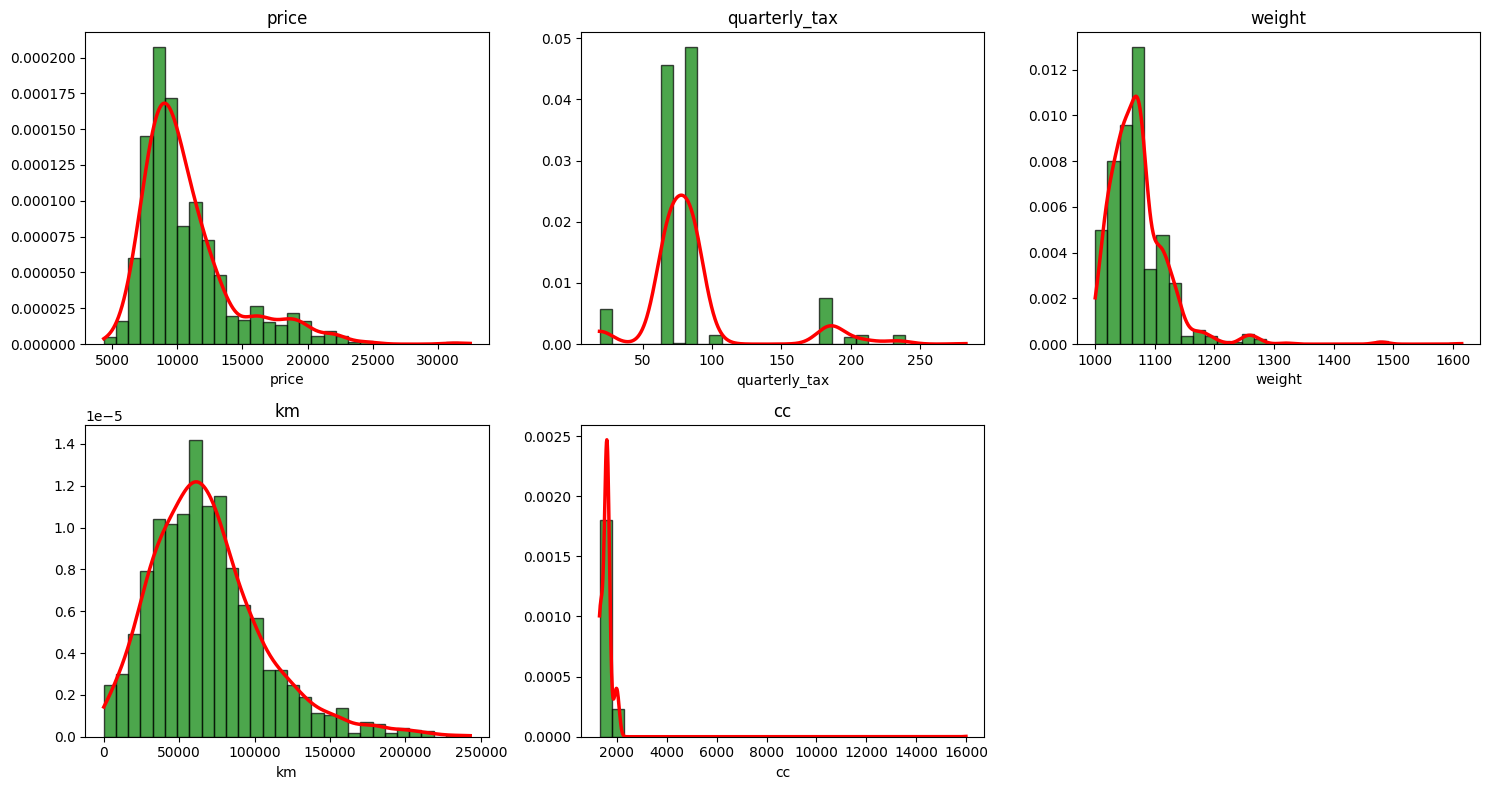

In [23]:
histogram_por_lotes(df_toyota_continuas,6)

Index(['price', 'quarterly_tax', 'weight', 'km', 'cc'], dtype='object')


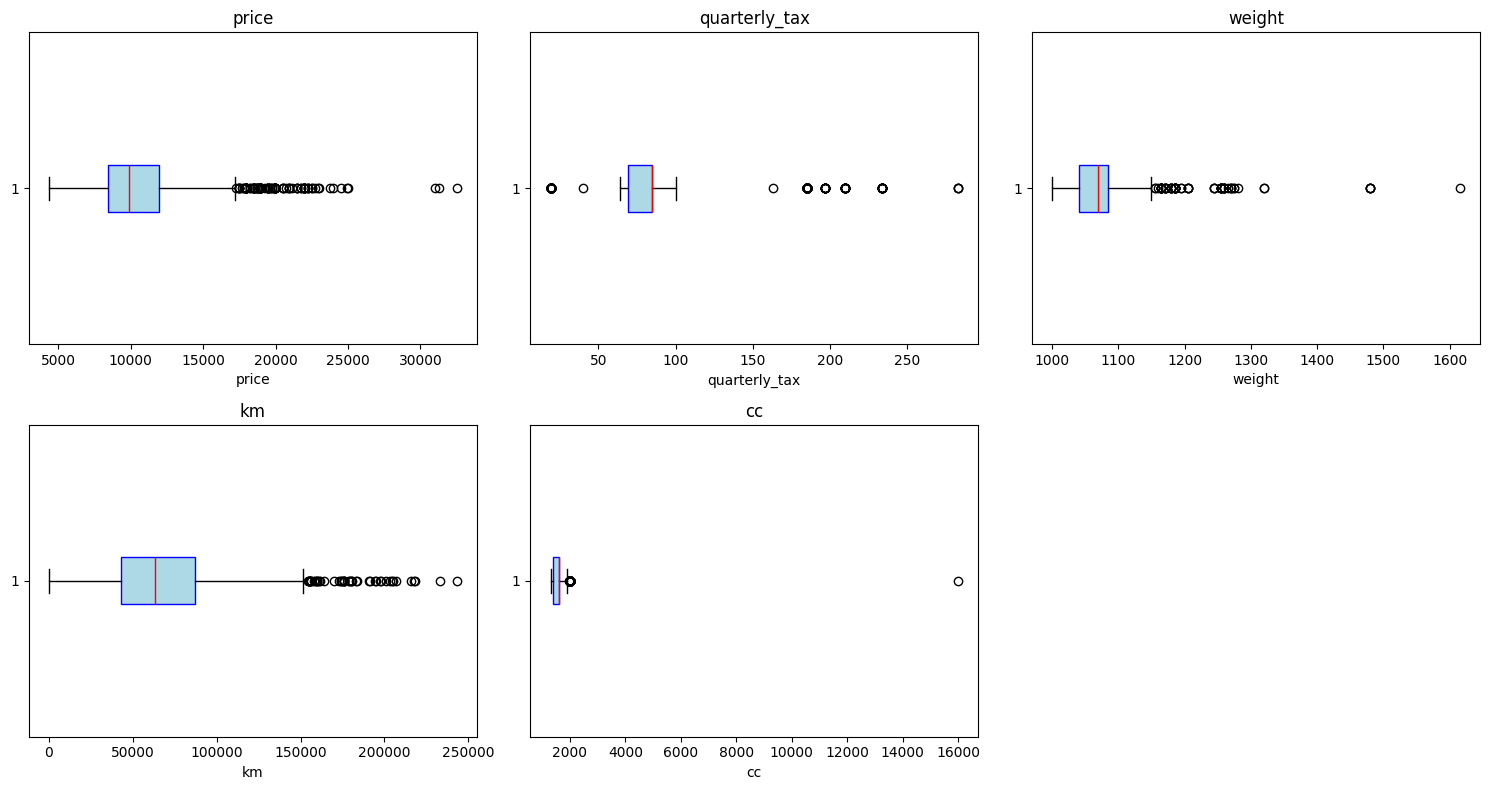

In [24]:
boxplots_por_lotes(df_toyota_continuas,6)

1. `Price (Precio)`

- Boxplot: Se observan varios valores atípicos (outliers) a la derecha, lo que indica que hay autos con precios mucho más altos que la mayoría.

- Histograma: La distribución es sesgada a la derecha, con una mayoría de autos en un rango de precios más bajos y unos pocos muy caros.

- Interpretación: La variable tiene una dispersión amplia y algunos autos que pueden ser considerados premium o muy costosos debido a funciones adicionales que el mismo lleva como ser `direccion asistida`.

2. `Quarterly Tax (Impuesto Trimestral)`

- Boxplot: También se observan outliers pero menos pronunciados que en el precio.

- Histograma: La mayoría de los autos pagan un impuesto relativamente bajo, con algunos pocos con impuestos altos.

- Interpretación: La mayoría de los autos tienen un impuesto trimestral bajo, probablemente relacionado  con algunos autos más costosos o potentes que pagan más.

3. `Weight (Peso)`

- Boxplot: Se ven outliers a la derecha, pero la mayoría de autos tienen pesos relativamente similares.

- Histograma: La distribución está más concentrada en un rango estrecho, con algunos autos más pesados.

- Interpretación: La mayoría de los autos tienen pesos iguales, pero hay algunos modelos más pesados.

4. `Km (Kilometraje)`

- Boxplot: Se observan varios outliers con kilometrajes muy altos.

- Histograma: La distribución está sesgada a la derecha, con muchos autos con bajo kilometraje y unos pocos con kilometrajes muy altos.

- Interpretación: Hay autos con poca circulación y algunos con mucho uso, lo cual es importante considerar para análisis del precio.

5. `cc (cilindrado del motor)`

- Boxplot: se obsevar outliers muy cerca del maximo del cojunto de datos pero hay uno que esta muy alejado 

- Histograma: la distribucion esta extramadamente sesgada hacia la derecha por culpa del outlier que esta muy alejado

- Interpretacion: autos con motor de bajo cilindro y hay un auto con un motor que tiene mucho cilindrado

En resumen:

- Las cuatro variables muestran distribuciones sesgadas, con presencia de valores atípicos.

- Esto sugiere que se podría considerar transformación o limpieza de outliers para análisis posteriores.

- Se debe considerar borrar la variable `weight` puesto que no se ve relevante para predecir un precio

- importante analizar la variable `price` , `km` y `quartely tax` con las binarias para obtener conclusiones mas precisas.

- importante eliminar el outlier de `cc` ya que podria causar problemas a la hora de entrenar el modelo, si se la considera como predictora.

## Variables Enteras

In [25]:
df_toyota_enteras = df_toyota.copy()

In [26]:
df_toyota_enteras.drop(columns=['price', 'quarterly_tax', 'weight', 'km','cc','mfr_guarantee', 'bovag_guarantee', 'abs', 'airbag_1', 'airbag_2', 'airco', 'automatic_airco', 'boardcomputer', 'cd_player', 'central_lock', 'met_color','powered_windows', 'power_steering', 'radio', 'mistlamps', 'sport_model', 'backseat_divider', 'metallic_rim', 'radio_cassette', 'tow_bar' , 'age_08_04_calculada','fuel_type','automatic'
], axis=1,inplace=True)


In [27]:
df_toyota_enteras.describe()

mfg_month    mfg_year           hp        doors        gears  \
count  1435.000000  1435.00000  1435.000000  1435.000000  1435.000000   
mean      5.551916  1999.62230   101.491986     4.032753     5.026481   
std       3.353102     1.53692    14.981408     0.952667     0.188575   
min       1.000000  1998.00000    69.000000     2.000000     3.000000   
25%       3.000000  1998.00000    90.000000     3.000000     5.000000   
50%       5.000000  1999.00000   110.000000     4.000000     5.000000   
75%       8.000000  2001.00000   110.000000     5.000000     5.000000   
max      12.000000  2004.00000   192.000000     5.000000     6.000000   

       guarantee_period  
count       1435.000000  
mean           3.816028  
std            3.011997  
min            3.000000  
25%            3.000000  
50%            3.000000  
75%            3.000000  
max           36.000000

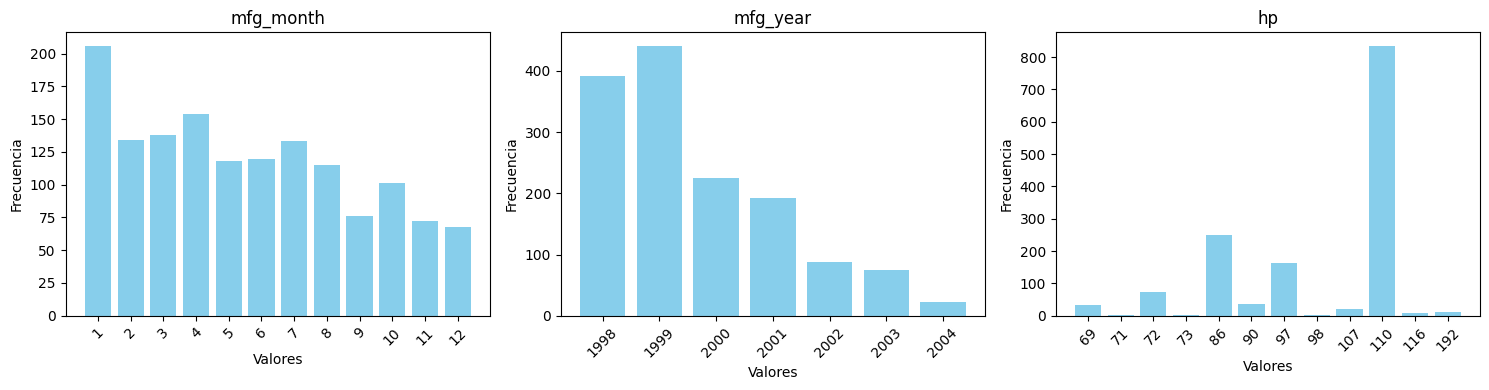

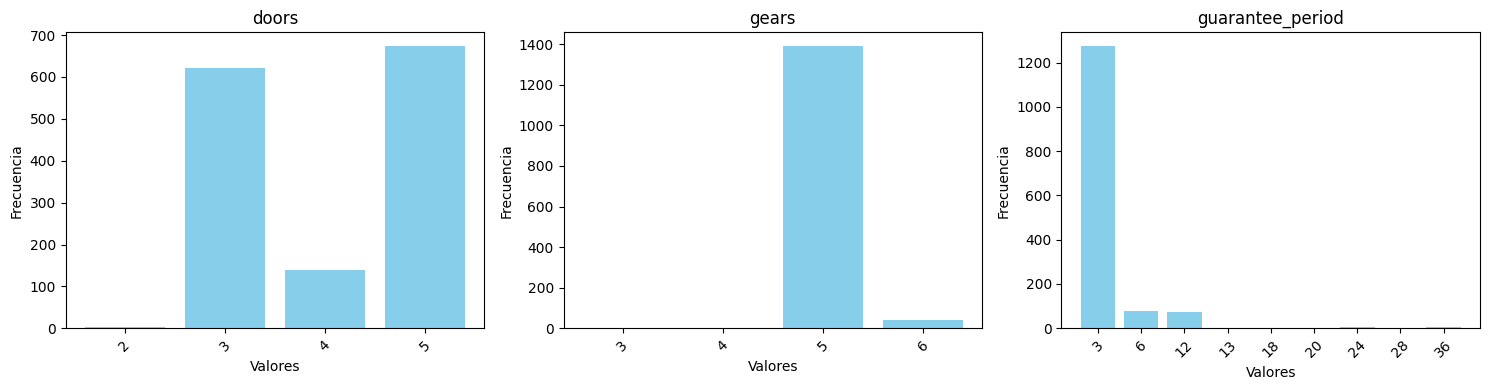

In [28]:
bar_por_lotes(df_toyota_enteras,3)

Index(['mfg_month', 'mfg_year', 'hp', 'doors', 'gears', 'guarantee_period'], dtype='object')


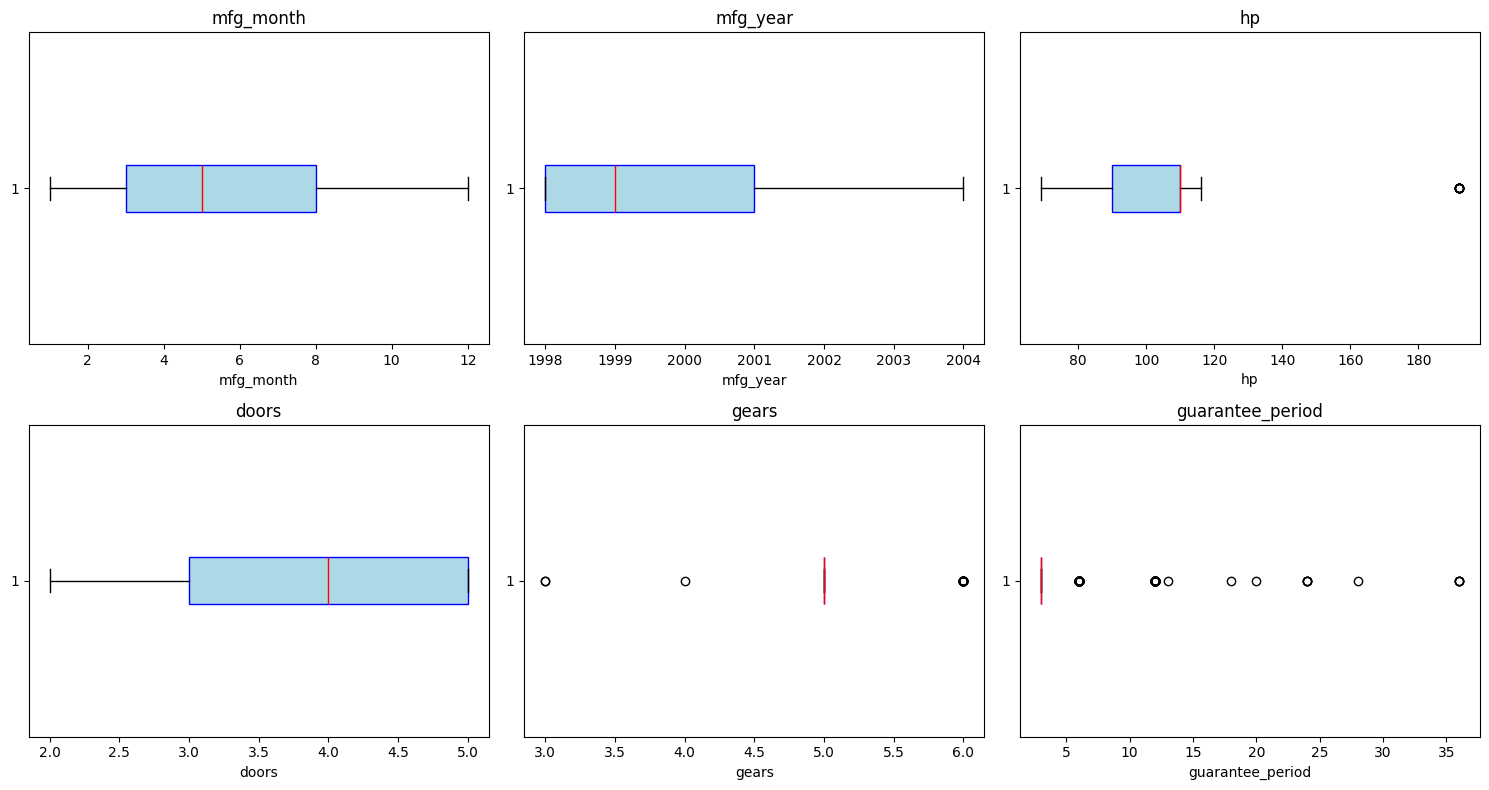

In [29]:
boxplots_por_lotes(df_toyota_enteras,6)

In [30]:
# Calcular varianza para todas las columnas numéricas
varianzas = df_toyota_enteras.var()

# Convertir a DataFrame para mejor visualización
tabla_varianza = varianzas.reset_index()
tabla_varianza.columns = ['columna', 'varianza']

# Ordenar de menor a mayor varianza
tabla_varianza = tabla_varianza.sort_values(by='varianza')

# Mostrar tabla
print(tabla_varianza)

            columna    varianza
4             gears    0.035560
3             doors    0.907574
1          mfg_year    2.362124
5  guarantee_period    9.072128
0         mfg_month   11.243293
2                hp  224.442579


Para Analisis posteriores se debe considerar eliminar `Gears` y `Doors` ya que poseen muy poca variabilidad en los datos 

## Variables binarias

Seleccion las variables binarias

In [31]:
df_toyota_binarias = df_toyota.copy()

columns_to_keep = [
    'mfr_guarantee', 'bovag_guarantee', 'abs', 'airbag_1', 'airbag_2', 'airco',
    'automatic_airco', 'boardcomputer', 'cd_player', 'central_lock',
    'powered_windows', 'power_steering', 'radio', 'mistlamps', 'sport_model',
    'backseat_divider', 'metallic_rim', 'radio_cassette', 'tow_bar','met_color','automatic'
]

df_toyota_binarias = df_toyota_binarias[columns_to_keep]

Contamos cuantos 0 y 1 hay por cada variable 

In [32]:
binary_cols = [col for col in df_toyota_binarias.columns if set(df_toyota_binarias[col].dropna().unique()) <= {0, 1}]

resumen = pd.DataFrame({
    'ceros': df_toyota_binarias[binary_cols].apply(lambda x: (x == 0).sum()),
    'unos': df_toyota_binarias[binary_cols].apply(lambda x: (x == 1).sum())
})

print(resumen)

                  ceros  unos
mfr_guarantee       847   588
bovag_guarantee     149  1286
abs                 268  1167
airbag_1             42  1393
airbag_2            398  1037
airco               706   729
automatic_airco    1355    80
boardcomputer      1012   423
cd_player          1122   313
central_lock        603   832
powered_windows     629   806
power_steering       32  1403
radio              1225   210
mistlamps          1066   369
sport_model        1004   431
backseat_divider    329  1106
metallic_rim       1141   294
radio_cassette     1226   209
tow_bar            1036   399
met_color           467   968
automatic          1355    80


Mediente un umbral de 90% vamos a tomar para eliminar dichas variables que esten muy desbalancedas

In [33]:
umbral = 0.90  
columnas_a_borrar = []

for col in resumen.index:
    total = resumen.loc[col].sum()
    max_val = resumen.loc[col].max()
    if max_val / total > umbral:
        columnas_a_borrar.append(col)

print("Columnas a eliminar por desbalance:", columnas_a_borrar)


Columnas a eliminar por desbalance: ['airbag_1', 'automatic_airco', 'power_steering', 'automatic']


In [34]:
df_toyota_binarias.drop(columns=columnas_a_borrar, axis=1, inplace=True)

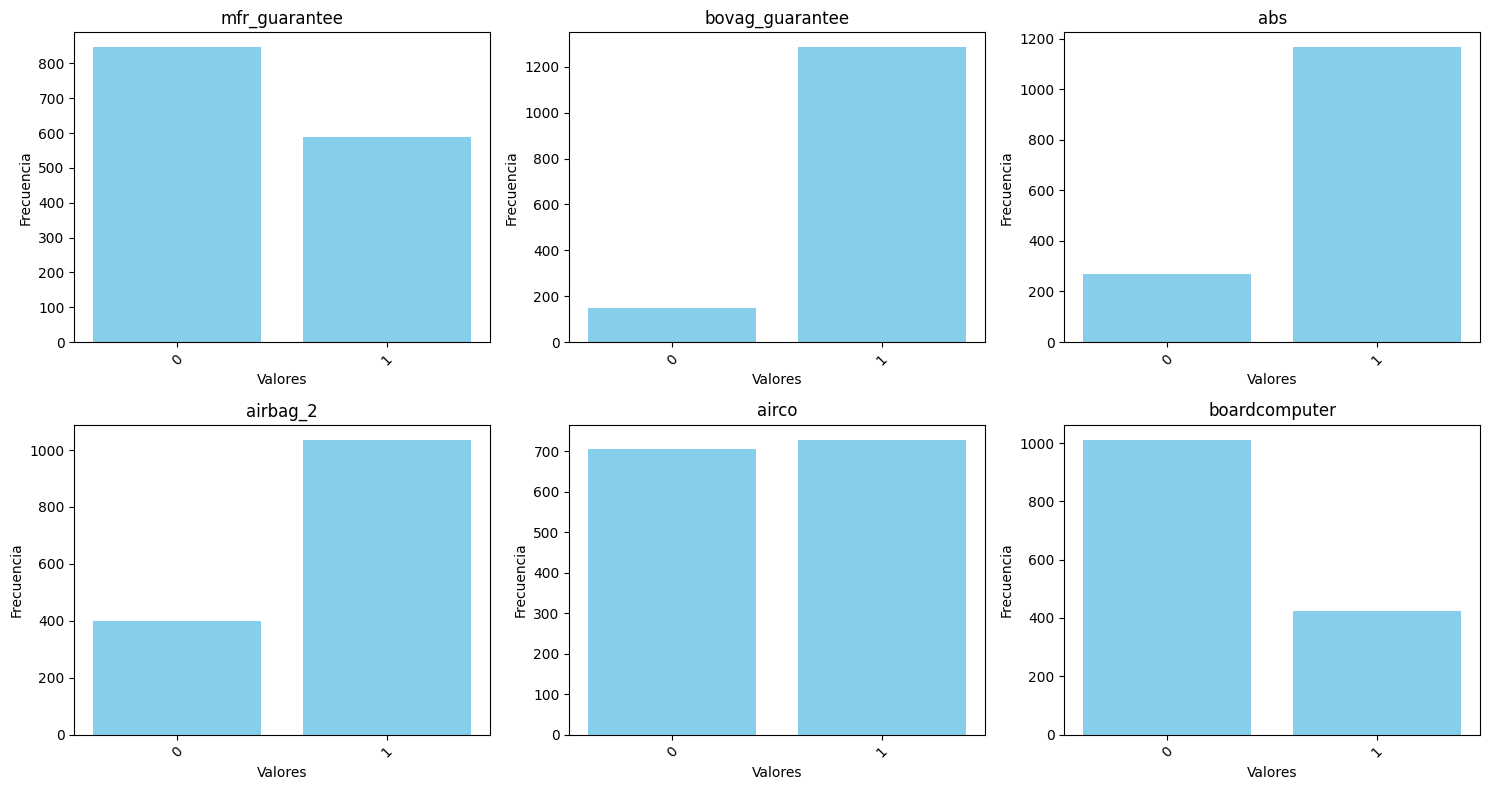

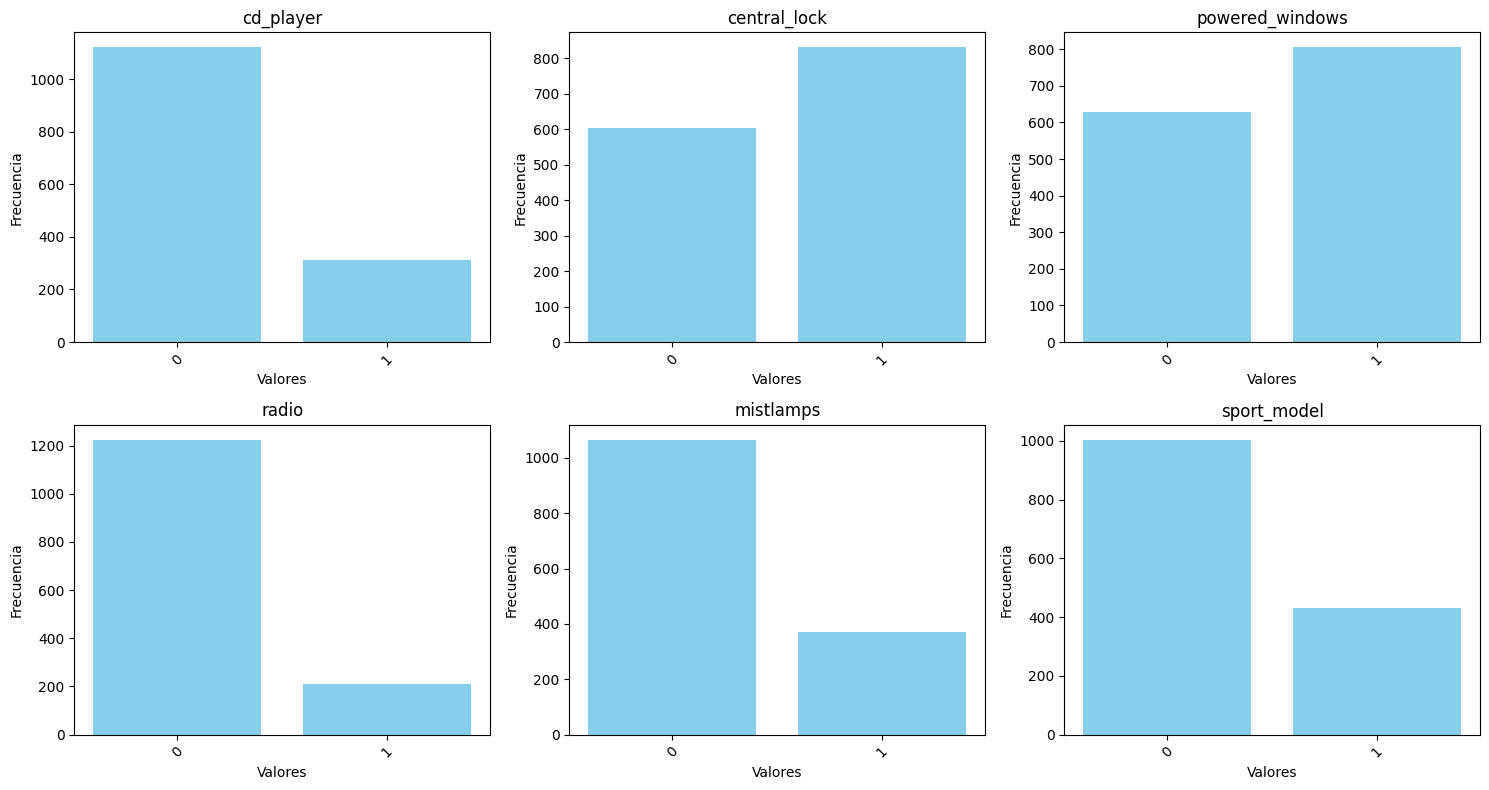

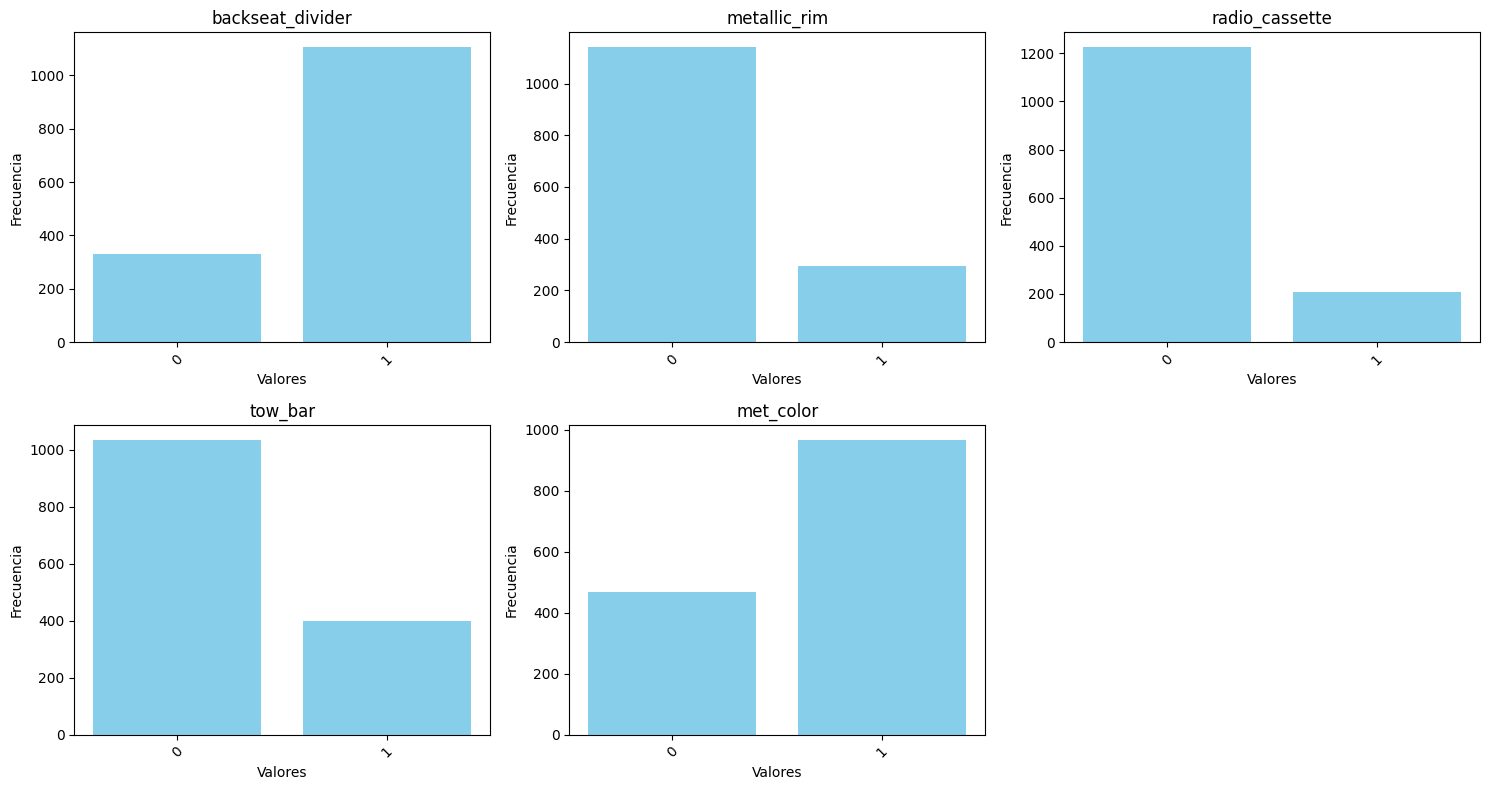

In [35]:
bar_por_lotes(df_toyota_binarias)

# Eliminacion de outliers y/o Transformacion para varibles continuas

## Price

antes de eliminar los outliers vamos a graficar un histograma y un boxplot

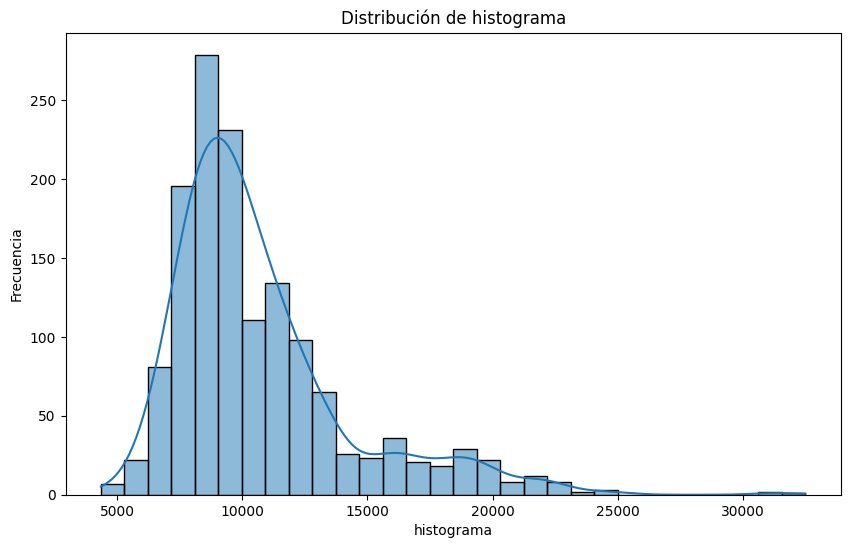

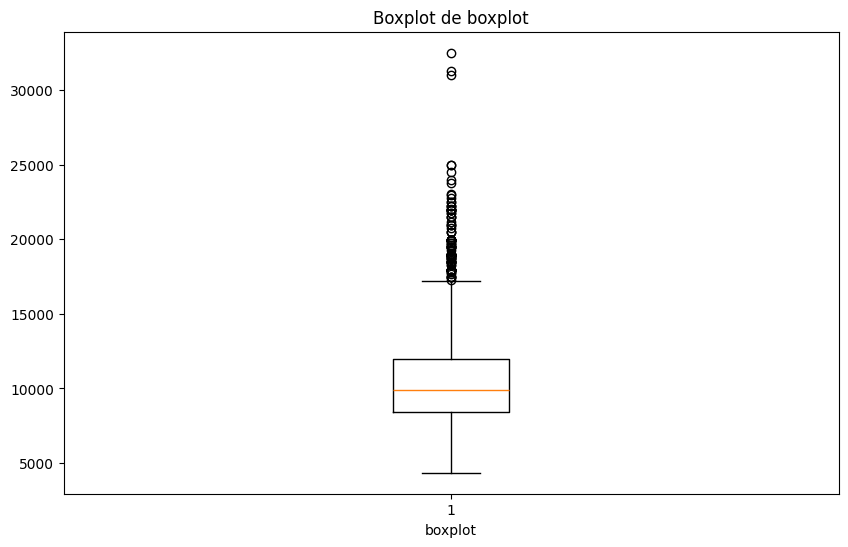

In [36]:
histogram(df_toyota_continuas['price'])
boxplot(df_toyota_continuas['price'])

como se dijo en el analisis univariado dicha distribucion presenta una sesgo hacia la izquierda por lo tanto hay que eliminar esos outliers, como el histograma lo presenta vemos que es una distrubucion que se acerca mucho a una `distribucion normal` lo que haremos es eliminar los outliers con el metodo llamado `z-core`

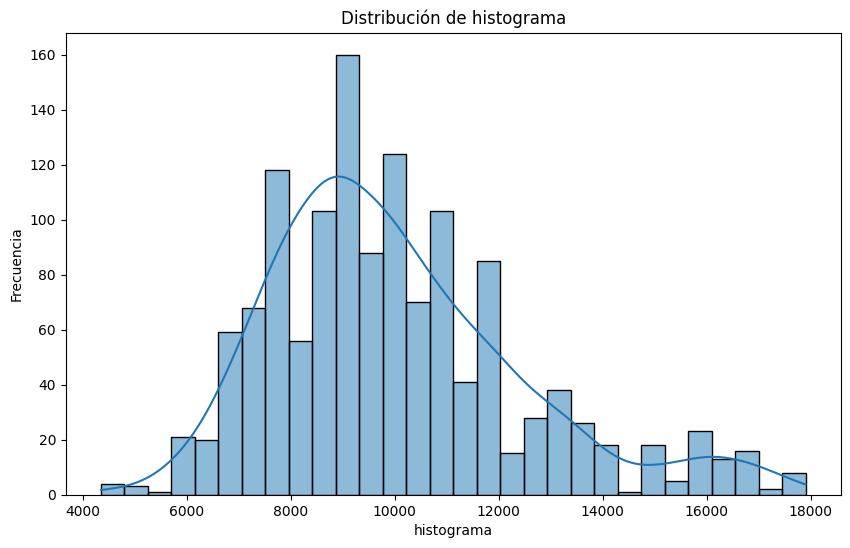

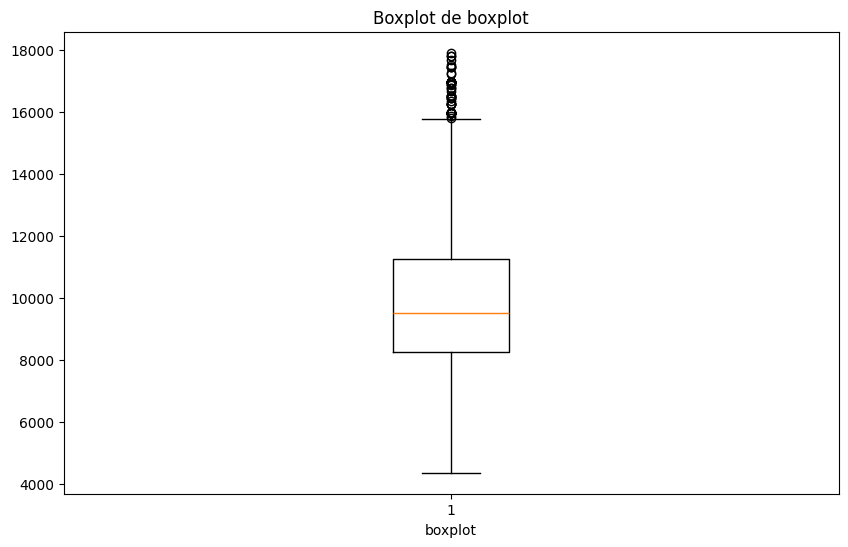

100


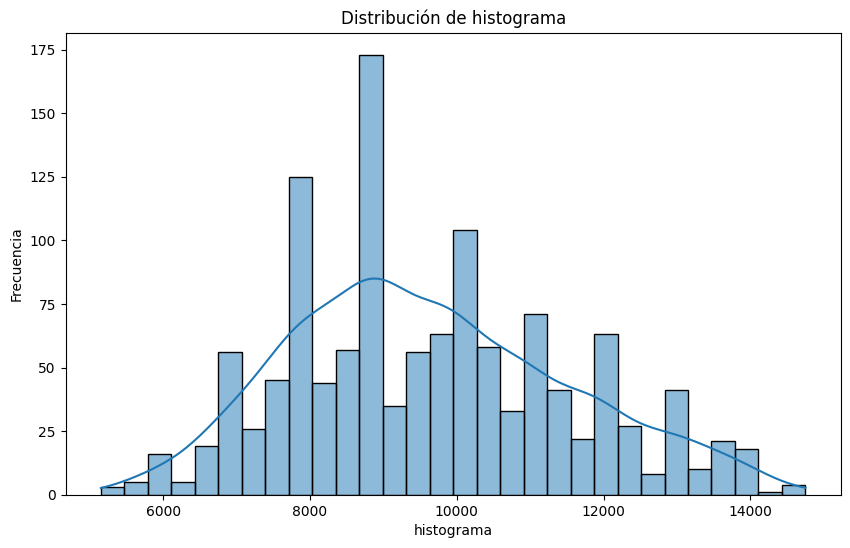

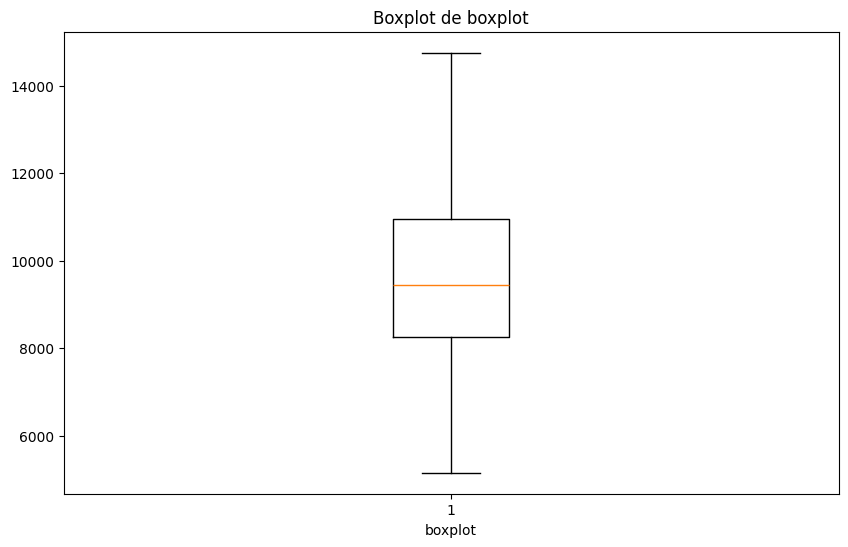

85


In [37]:
price = df_toyota_continuas['price'].copy()
_ , mask_price = limpiar_outliers_z_core(price)
price_limpio = price[mask_price]
histogram(price_limpio)
boxplot(price_limpio)

print(len(price) - len(price_limpio))

price_limpio_l , mask_price_l = limpiar_outliers_z_core(price_limpio)

histogram(price_limpio_l)

boxplot(price_limpio_l)

print(len(price_limpio) - len(price_limpio_l))








## KM 

antes de eliminar los outliers vamos a graficar un histograma y un boxplot

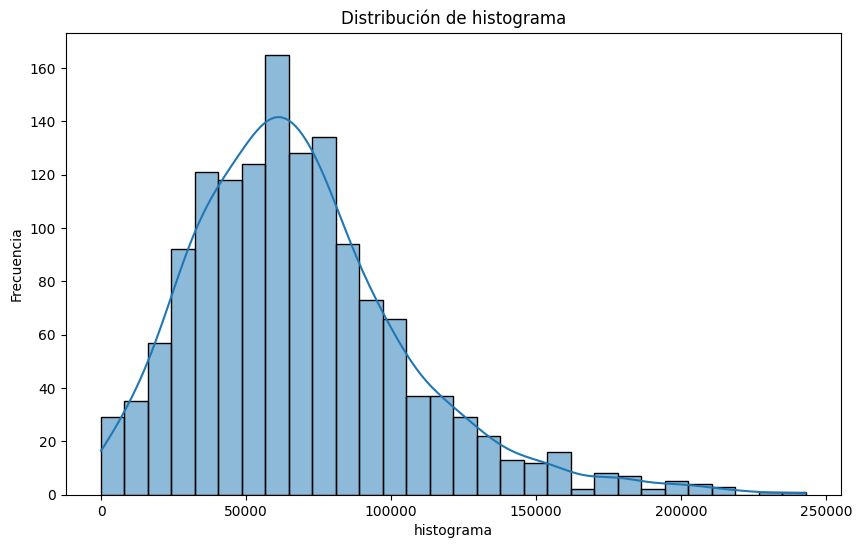

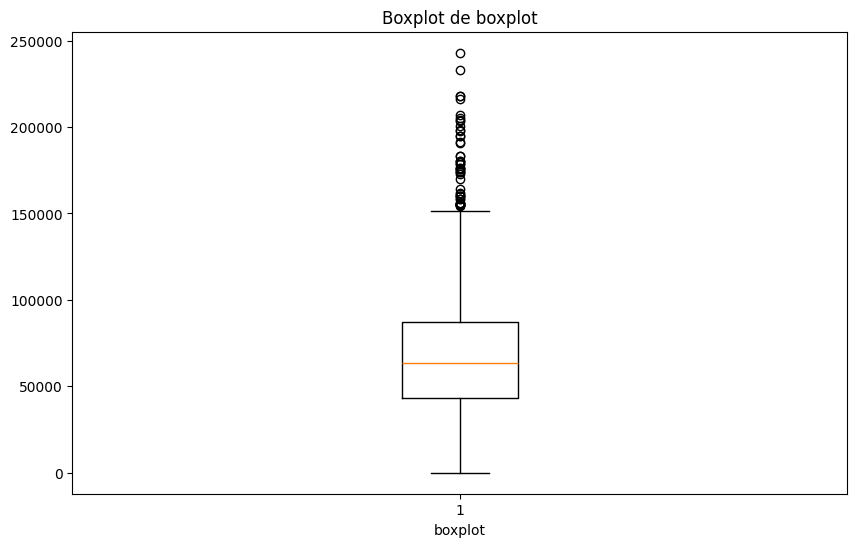

In [38]:
histogram(df_toyota_continuas['km'])
boxplot(df_toyota_continuas['km'])


como se dijo en el analisis univariad adicha distribucion presenta una sesgo hacia la derecha por lo tanto hay que eliminar esos outliers, como el histograma lo presenta vemos que es una distribucion que se acerca mucho a una `distribucion normal` lo que haremos es eliminar los outliers con el metodo llamado `z-core`

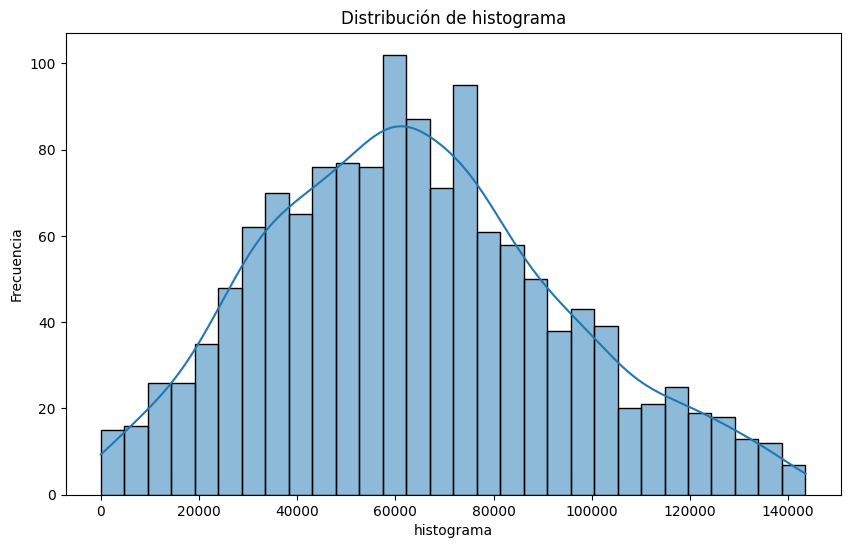

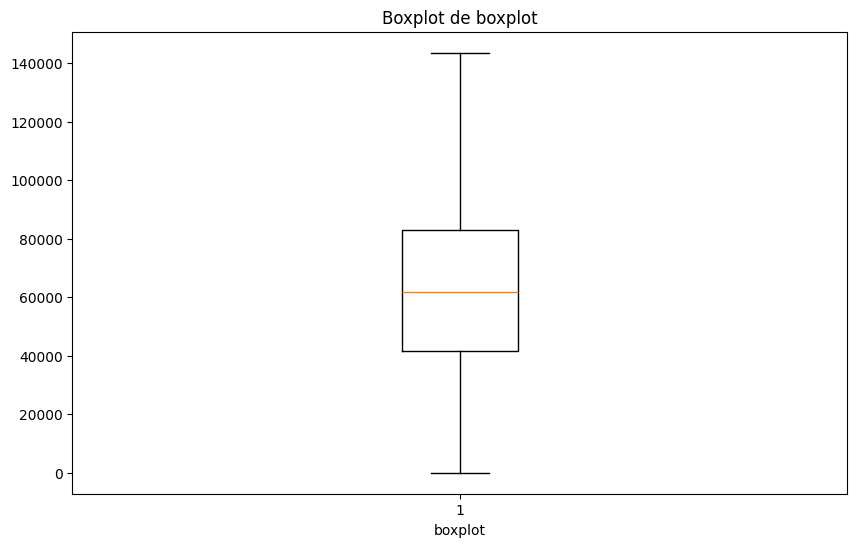

64


In [39]:
km = df_toyota_continuas['km'].copy()
_ , mask_km = limpiar_outliers_z_core(km)
km_limpio = km[mask_km]
histogram(km_limpio)
boxplot(km_limpio)
print(len(km) - len(km_limpio))


## cc

como se menciono en el `analisis univariado` hay un outliers extremademente alejado de la mayoria de los datos, por lo tanto a ese debemos eliminarlo

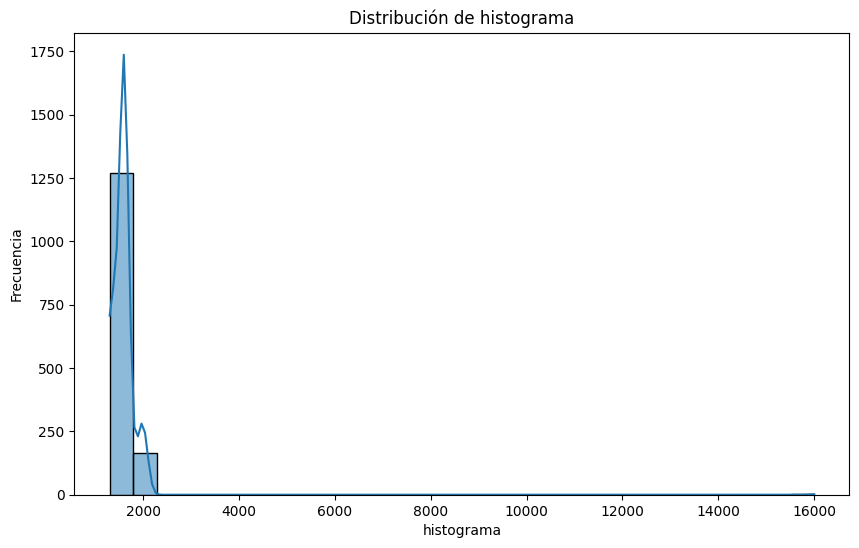

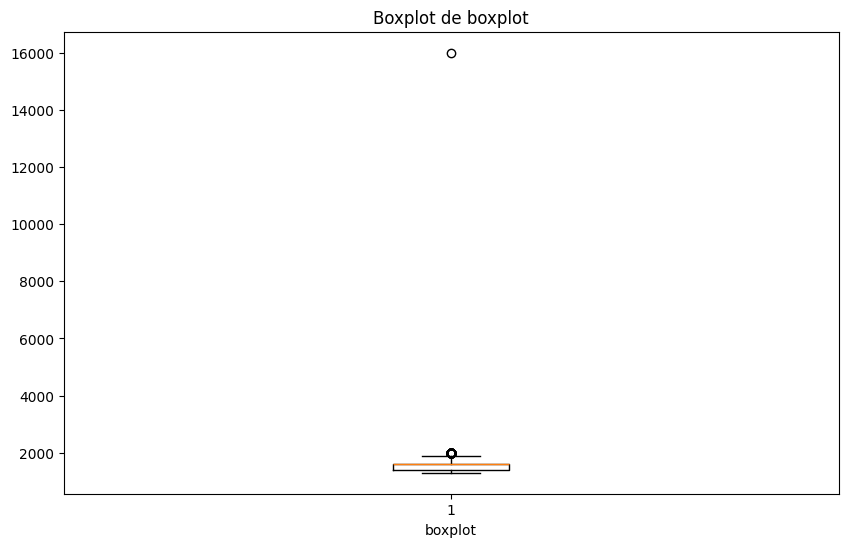

0.12437451354775338


In [40]:
histogram(df_toyota_continuas['cc'])
boxplot(df_toyota_continuas['cc'])
correlacion = df_toyota_continuas['cc'].corr(df_toyota_continuas['price'])
print(correlacion)


el elimina el outliers por lo que los datos de `cc` quedan de la siguiente manera

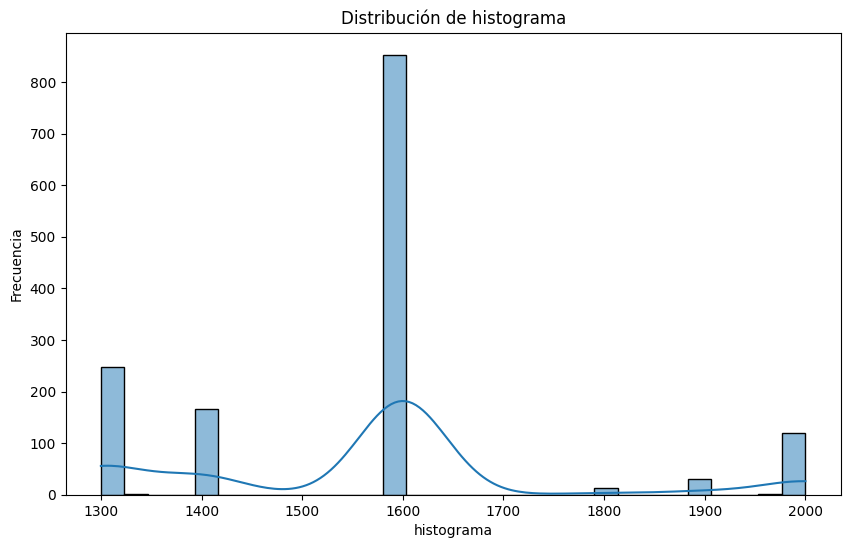

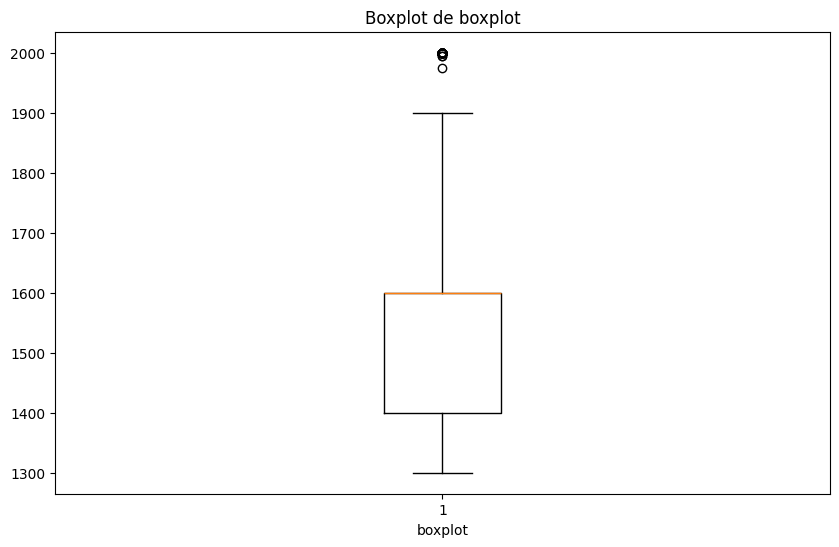

In [41]:
cc = df_toyota_continuas['cc'].copy()

cc = cc[cc!=cc.max()]

histogram(cc)
boxplot(cc)


el valor 1600 domina fuertemente con una frecuencia desproporcionadamente alta, no se la pudo mejorar con eliminando los outliers tampoco vale la pena llevar a una normal ya que no es continua, si la variable no tiene un buen coeficente de correlacion se debera eliminarla

## Quarterly_tax

en esta variable se observa que hay muchos vehiculos que pagan entre 50 y  100 de impuestos trimestrales que es ahi donde se encuentran el 75% de los dato sin embargo se visualiza que hay vehiculos que pagan mucho mas que eso mas o menos con una diferencia  152, esto puede deberse a que es un auto de alta gama o algo parecido  por lo tanto la variable `quarterly_tax` se le haran los siguientes tratamientos para poder salvara de alguna manera ya que pensamos que dicha variable a la hora de determianr el precio de un vehiculo aporta mucho a el mismo.

- eliminar outliers  ->   `con la estrategia z-core  a 2 desviaciones estandar`

- convertirla en una normal ->  `box-cox`


si alguno de estos tratamientos no da resultado se optara por eliminar dicha  variable 

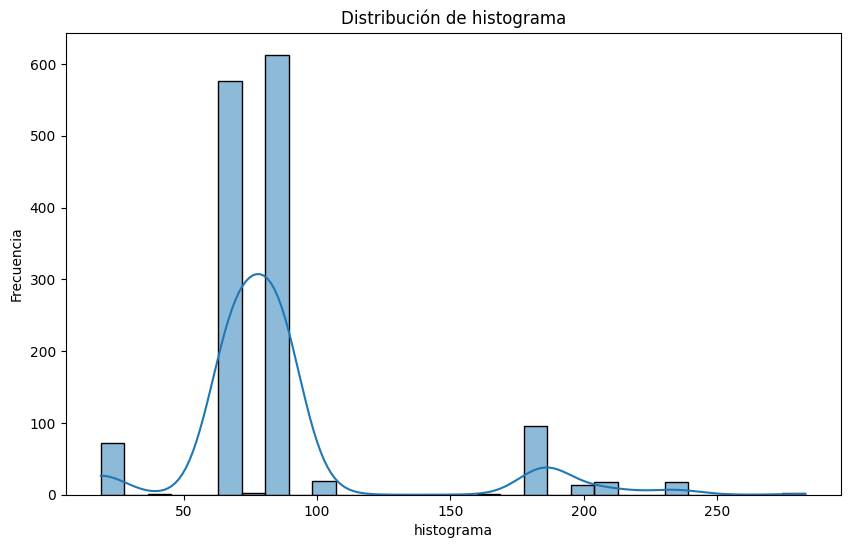

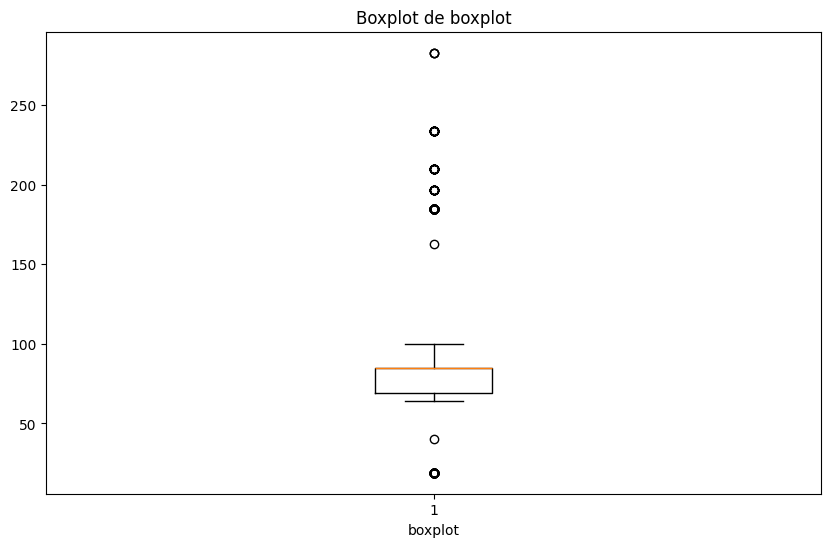

In [42]:
histogram(df_toyota_continuas['quarterly_tax'])
boxplot(df_toyota_continuas['quarterly_tax'])



Traceback (most recent call last):
  File "/home/agustin/.local/lib/python3.10/site-packages/IPython/core/completer.py", line 3246, in _complete
    result = matcher(context)
  File "/home/agustin/.local/lib/python3.10/site-packages/IPython/core/completer.py", line 2385, in python_matcher
    matches = self.global_matches(context.token)
  File "/home/agustin/.local/lib/python3.10/site-packages/IPython/core/completer.py", line 1114, in global_matches
    for word in lst:
RuntimeError: dictionary changed size during iteration


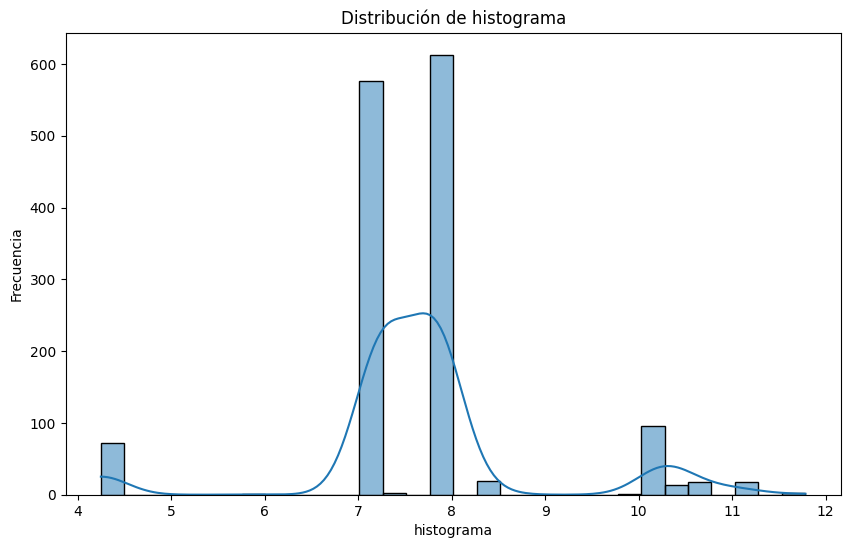

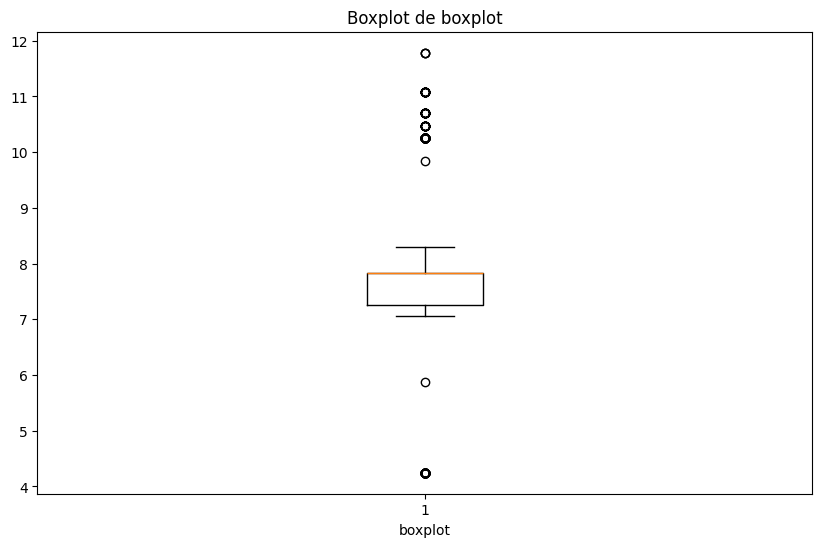

In [93]:
# importancion de libreria para boxcox
from scipy.stats import boxcox
quearterly_tax = df_toyota_continuas['quarterly_tax'].copy()

quearterly_tax_box,_ = boxcox(quearterly_tax)

histogram(quearterly_tax_box)
boxplot(quearterly_tax_box)


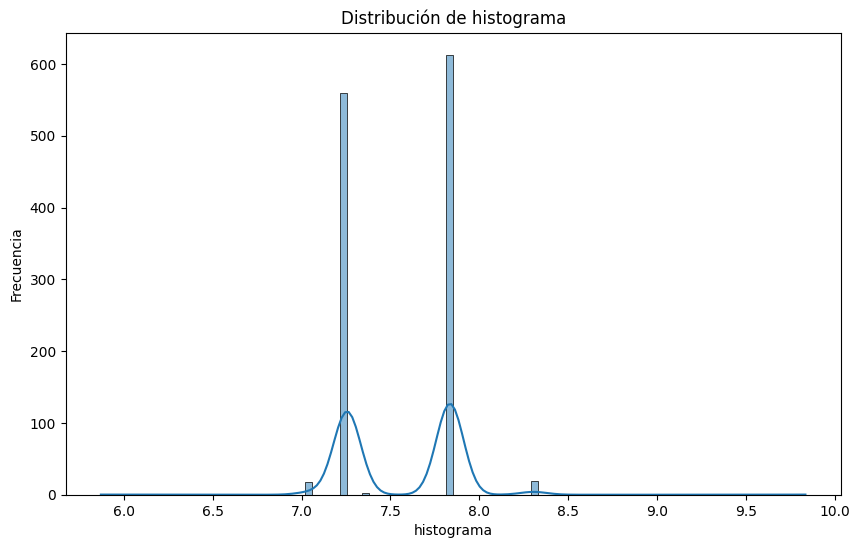

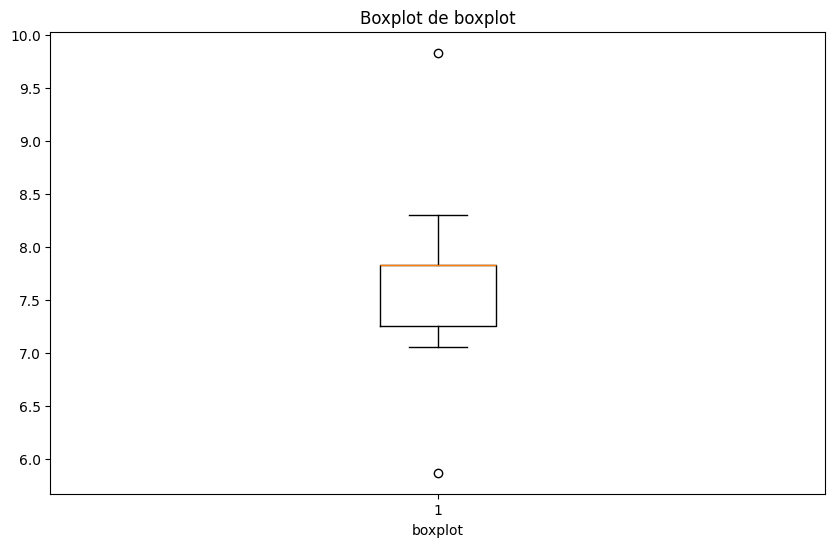

221


In [96]:
quearterly_tax_box_limpio , mask_quearterly_tax_box = limpiar_outliers_z_core(quearterly_tax_box)

histogram(quearterly_tax_box_limpio,100)
boxplot(quearterly_tax_box_limpio)

print(len(quearterly_tax_box) - len(quearterly_tax_box_limpio))


se puede observar que en los dos tratamientos aplicados  no se observo ninguna mejoria por lo tanto la variable quarterly tax se va

# Eliminacion de outliers y/o Transformacion para varibles Enteras

In [46]:
df_toyota_enteras.columns

Index(['mfg_month', 'mfg_year', 'hp', 'doors', 'gears', 'guarantee_period'], dtype='object')

## mfg_month y mfg_year

dichas variable no se van a contemplar en su estudio puesto que ya que estan condensadas en la variable `age_08_04_calculada`

## Gears y Doors

dicha variables no se contemplar en este estudio puesto qu se las van a eliminar ya que presentan poca varianza

## hp

como se vio en el `analsis univariado` hp presenta un outliers que esta muy alejado alejado del de todos los datos por lo tanto debemos eliminarlo

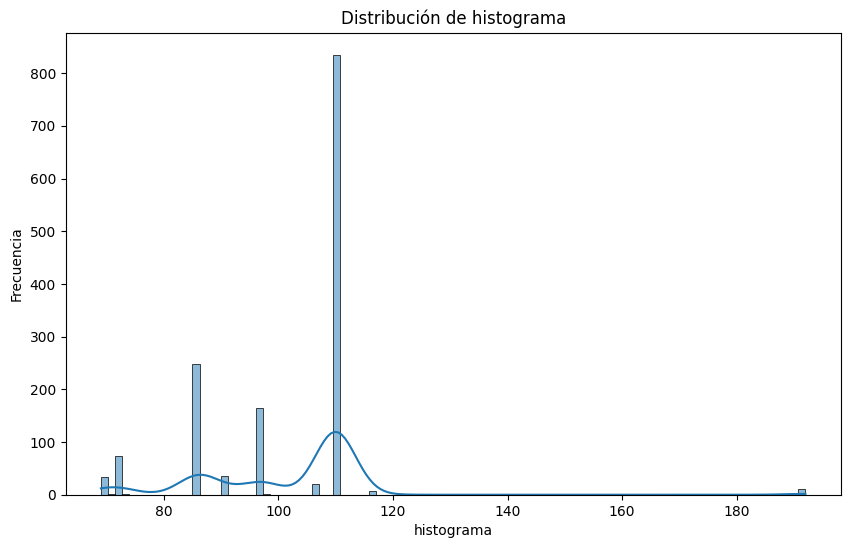

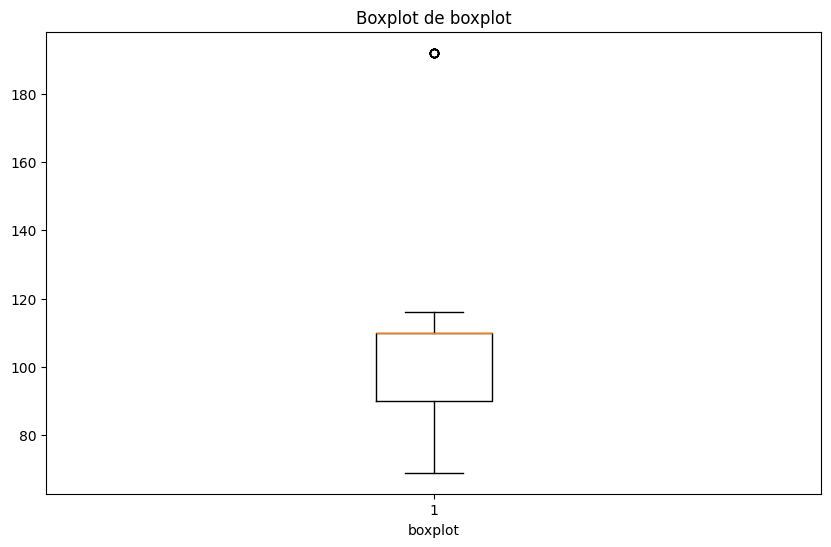

In [47]:
histogram(df_toyota_enteras['hp'],100)
boxplot(df_toyota_enteras['hp'])


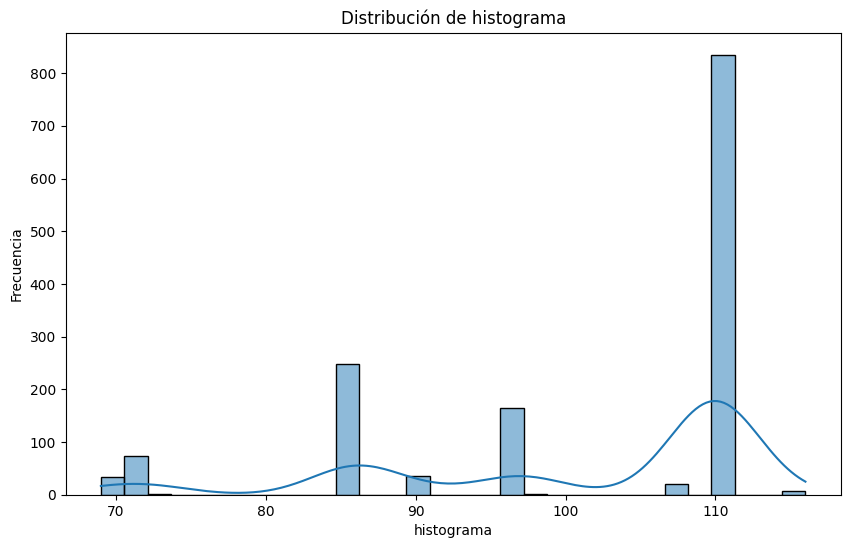

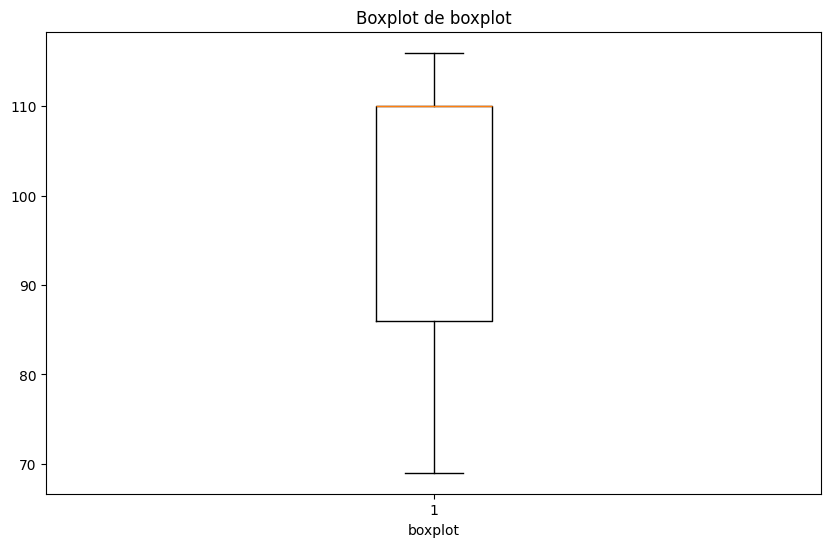

In [97]:
hp = df_toyota_enteras['hp'].copy()
hp = hp[hp!=hp.max()]
histogram(hp)
boxplot(hp)



a nuestro parecer es casi imposible recuperarla, entonces decidimos eliminarla para estudios posteriores

## guarent_period

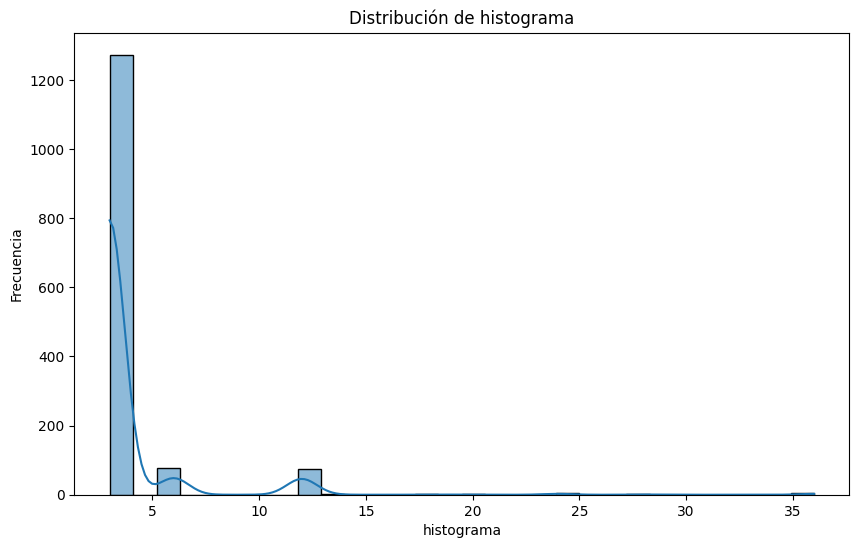

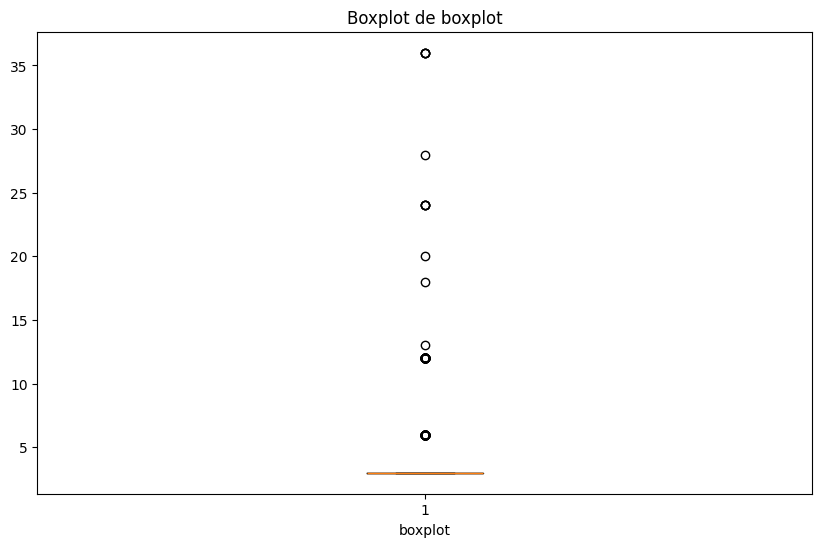

In [49]:
guarent_period = df_toyota_enteras['guarantee_period'].copy()

histogram(guarent_period)
boxplot(guarent_period)




evidentemente tiene poca varibilidad , se deb eliminar gurante_period

# Analisis Bivariado con dataframe original

In [50]:
from sklearn.preprocessing import LabelEncoder

df_toyota['fuel_type_encoded'] = LabelEncoder().fit_transform(df_toyota['fuel_type'])

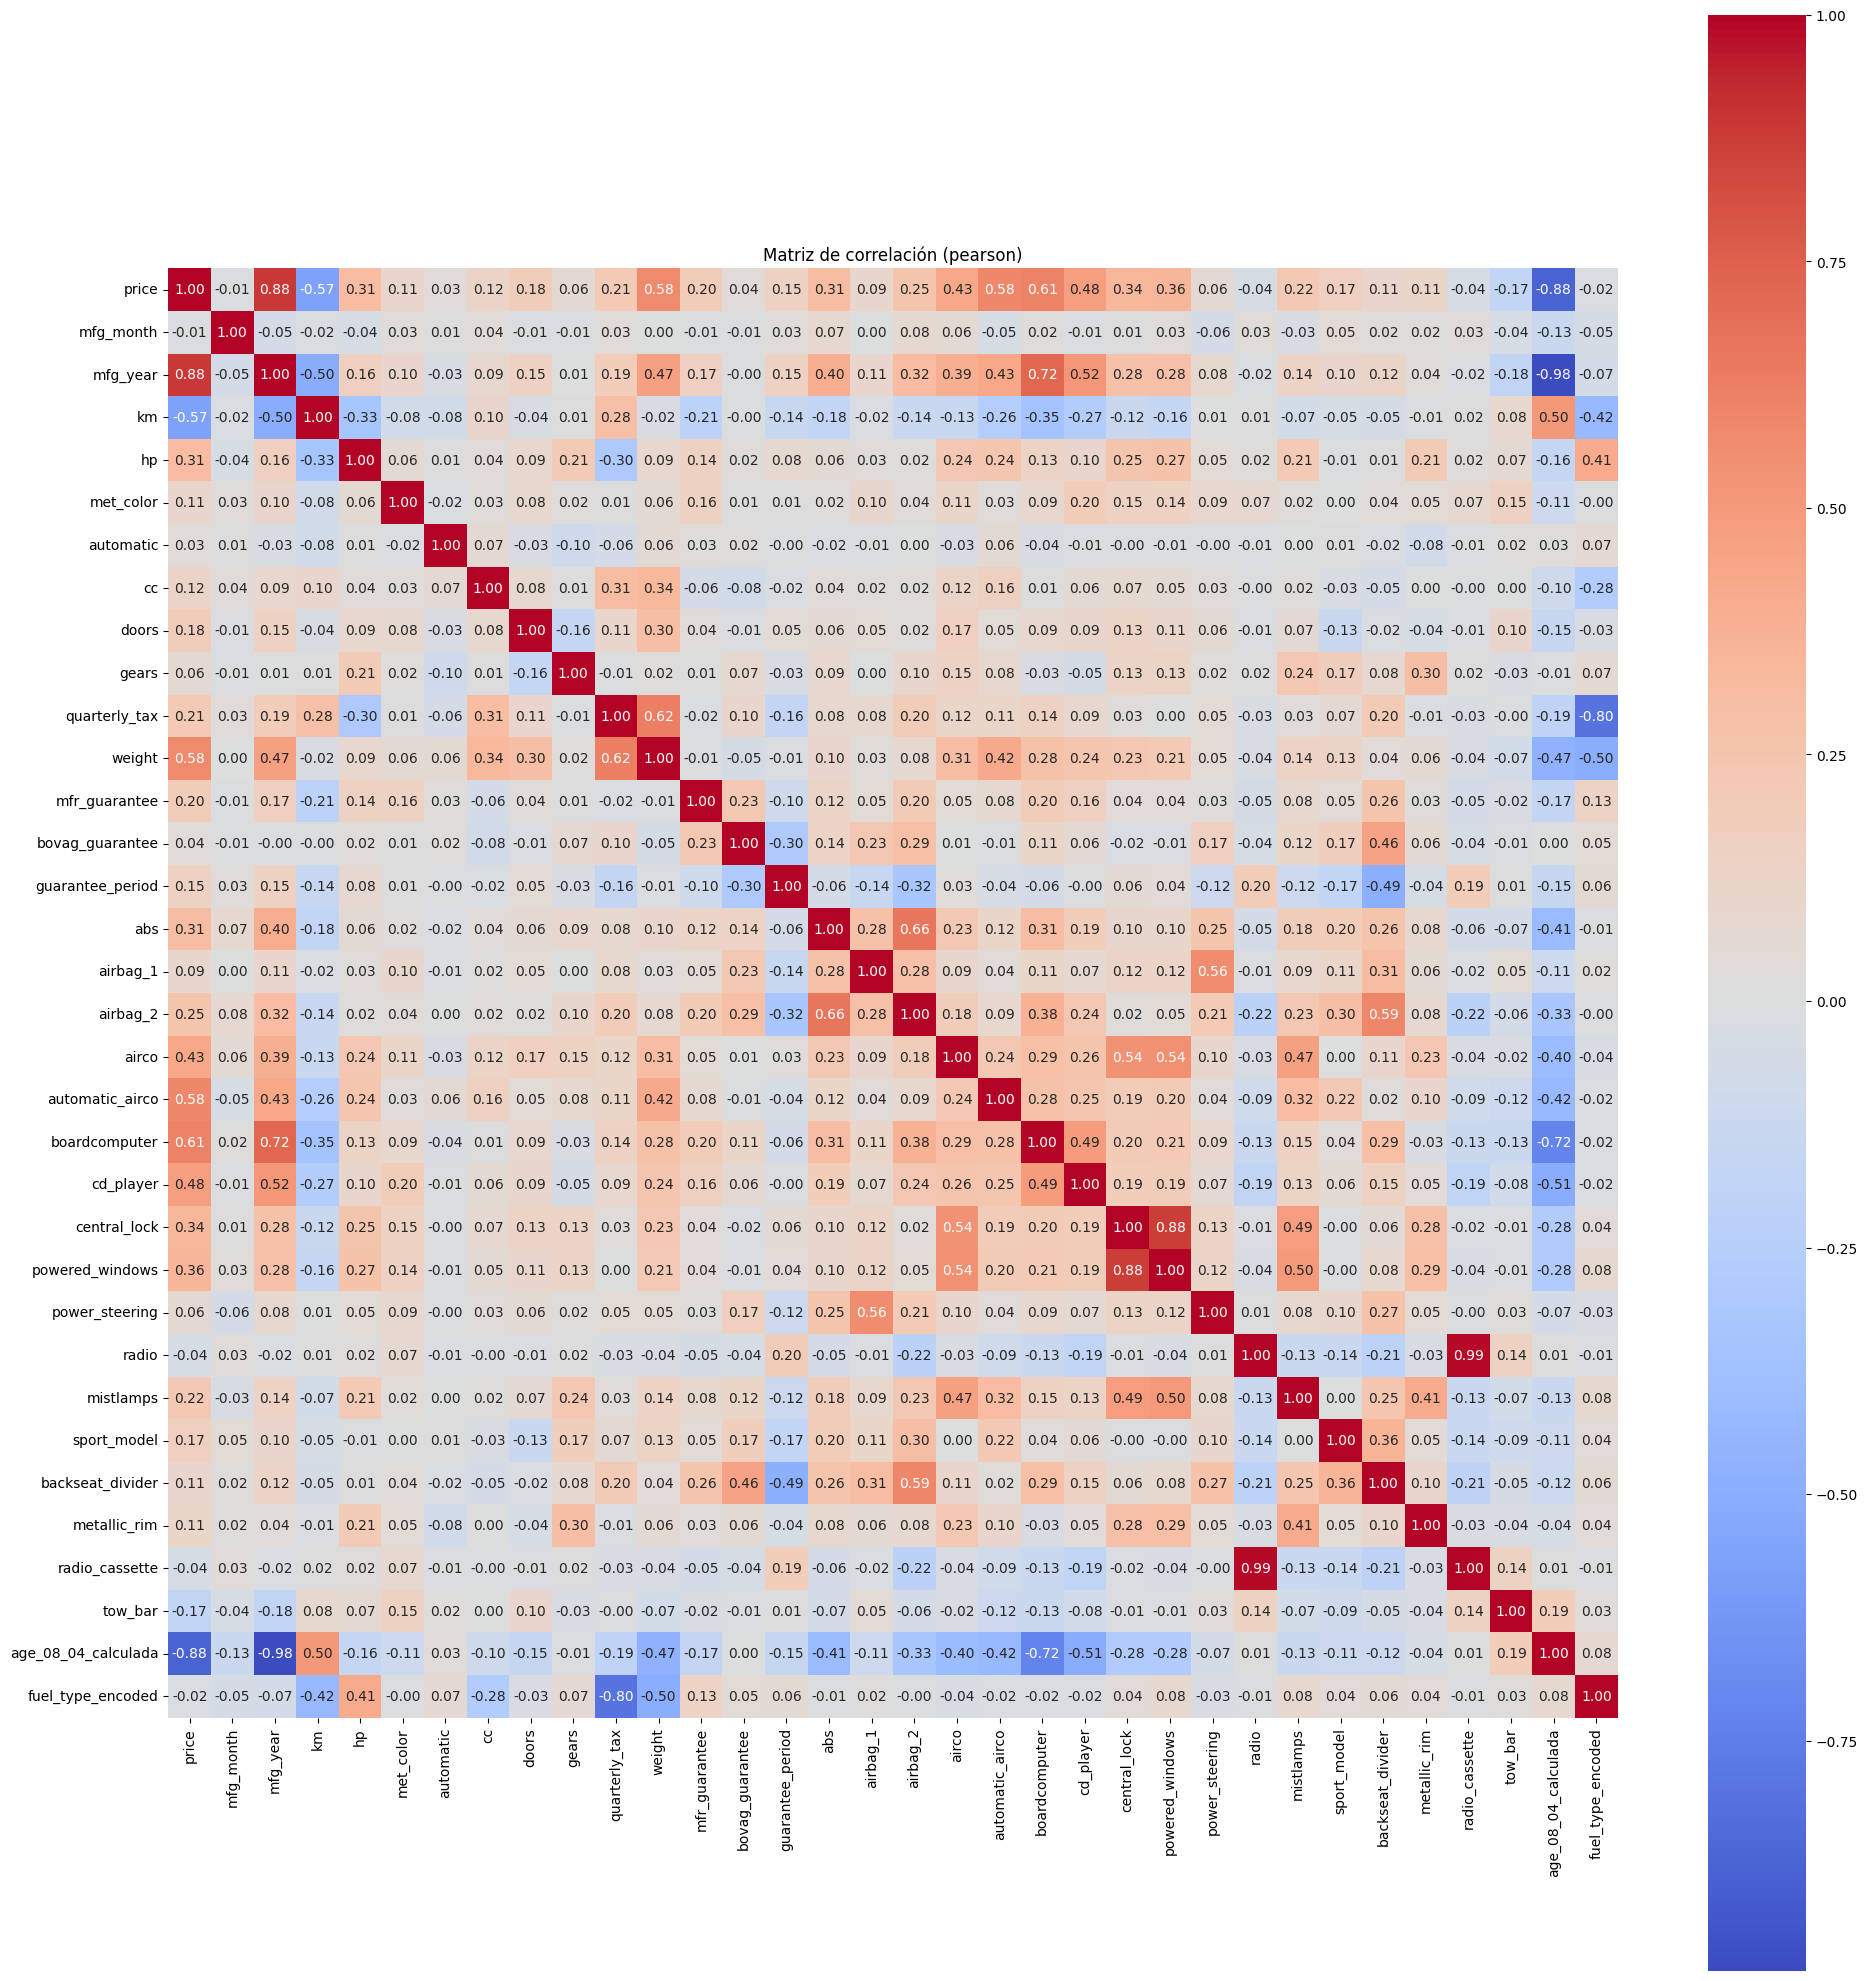

In [51]:
matriz=mostrar_matriz_correlacion(df_toyota)

Interpretación del Coeficiente de Correlación de Pearson
Los valores del coeficiente de Pearson oscilan entre -1 (correlación negativa perfecta) y 1 (correlación positiva perfecta). Un valor cercano a 0 indica ausencia de correlación lineal.

Análisis de los pares de variables:
1. `radio y radio_cassette (0.992)`

- Correlación positiva casi perfecta. Ambas variables están fuertemente relacionadas, lo que sugiere redundancia. Podría eliminarse una para evitar multicolinealidad en modelos.

2. `mfg_year y age_08_04_calculada (-0.984)`

- Correlación negativa casi perfecta. A mayor año de fabricación (mfg_year), menor edad del vehículo (age_08_04_calculada), lo cual es lógico.

3. `price y mfg_year (0.885)`

- Fuerte correlación positiva. Vehículos más nuevos tienden a ser más caros.

4. `price y age_08_04_calculada (-0.876)`

- Fuerte correlación negativa. Vehículos más antiguos tienen precios más bajos (depreciación).

5. `central_lock y powered_windows (0.875)`

- Fuerte correlación positiva. Ambas características suelen aparecer juntas en vehículos de gamas similares.

6. `quarterly_tax y fuel_type_encoded (-0.798)`

- Fuerte correlación negativa. El tipo de combustible podría influir en el impuesto trimestral (ej. combustibles más eficientes pagan menos).

7. `mfg_year y boardcomputer (0.724)`

- Correlación positiva moderada-fuerte. Vehículos recientes suelen incluir computadora de abordo.

8. `boardcomputer y age_08_04_calculada (-0.722)`

- Correlación negativa moderada-fuerte. Vehículos antiguos tienen menos probabilidad de incluir computadora de abordo.

9. `abs y airbag_2 (0.662)`

- Correlación positiva moderada. Ambas son características de seguridad que suelen coexistir en vehículos de gama alta.

conclusiones :

- Evitar multicolinealidad: Si dos variables están muy correlacionadas  considera eliminar una o usar una tecnica PCA




para evitar multicolinealidad en la selccion de feature se va eliminar las siguientes variables:

- `mfg_year` que tiene alta correlacion con age_08_04_calculada, ademas age_04_08 calculada expresa mejor la edad del vehiculo

- `radio_cassete` las dos tienen tienen las misma correlacion con la target asi como borramos radio casset

- `central lock`  ya que powered_windows tiene mas correlacion con la target

- `board computer` ya que age_08_04_calculada tiene mejor correlacion con la target

- `airbag2`   ya que abs tiene mejor correlacion con la target

- `fuel type` ya que los imopuestos tienemejor correlacion con la target

# Analisis Bivariado con dataframe Limpio

antes de empezar a hacer el analisis bivariado vamos dejar el dataset limpio y aplicarle todos los cambios que le veniamos haciendo 

In [52]:
df_toyota_limpio = df_toyota.copy()

Aplicamos la limpieza de outliers en price

In [53]:
_ , mask_df_price_1 = limpiar_outliers_z_core(df_toyota_limpio['price'])
df_toyota_limpio = df_toyota_limpio[mask_df_price_1]
_ , mask_df_price_2 = limpiar_outliers_z_core(df_toyota_limpio['price'])
df_toyota_limpio = df_toyota_limpio[mask_df_price_2]



aplicamos limpeiza de outliers a `km`

In [54]:
_ , mask_df_km = limpiar_outliers_z_core(df_toyota_limpio['km'])
df_toyota_limpio = df_toyota_limpio[mask_df_km]


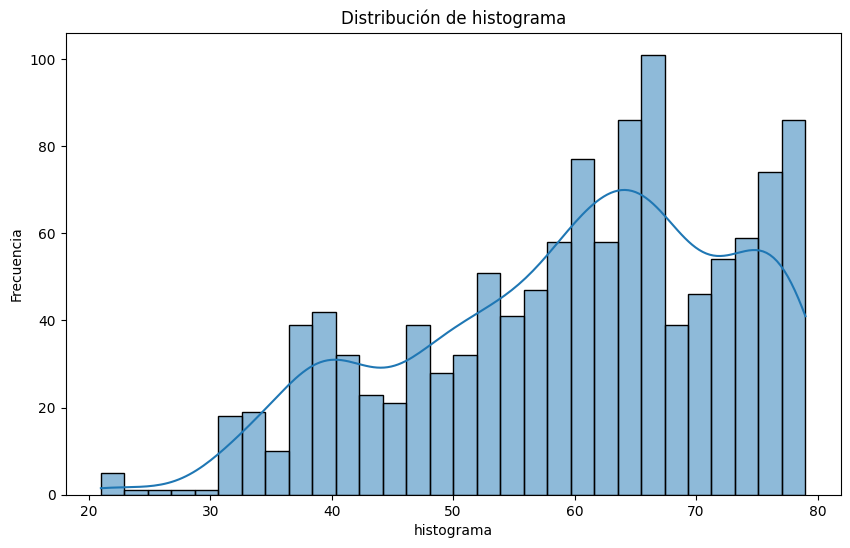

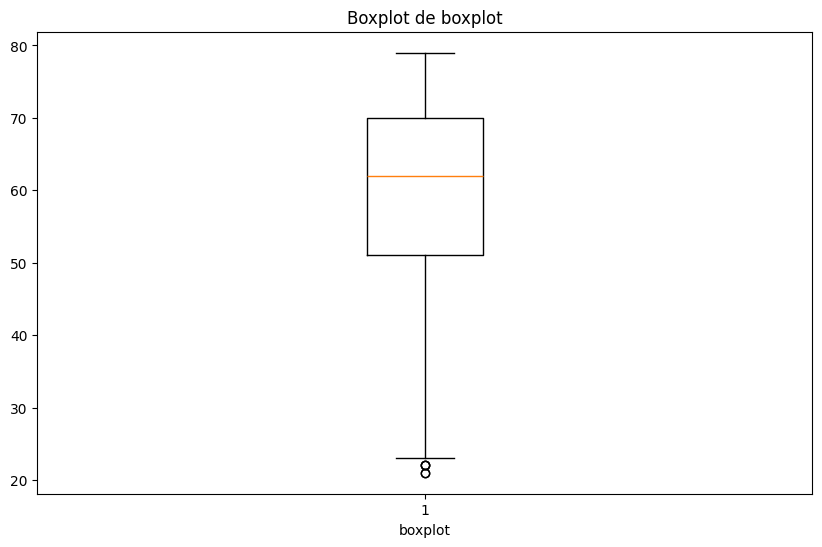

In [55]:
histogram(df_toyota_limpio['age_08_04_calculada'])
boxplot(df_toyota_limpio['age_08_04_calculada'])

Limpiamos `age_08_04_calculada` 

12


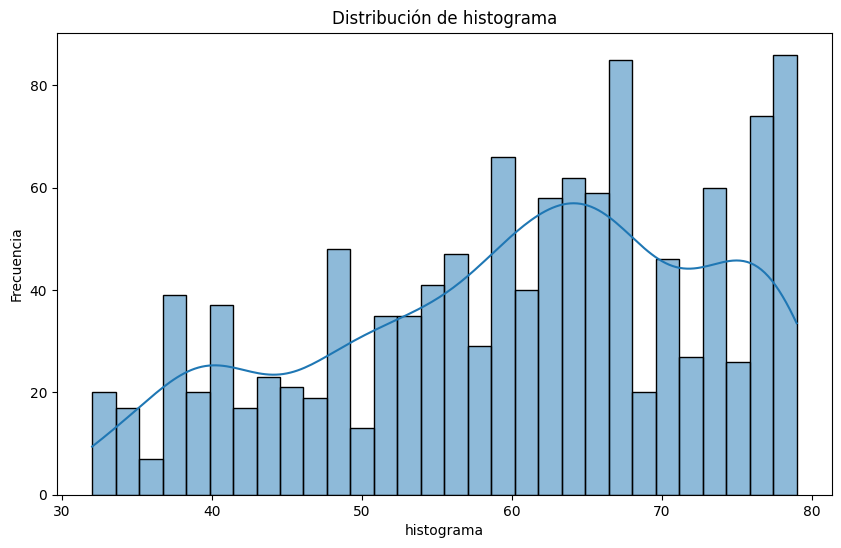

In [ ]:
age = df_toyota_limpio['age_08_04_calculada'].copy()

outliers_age= age[age<32]

print(len(outliers_age) )

_ , mask_age = filtrar_columna_por_rango(age,32,age.max())

df_toyota_limpio = df_toyota_limpio[mask_age]

histogram(df_toyota_limpio['age_08_04_calculada'])






Eliminamos las columnas que se mencionaron en el anterior analisis

In [57]:
df_toyota_limpio.drop(columns=['quarterly_tax', 'cc', 'weight','mfg_month', 'mfg_year', 'hp', 'doors', 'gears', 'guarantee_period','airbag_1', 'automatic_airco', 'power_steering', 'automatic','fuel_type'], axis=1, inplace=True)

In [58]:
df_toyota_limpio.shape

(1177, 21)

mostraremos `matriz de correlacion` y `scatterplot`

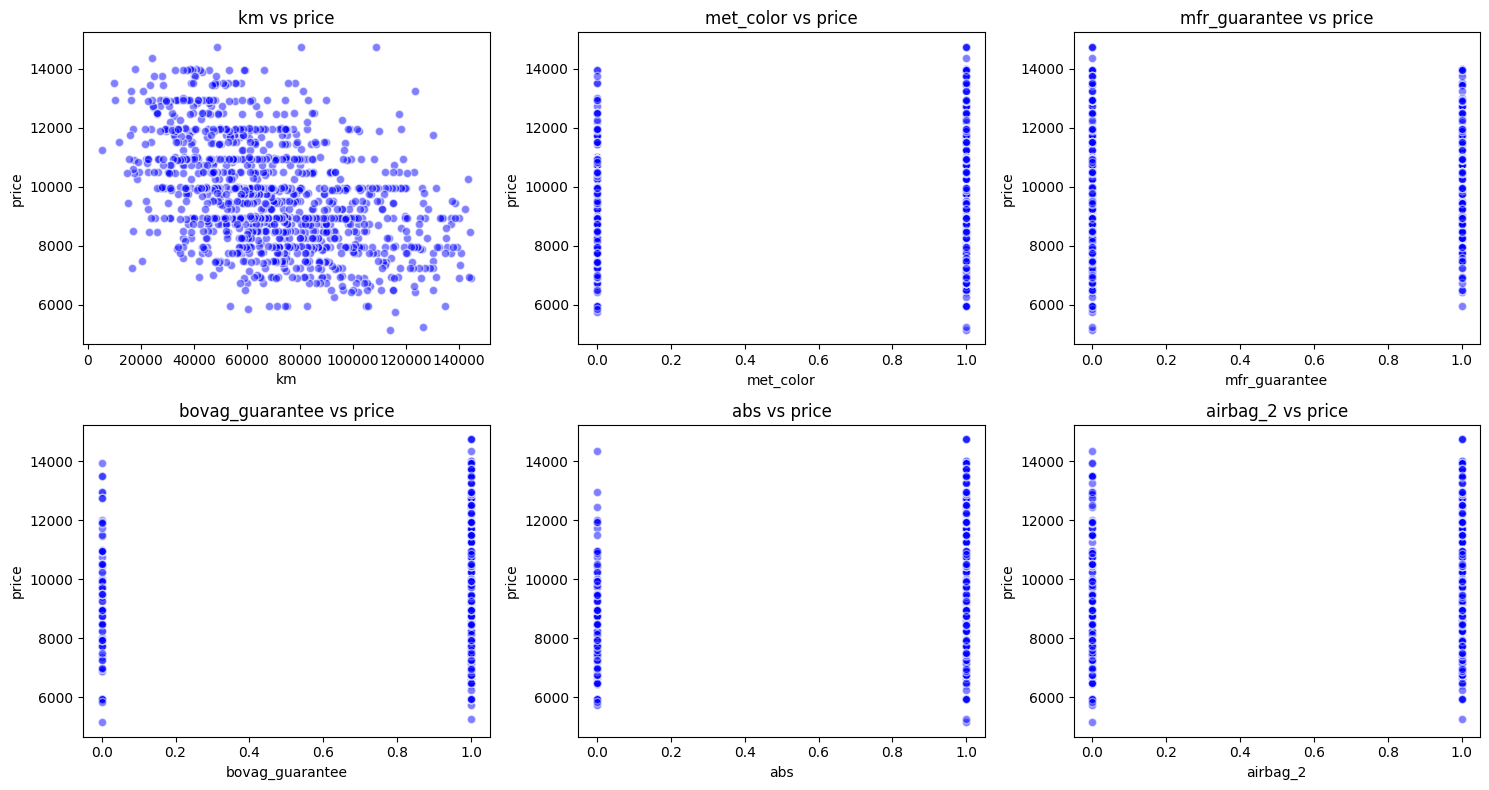

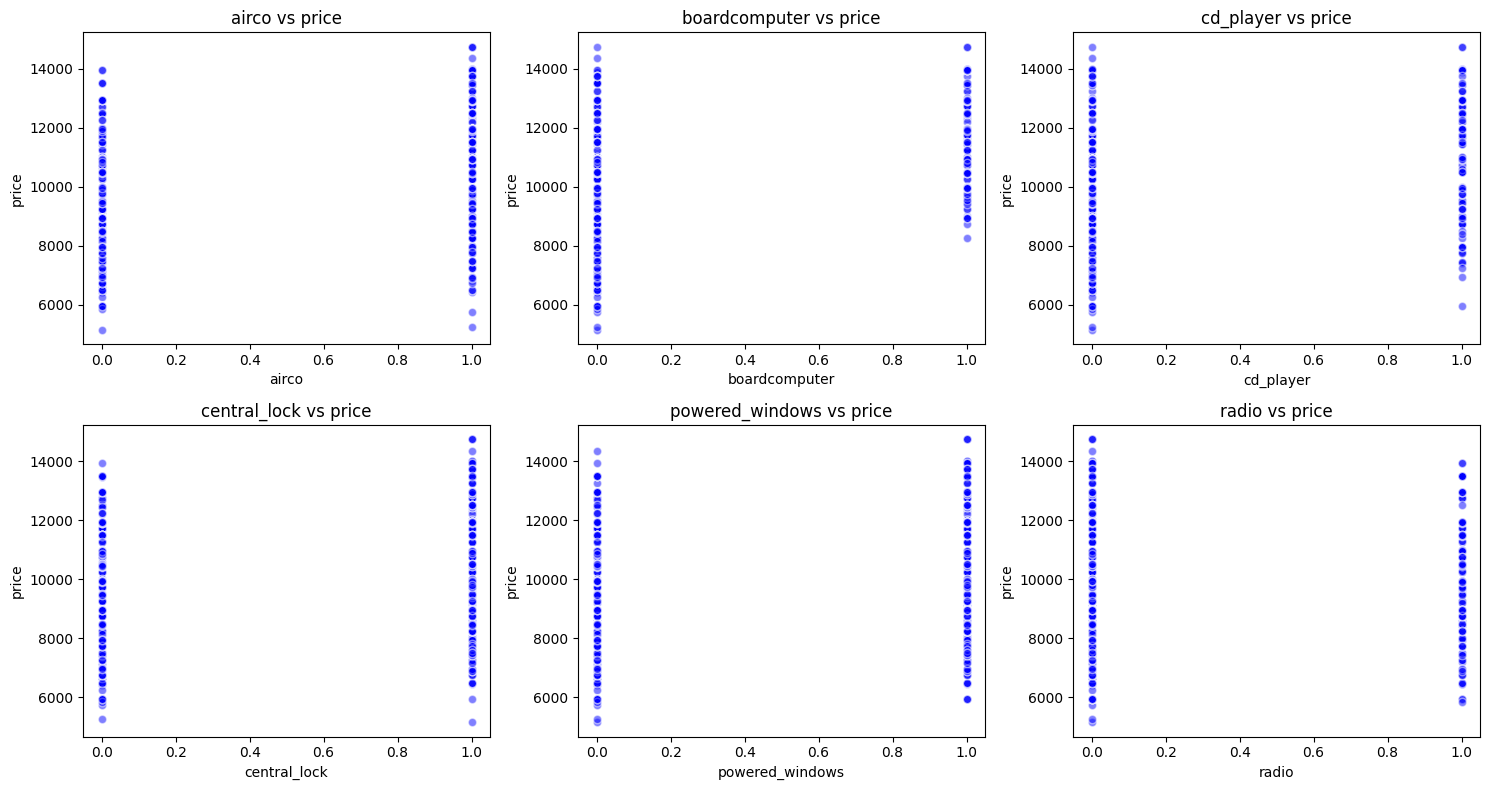

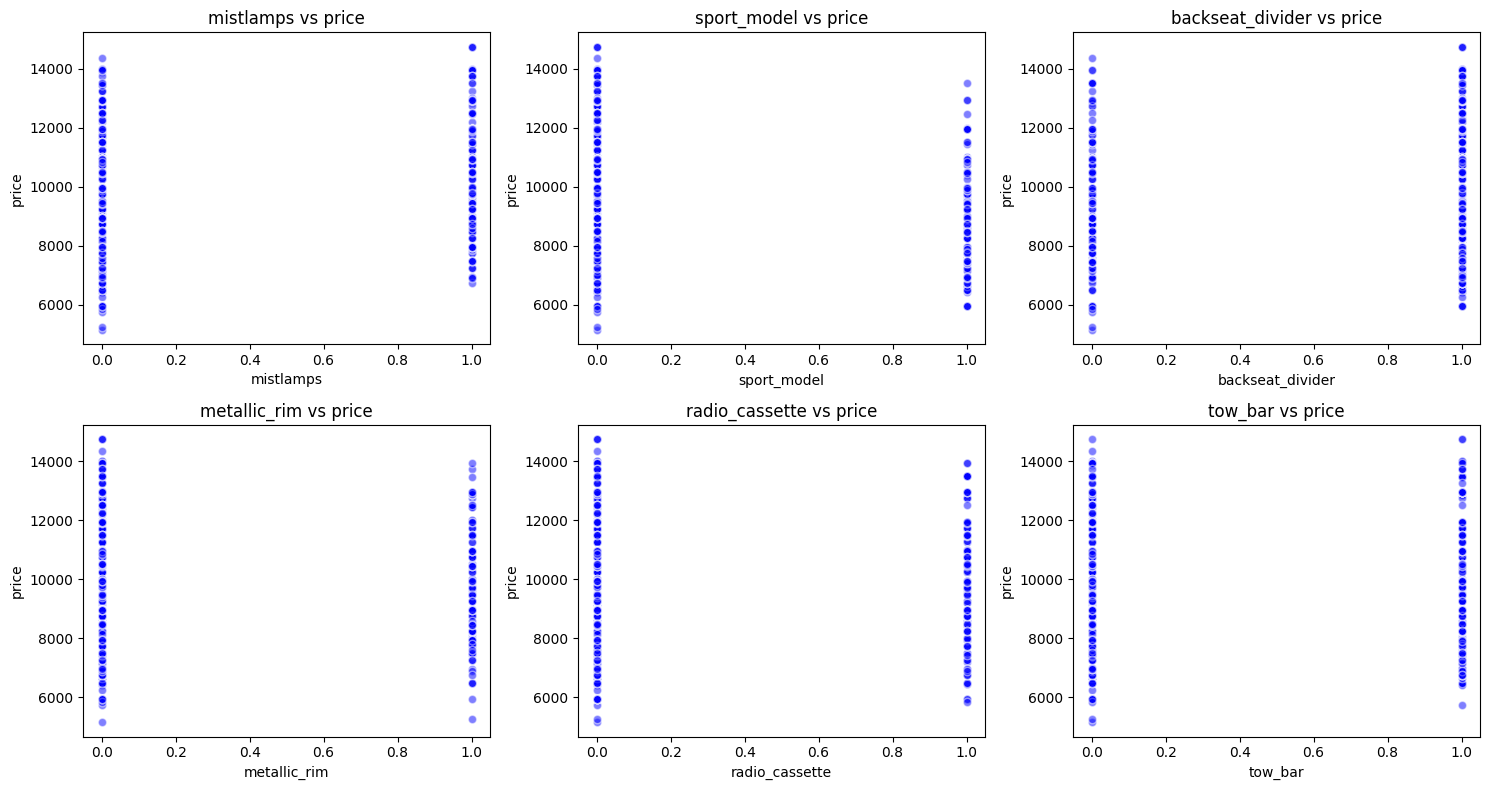

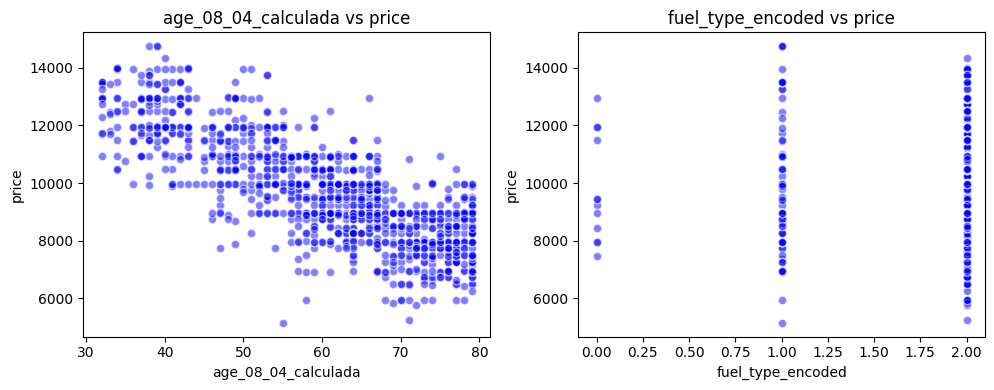

In [59]:
scatter_por_lotes(df_toyota_limpio)

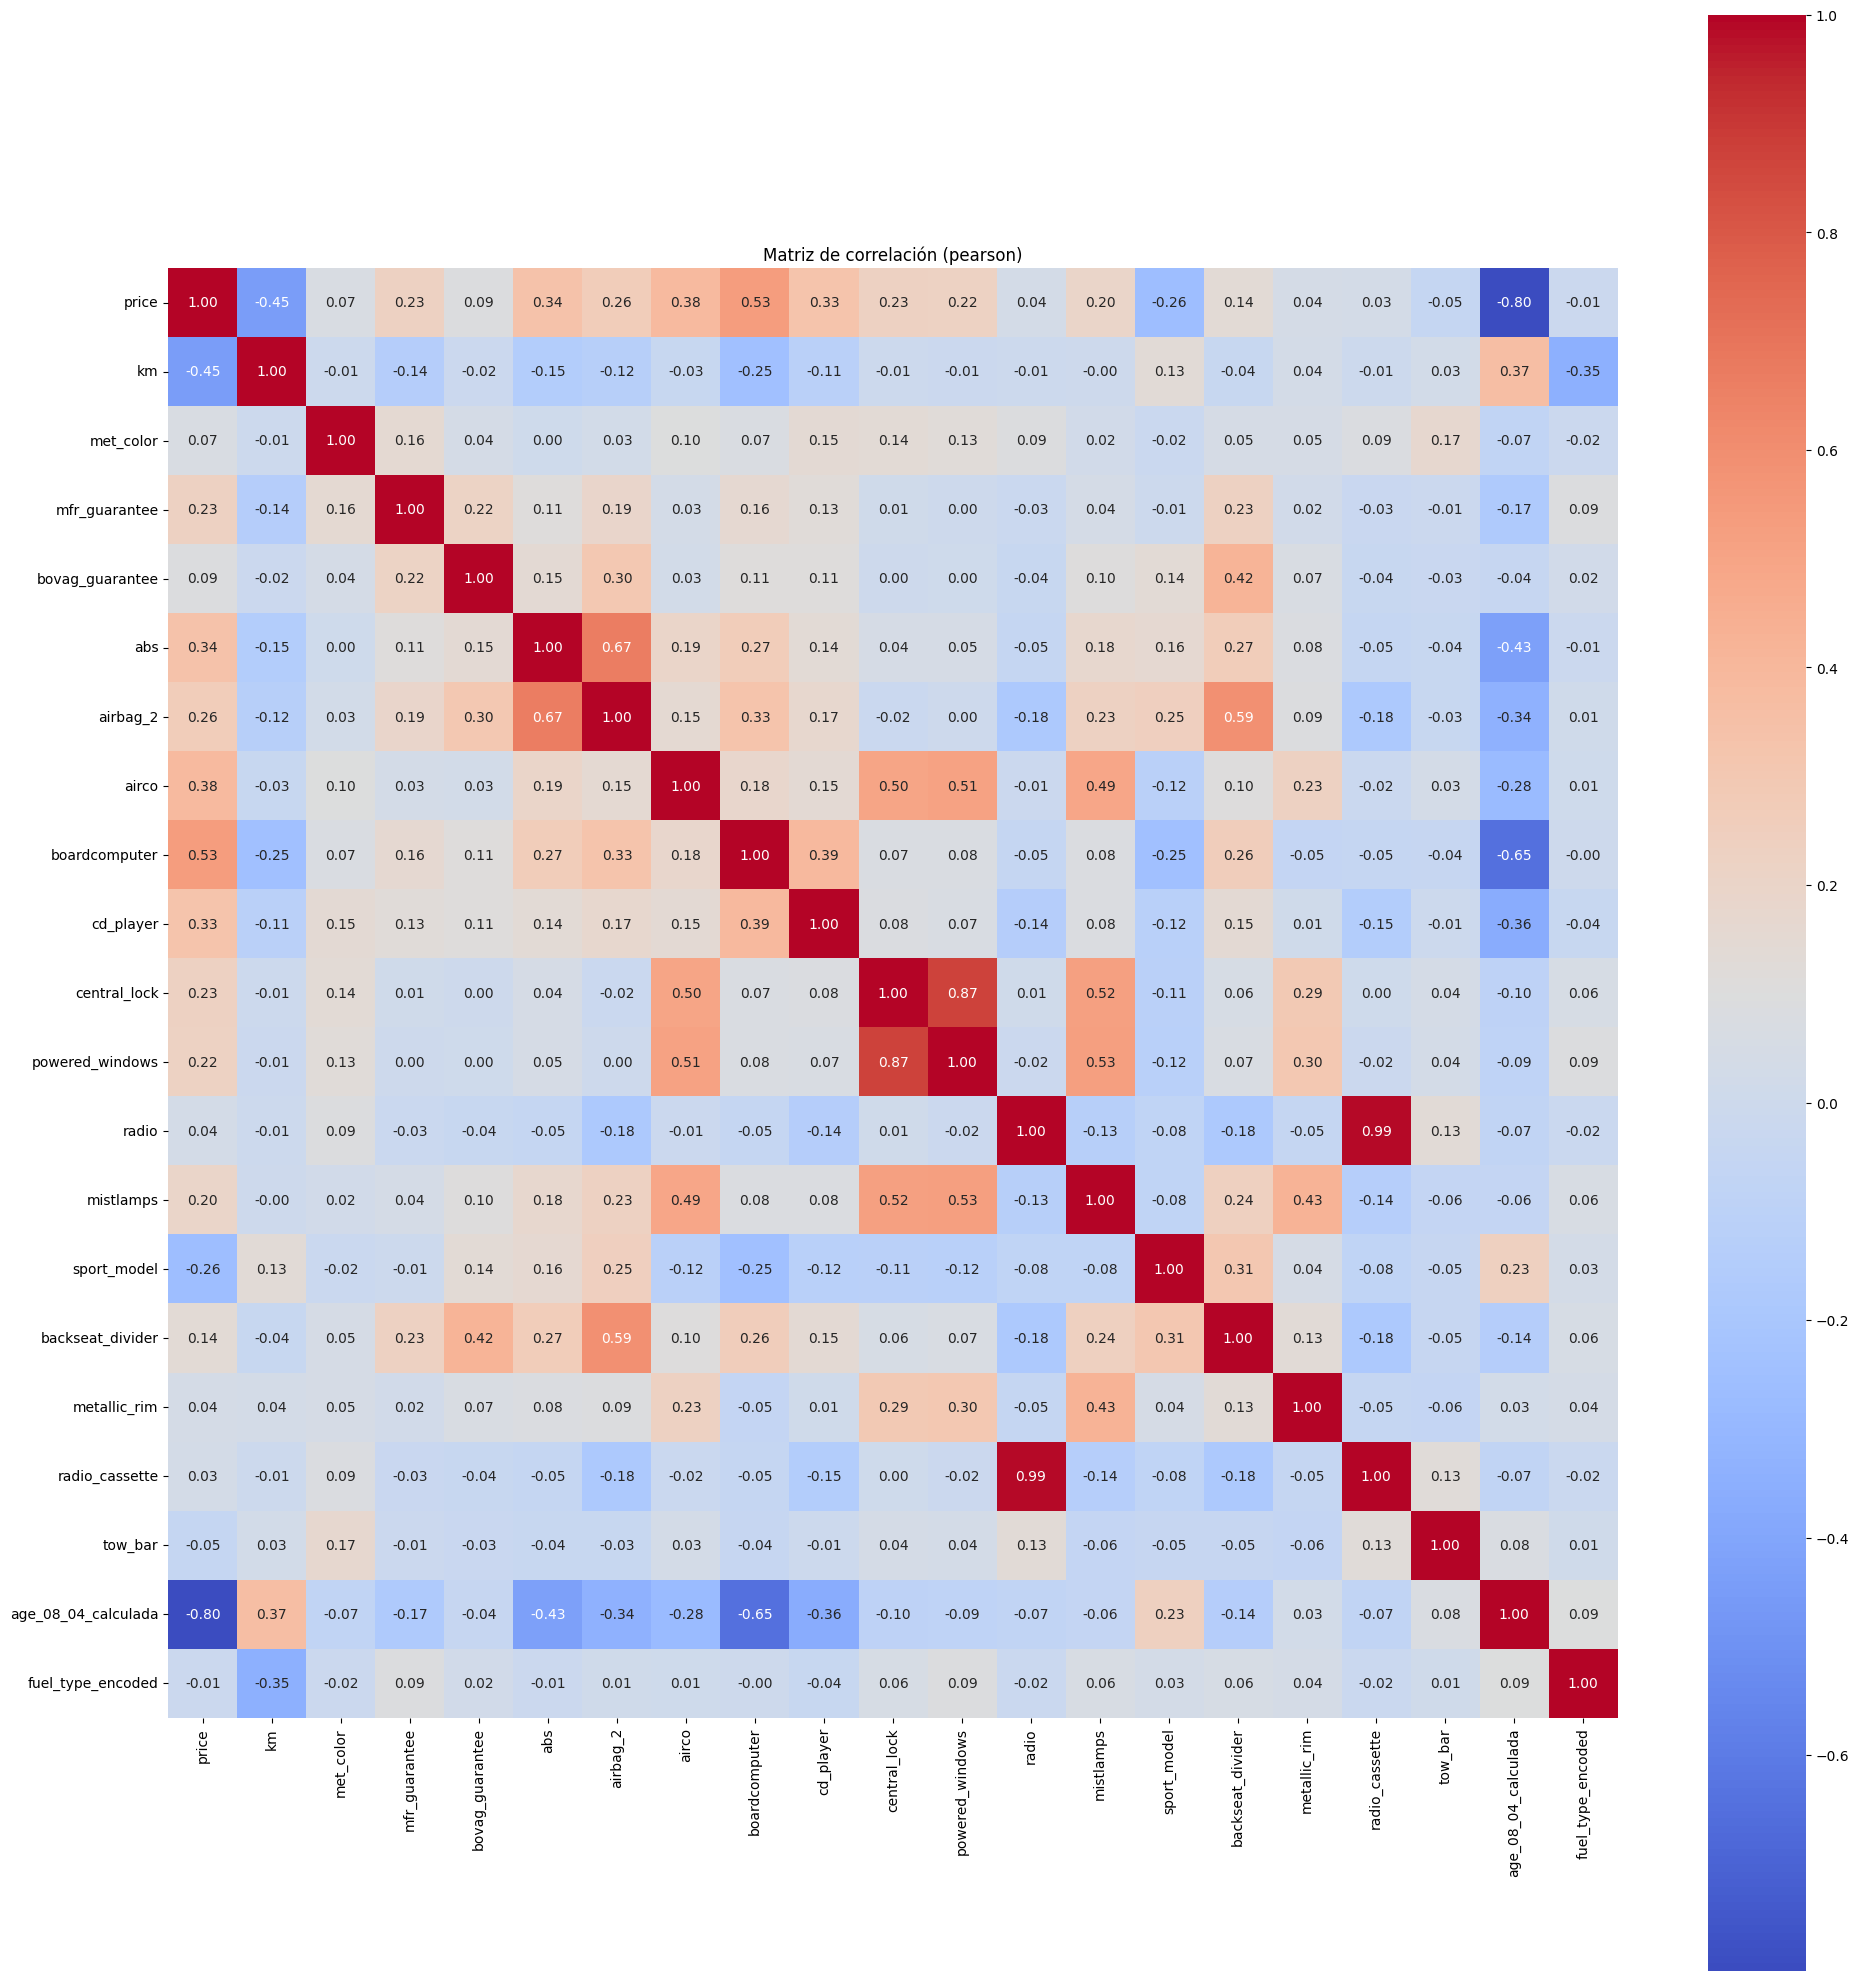

In [60]:
mostrar_matriz_correlacion(df_toyota_limpio)

In [61]:
obtener_correlaciones_target(df_toyota_limpio.corr(), 'price')

variable  correlacion
7         boardcomputer     0.533503
6                 airco     0.382220
4                   abs     0.337938
8             cd_player     0.329207
5              airbag_2     0.263527
2         mfr_guarantee     0.232675
9          central_lock     0.228966
10      powered_windows     0.223330
12            mistlamps     0.196633
14     backseat_divider     0.141420
3       bovag_guarantee     0.090061
1             met_color     0.066555
15         metallic_rim     0.038572
11                radio     0.035277
16       radio_cassette     0.031154
19    fuel_type_encoded    -0.014165
17              tow_bar    -0.049435
13          sport_model    -0.260344
0                    km    -0.446720
18  age_08_04_calculada    -0.798482

mostramos los pares correlacioanes mayores a `0.60` para poder eliminarlos para evitar la multicolinealidad

In [62]:
pares_correlacion_altas(df_toyota_limpio.corr(),0.60)

Variable_1           Variable_2  Correlación
0          radio       radio_cassette     0.990406
1   central_lock      powered_windows     0.871258
2          price  age_08_04_calculada    -0.798482
3            abs             airbag_2     0.668578
4  boardcomputer  age_08_04_calculada    -0.648529

- `radio` y `radio_cassete` muy correlacionadas nos quedamos con la primera

- `central_lock` y `powered_windows` muy correlacionadas nos quedamos con la primera

- `abs` y `airbag_2` muy correlacionadas nos quedamos con la primera

- `age_08_04_calculada` y `boardcomputer` muy correlacionadas nos quedamos con la primera




In [63]:
df_toyota_limpio.drop(columns=['radio_cassette','powered_windows','airbag_2','boardcomputer'], axis=1, inplace=True)
df_toyota_limpio.shape



(1177, 17)

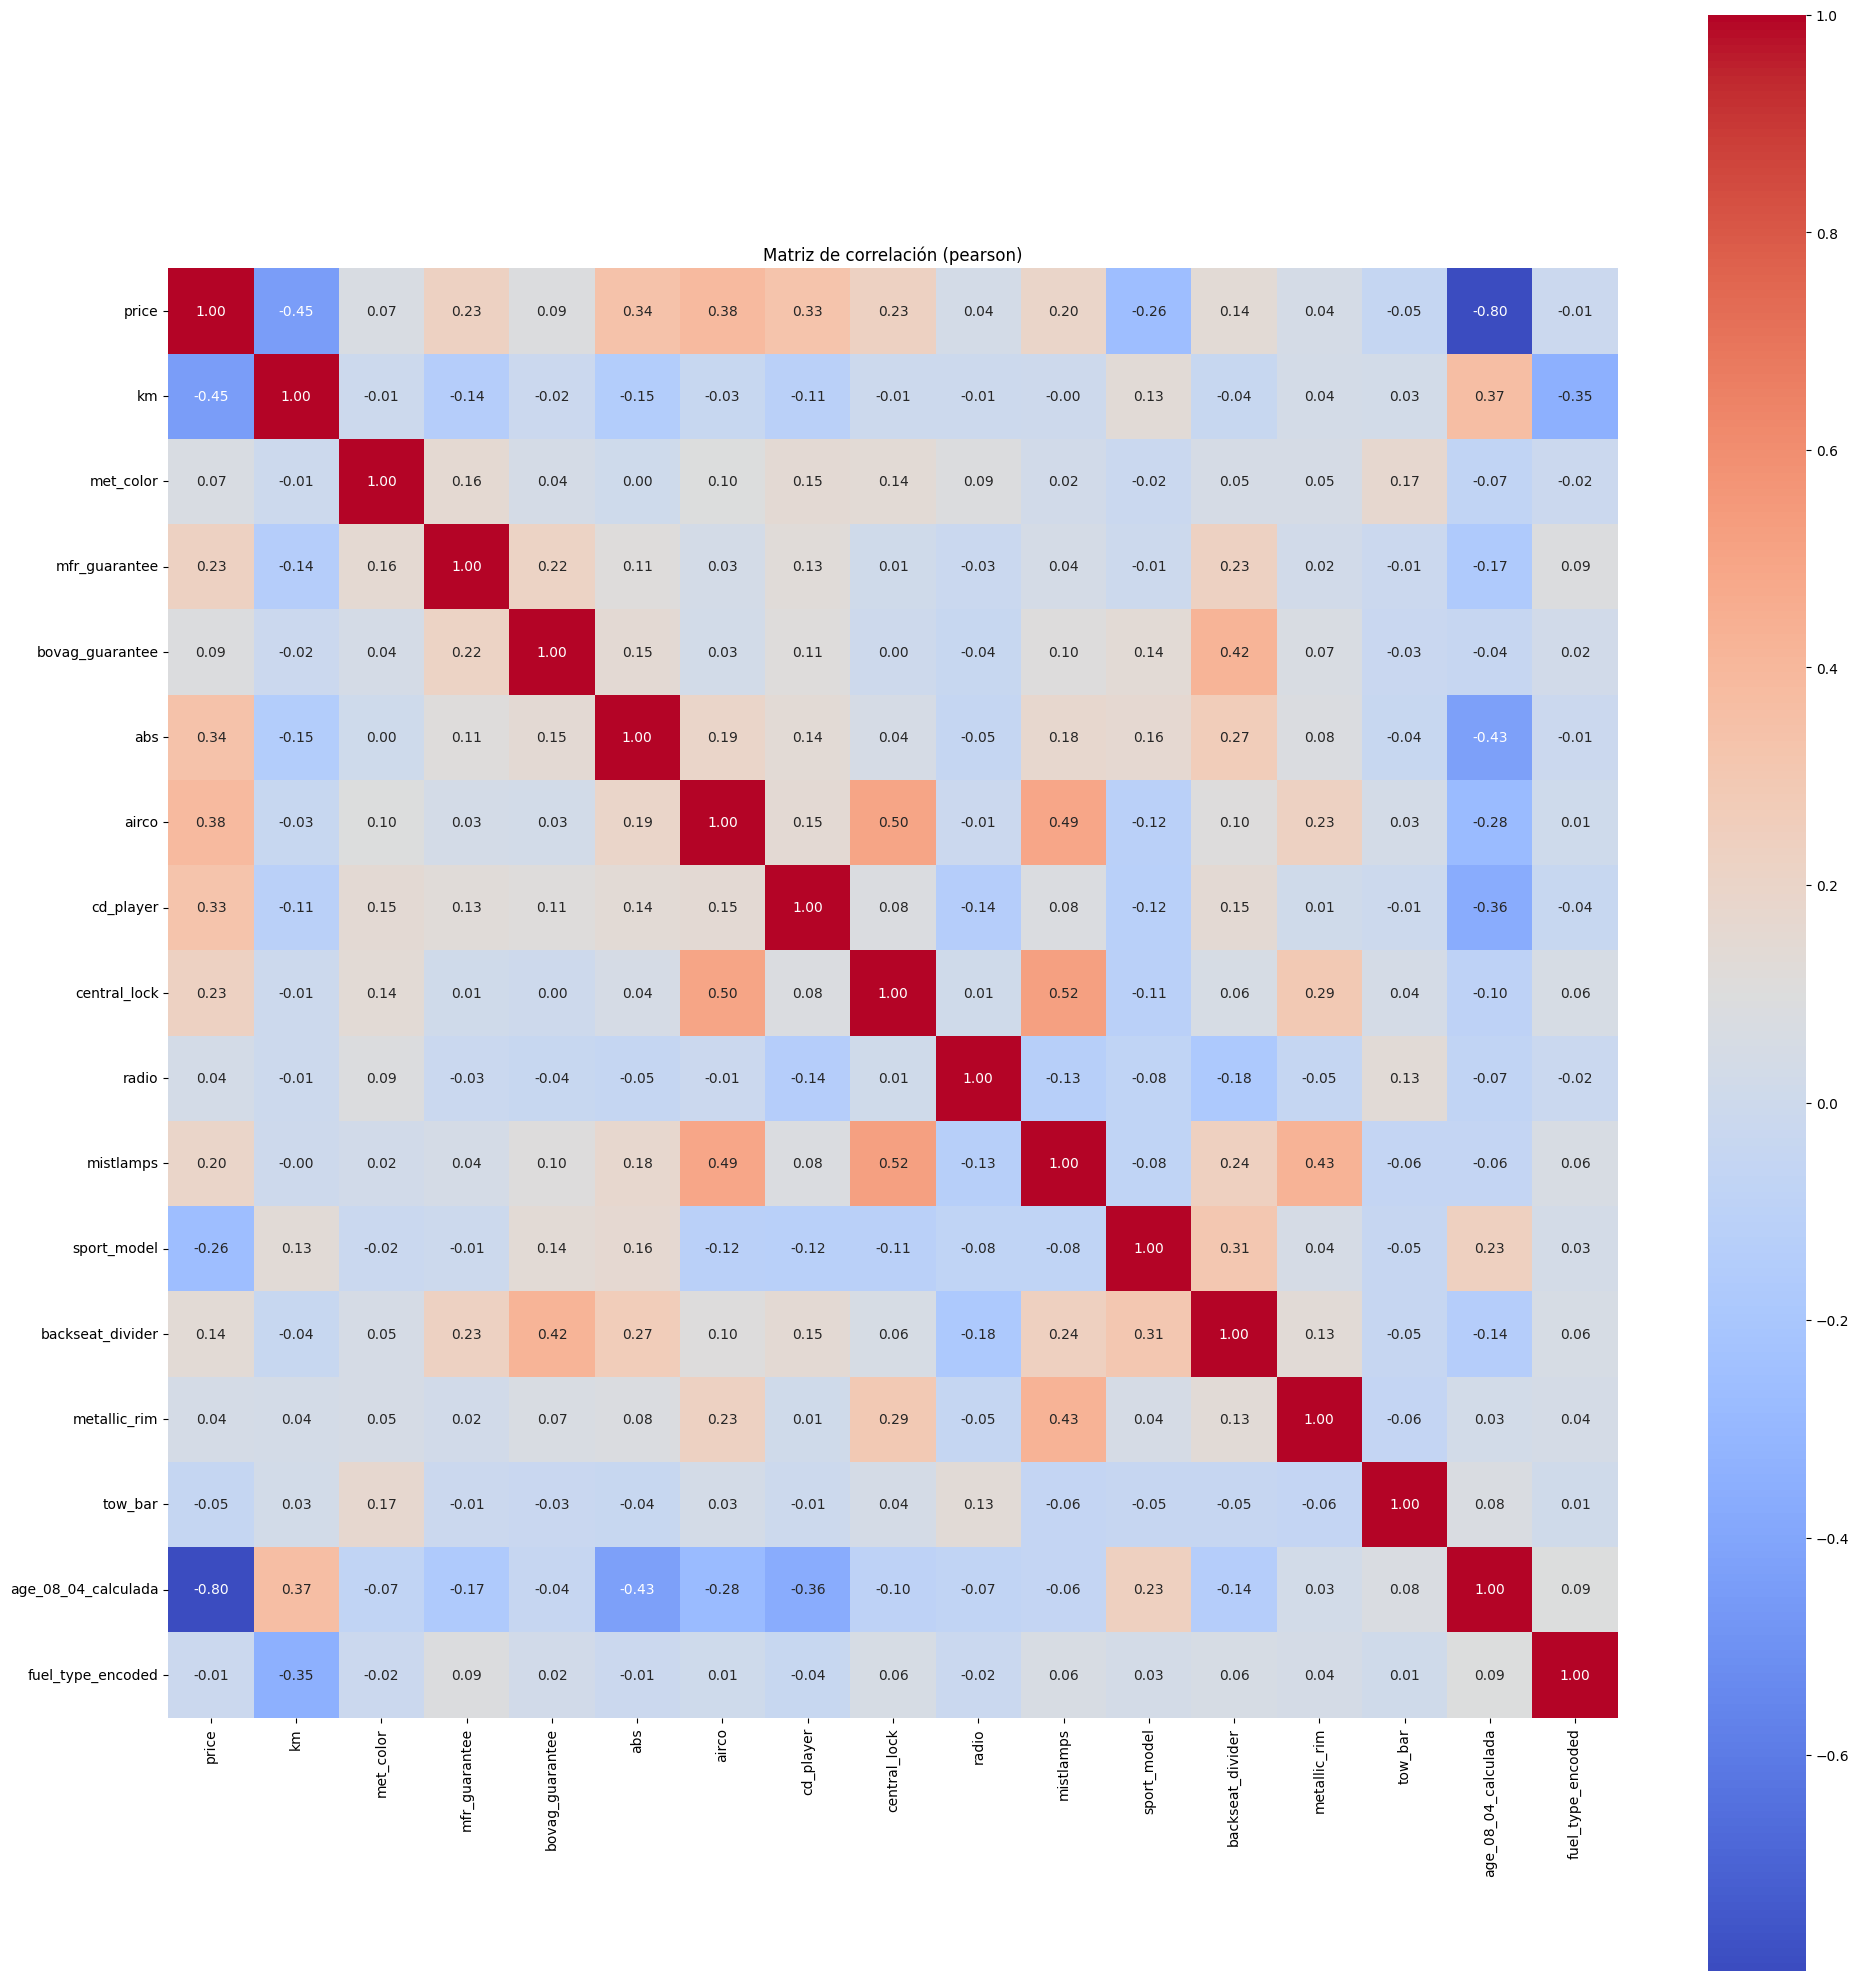

In [64]:
mostrar_matriz_correlacion(df_toyota_limpio)

In [65]:

df_toyota_limpio.to_csv('df_toyota_limpio.csv', index=False)

# Acciones a aplicar en el asset `filtrado_y_limpieza`

Eliminamos todas las variables que tengan una correlacion menor o igual a 0.20 con `price`

In [66]:


# Calculamos la correlación de todas las columnas con la variable objetivo
correlations = df_toyota_limpio.corr(numeric_only=True)['price'].abs()

# Seleccionamos las columnas con correlación >= 0.20
relevant_features = correlations[correlations >= 0.20].index

# Creamos un nuevo DataFrame con solo las variables relevantes
df_filtered = df_toyota_limpio[relevant_features]


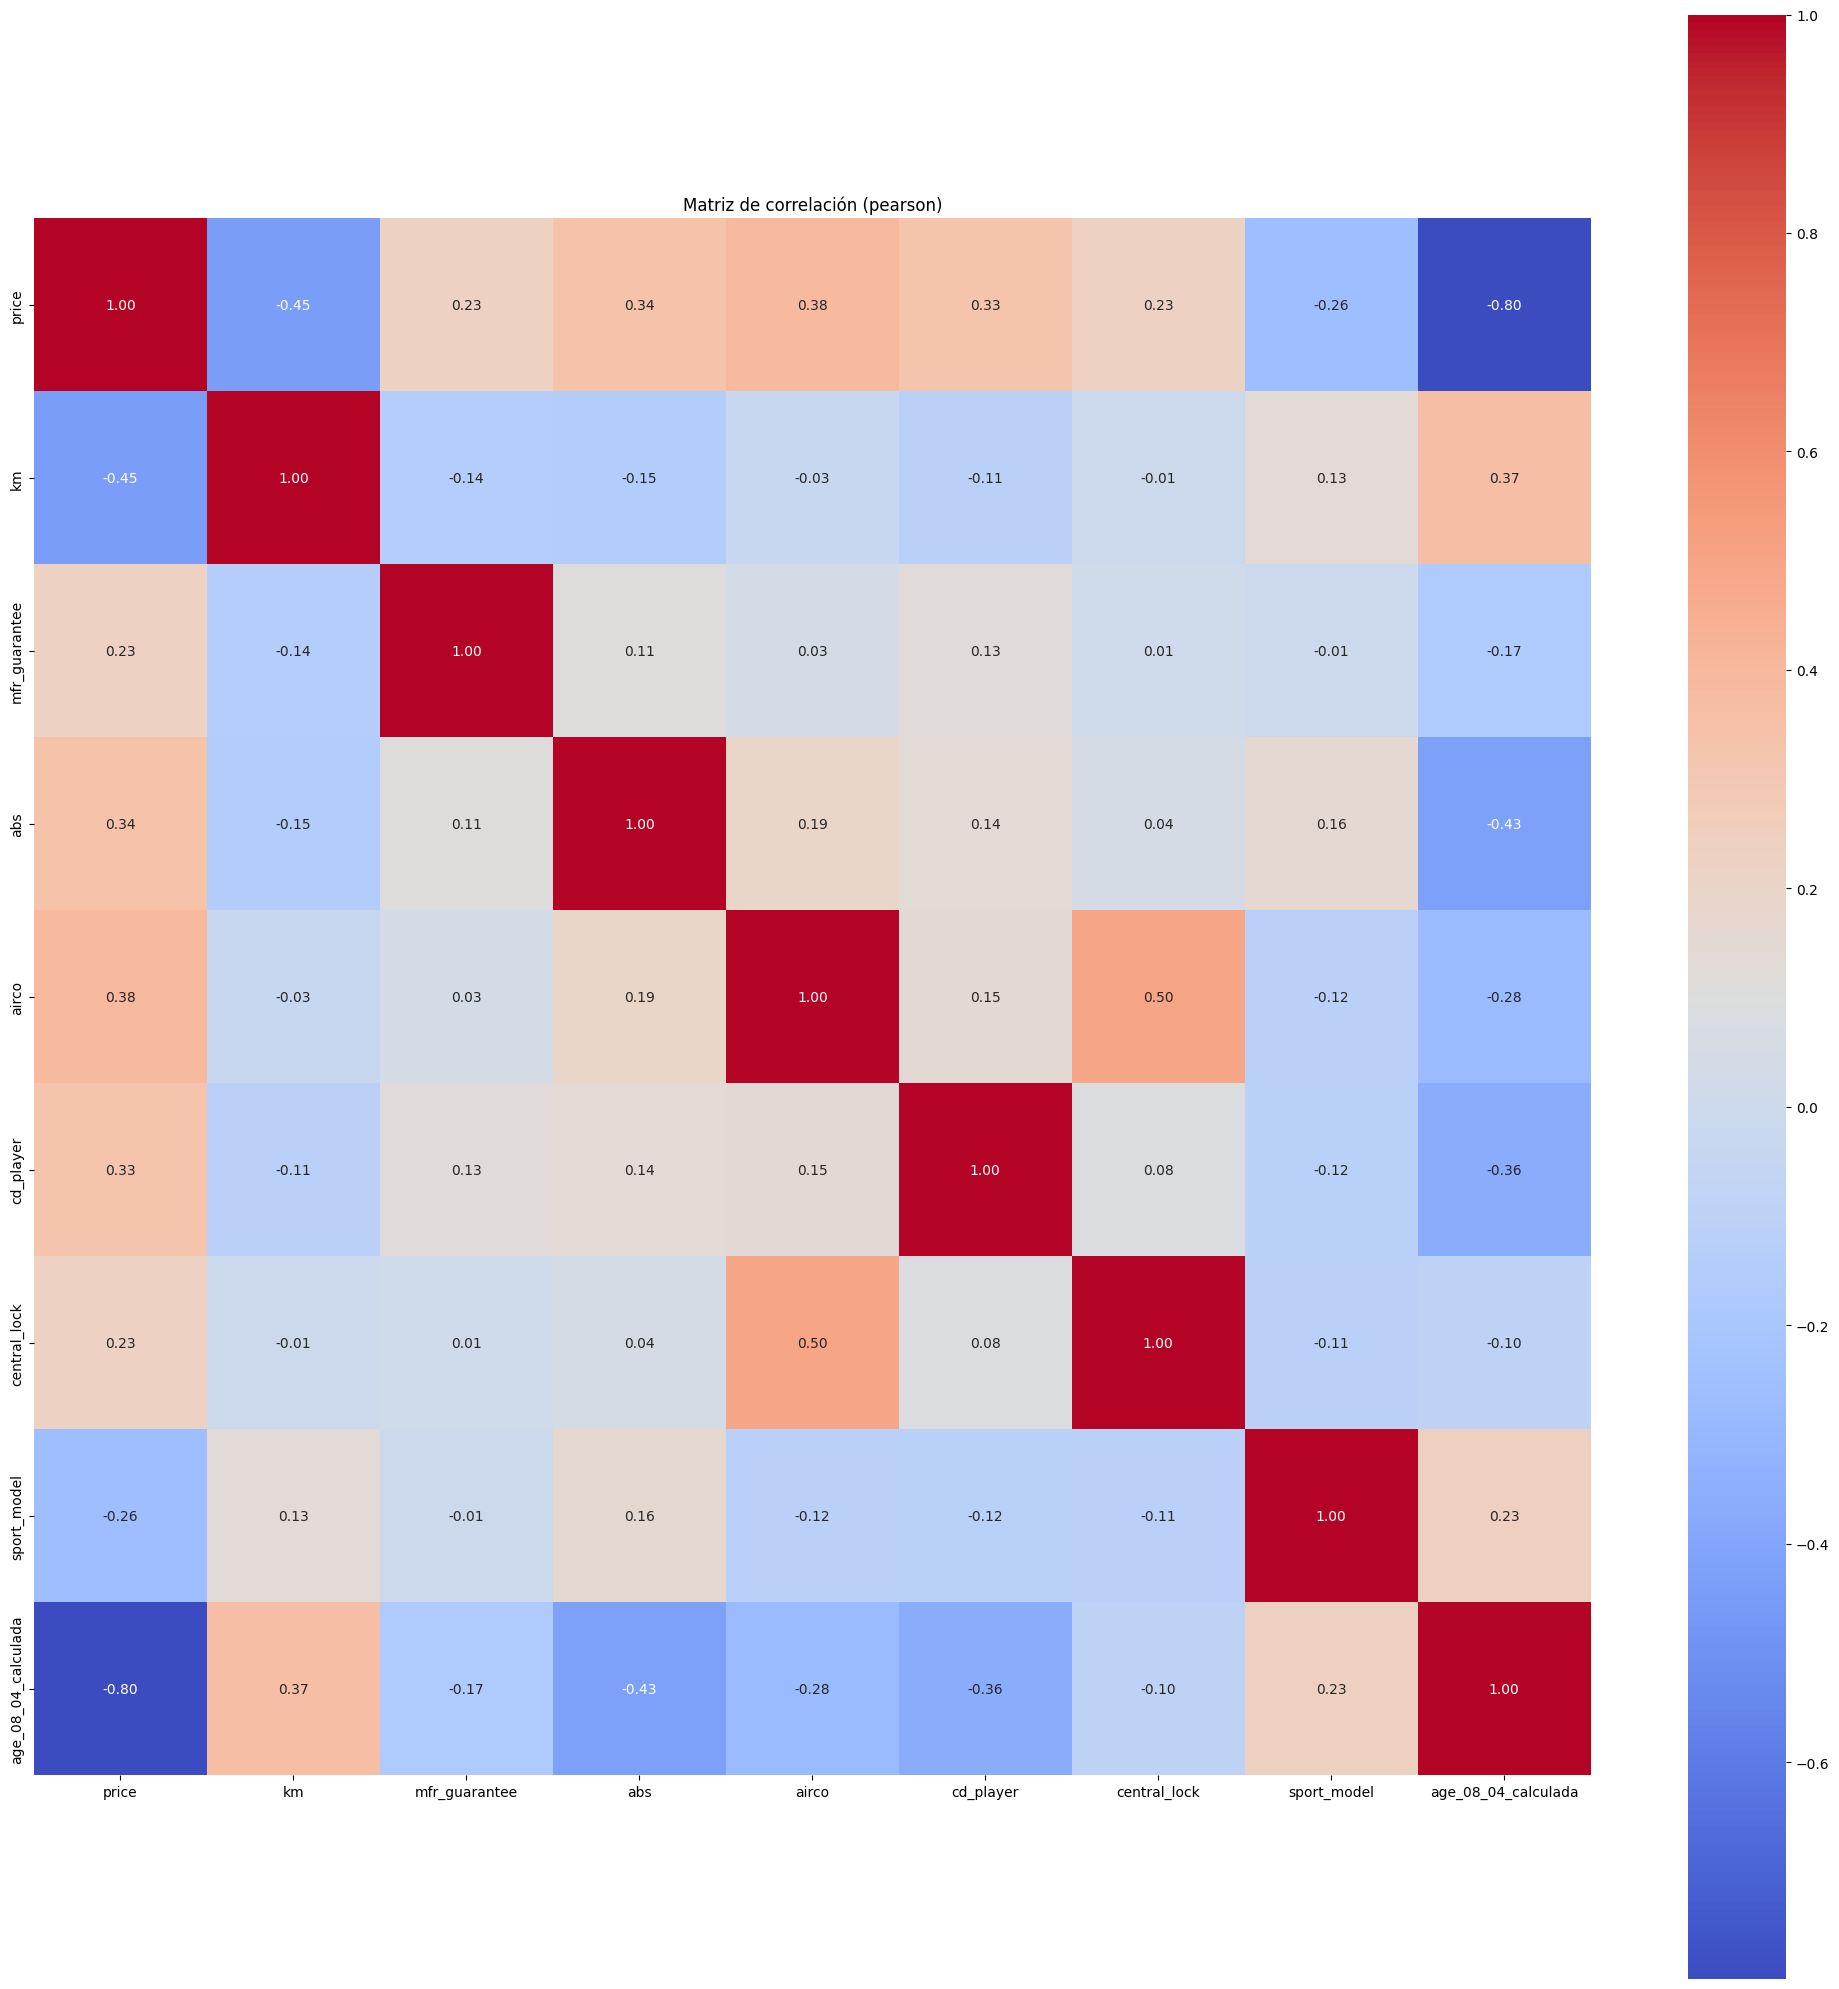

In [67]:
mostrar_matriz_correlacion(df_filtered)

## TRANSFORMACION DE FEATURE

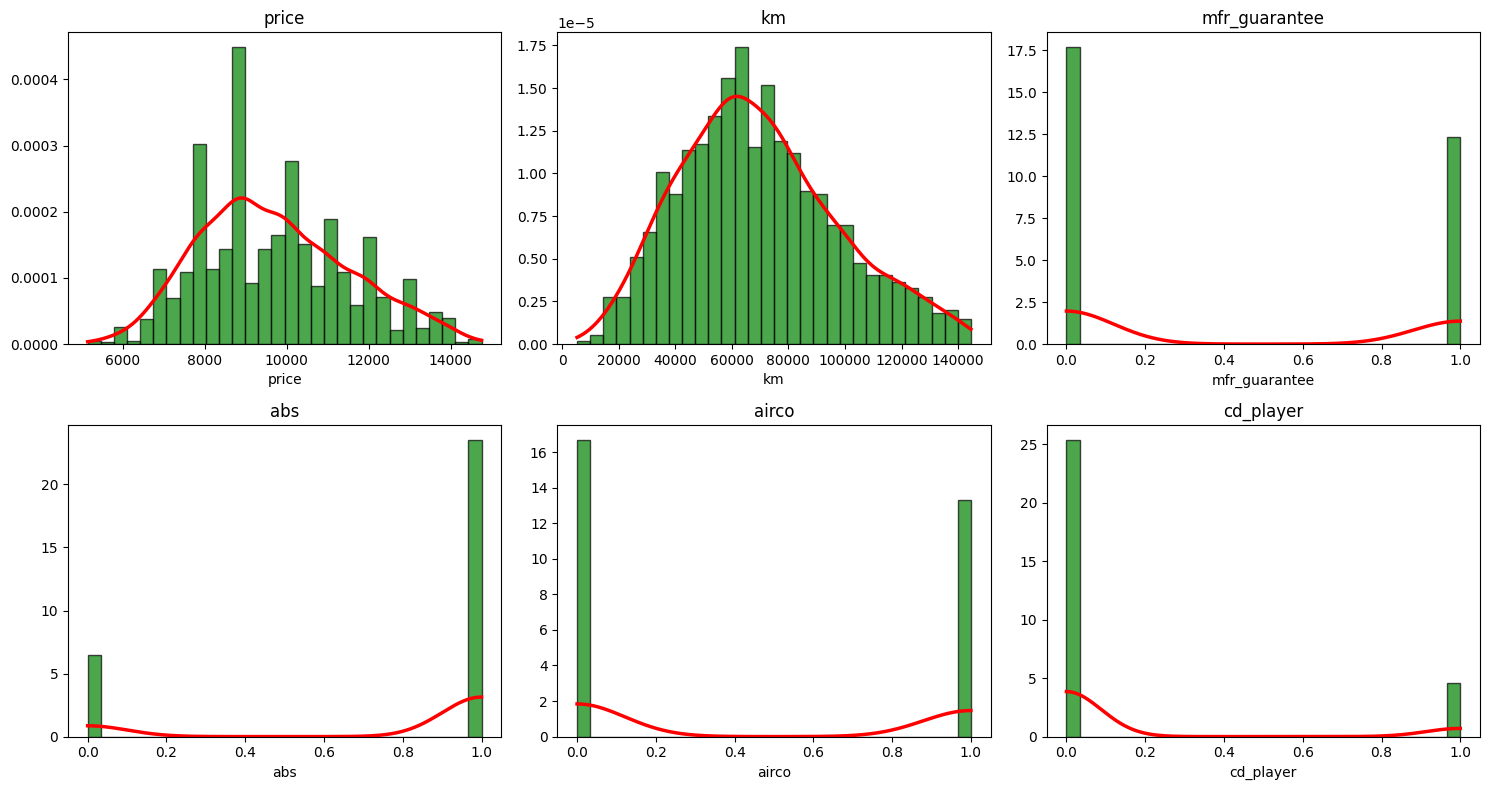

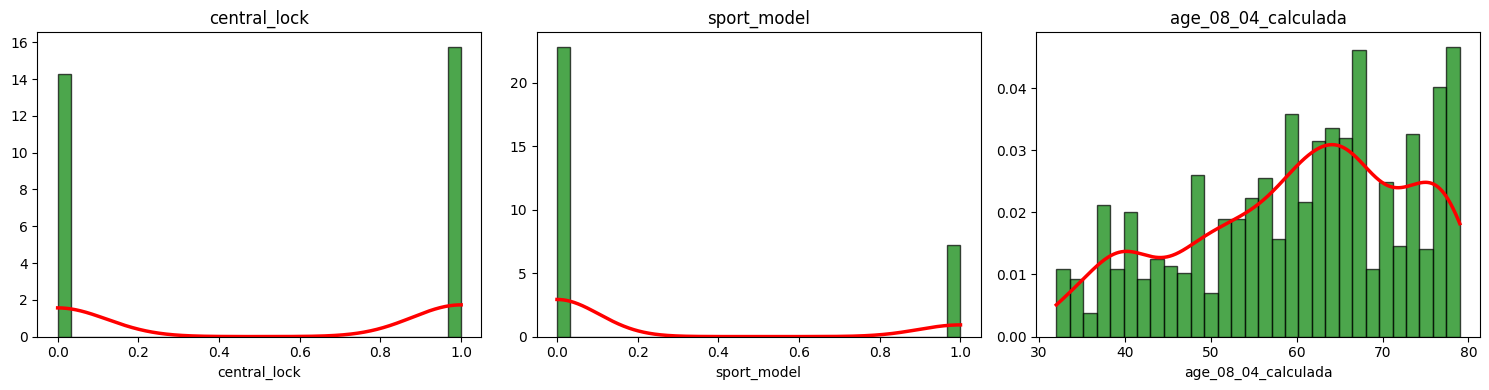

In [68]:
histogram_por_lotes(df_filtered)

Index(['price', 'km', 'mfr_guarantee', 'abs', 'airco', 'cd_player',
       'central_lock', 'sport_model', 'age_08_04_calculada'],
      dtype='object')


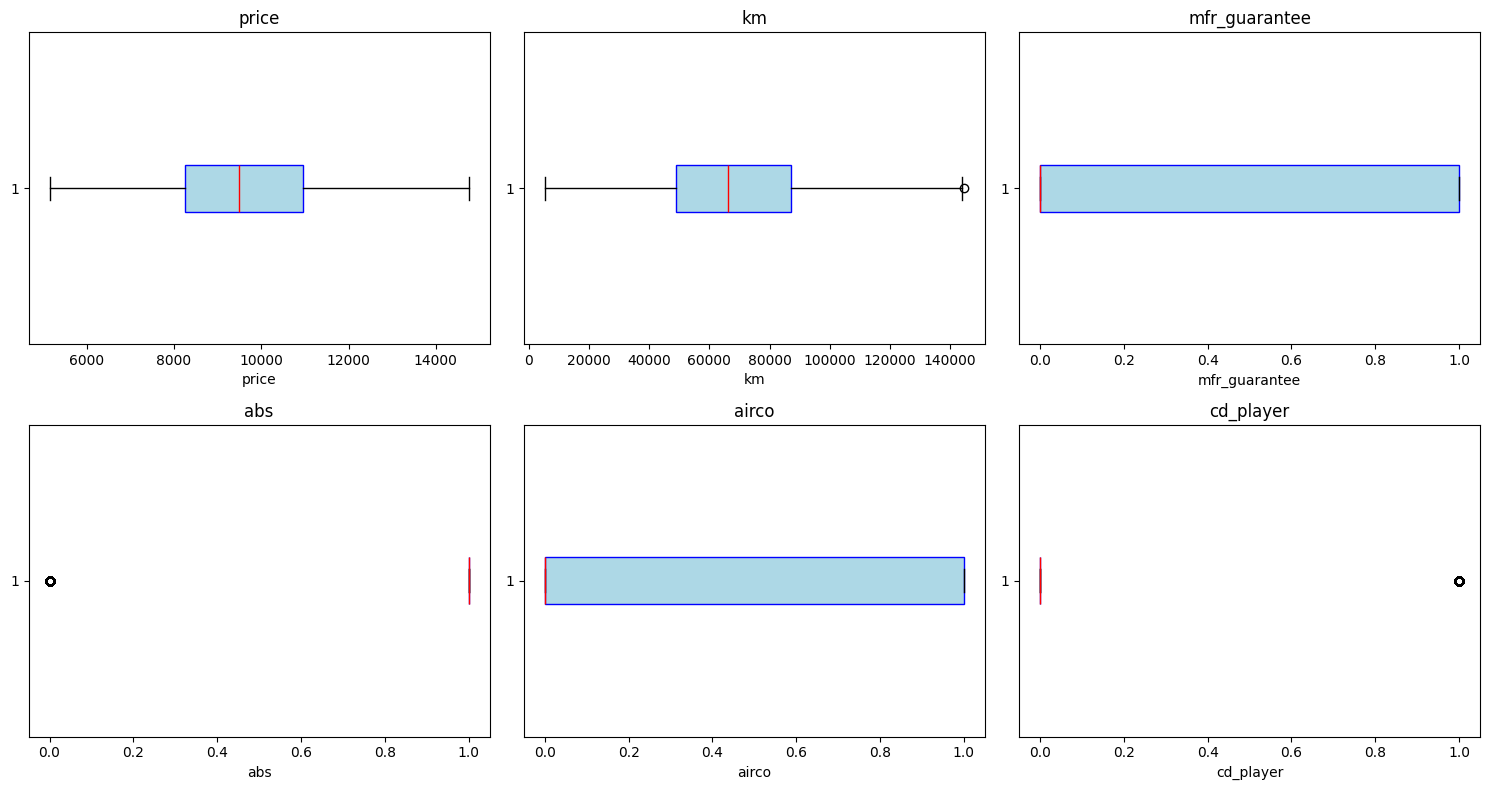

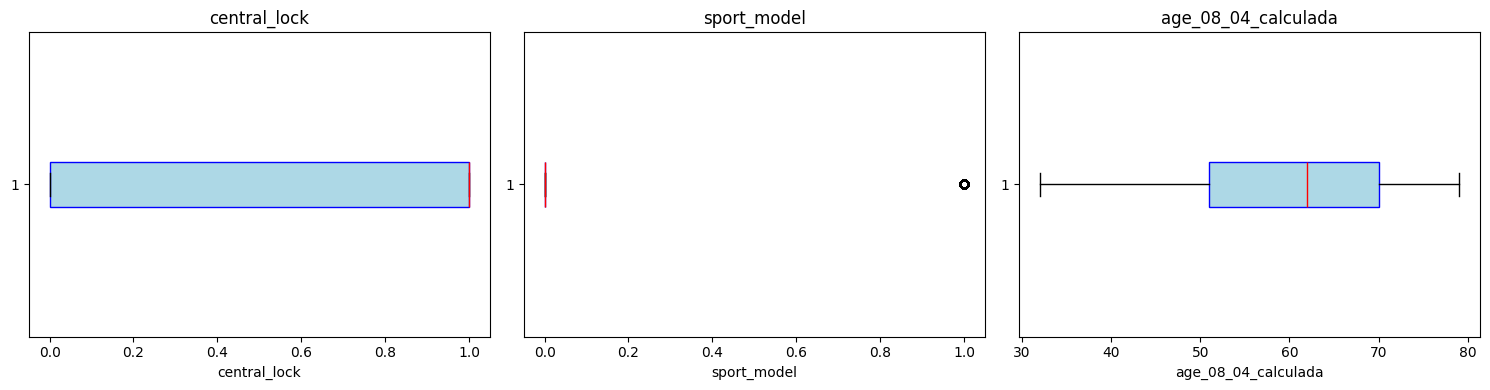

In [69]:
boxplots_por_lotes(df_filtered)

Evidentemente tenemos un problema con las escalas, puesto que en el modelo se van considerar variables binarias por lo tanto vamos a aplicar una tecnica de normalizacion de datos llamda `Min-Max Scaling`  a la siguientes variables: 

- `km`

- `price`

- `age_08_04_calculada`



In [71]:
df_filtered_normalizado = df_filtered.copy()

In [72]:
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()

df_filtered_normalizado['age_08_04_calculada'] = scaler.fit_transform(df_filtered_normalizado['age_08_04_calculada'].values.reshape(-1, 1))

df_filtered_normalizado['km'] = scaler.fit_transform(df_filtered_normalizado['km'].values.reshape(-1, 1))

df_filtered_normalizado['price'] = scaler.fit_transform(df_filtered_normalizado['price'].values.reshape(-1, 1))




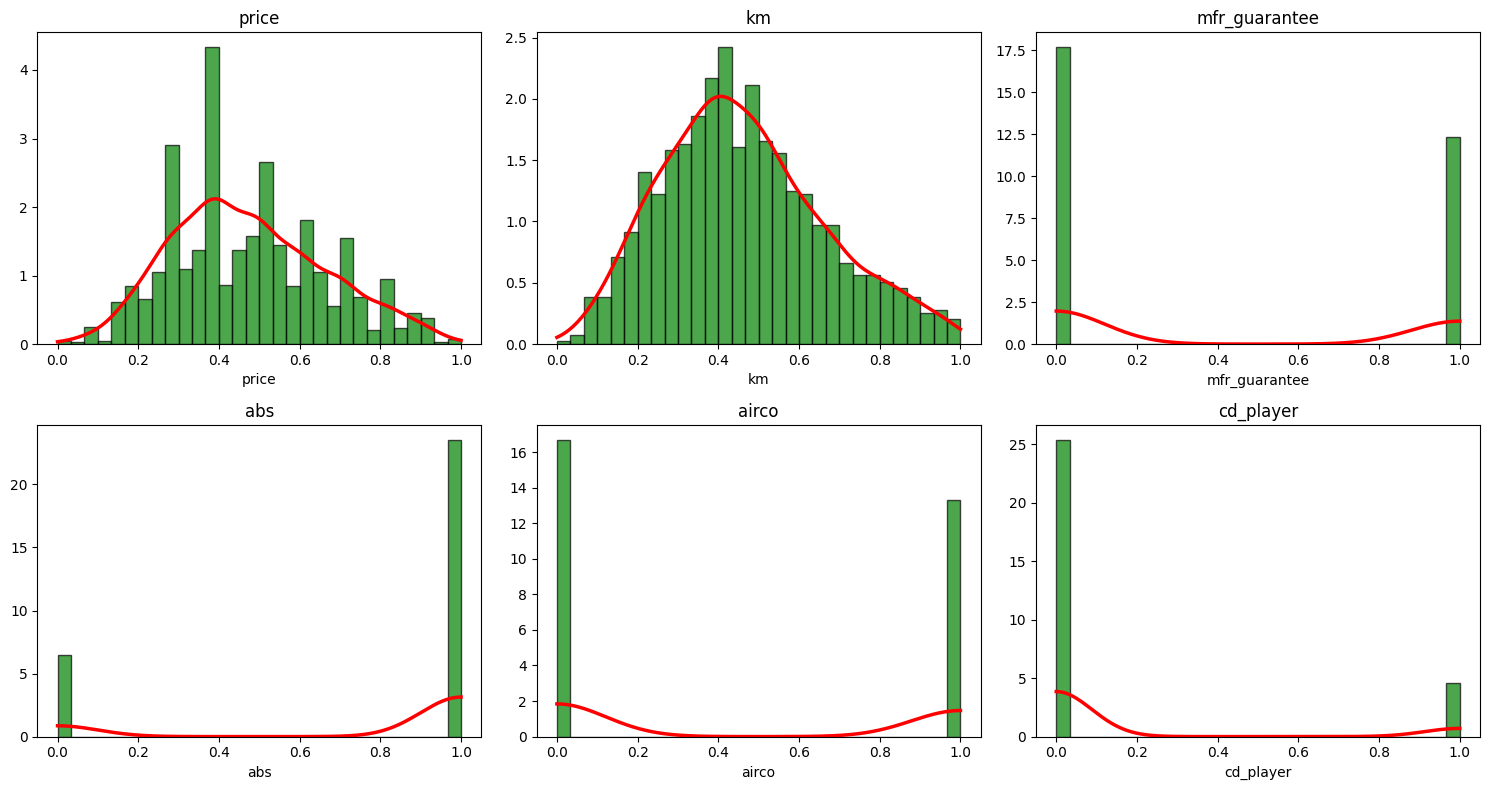

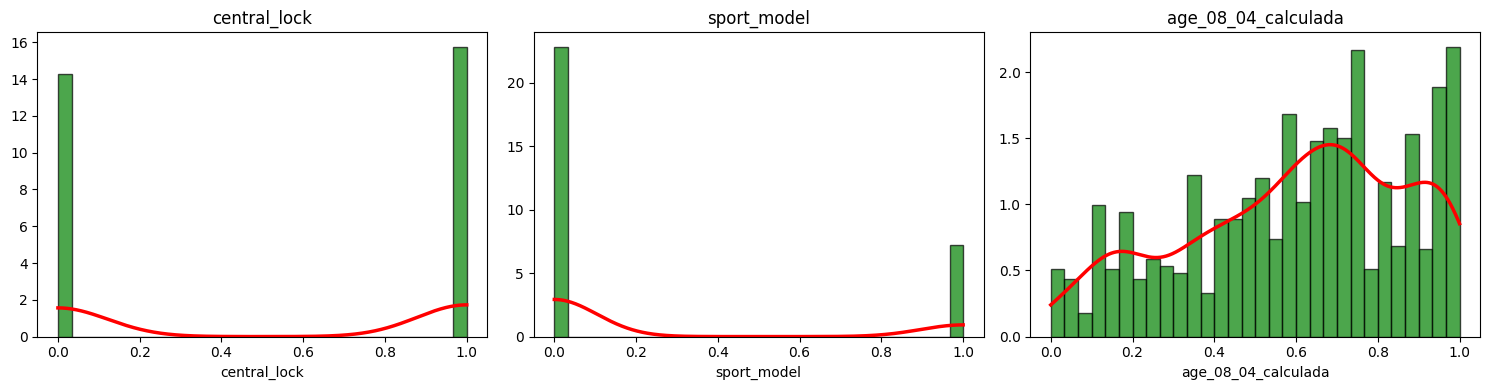

Index(['price', 'km', 'mfr_guarantee', 'abs', 'airco', 'cd_player',
       'central_lock', 'sport_model', 'age_08_04_calculada'],
      dtype='object')


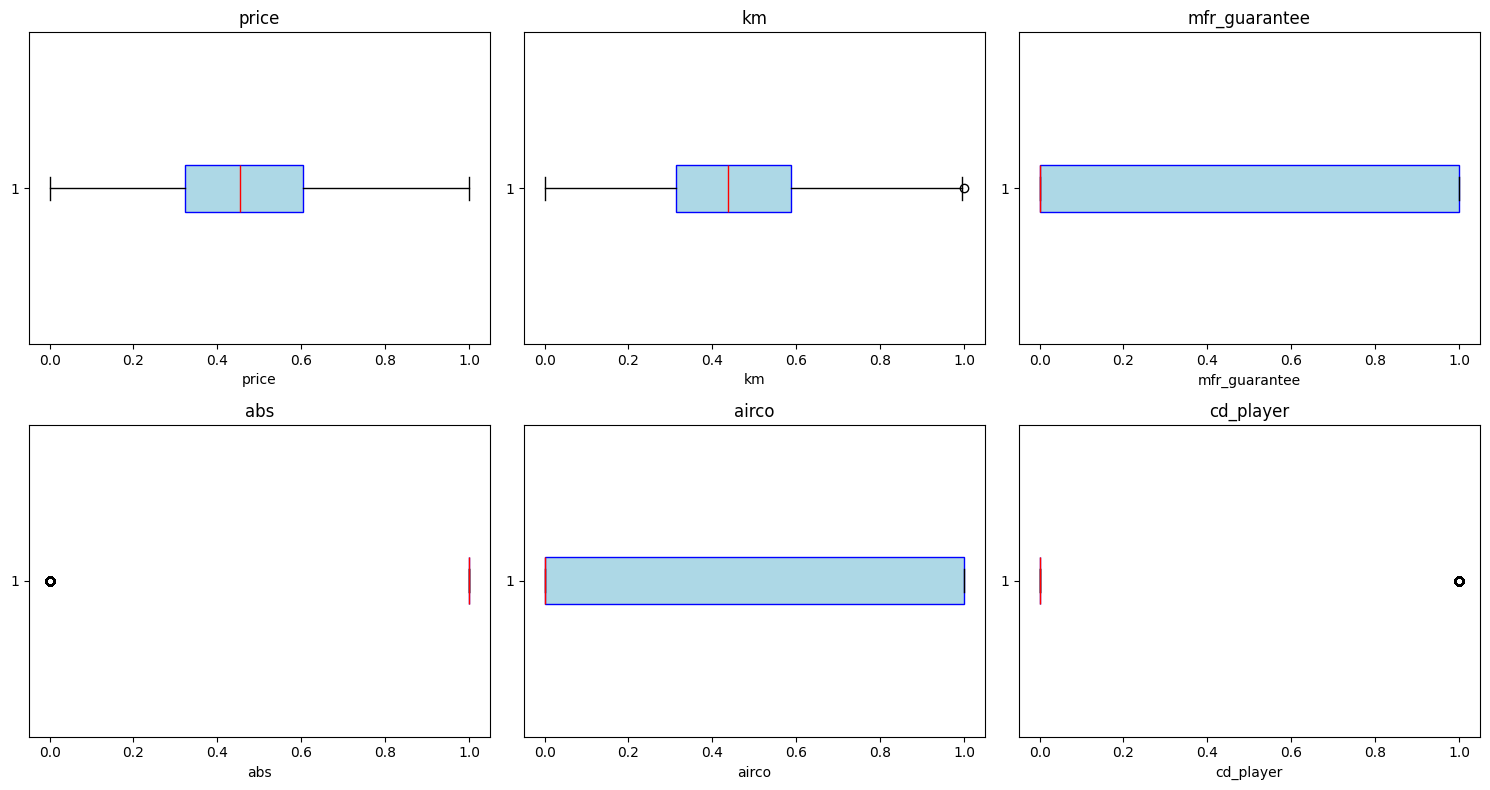

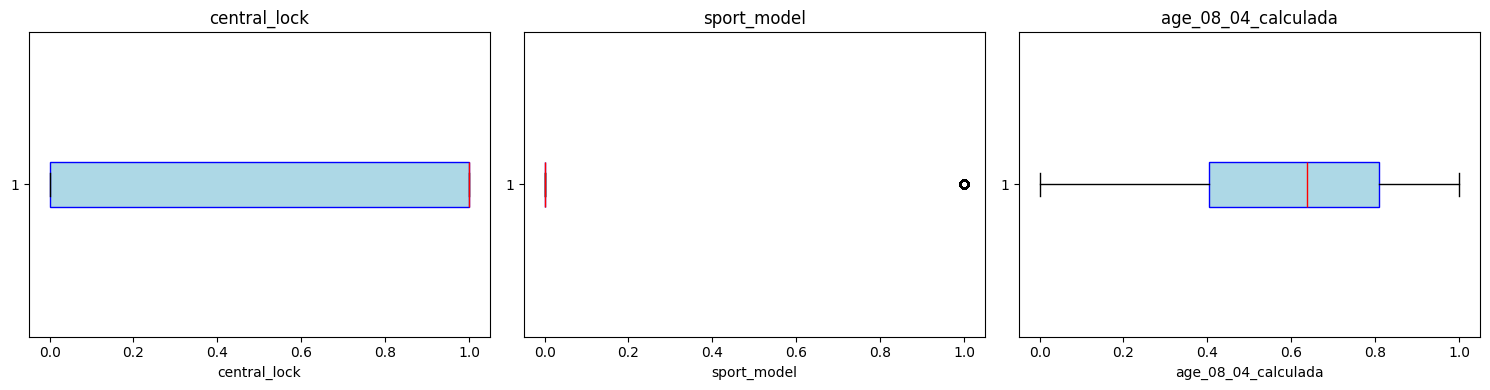

In [73]:
histogram_por_lotes(df_filtered_normalizado)
boxplots_por_lotes(df_filtered_normalizado)






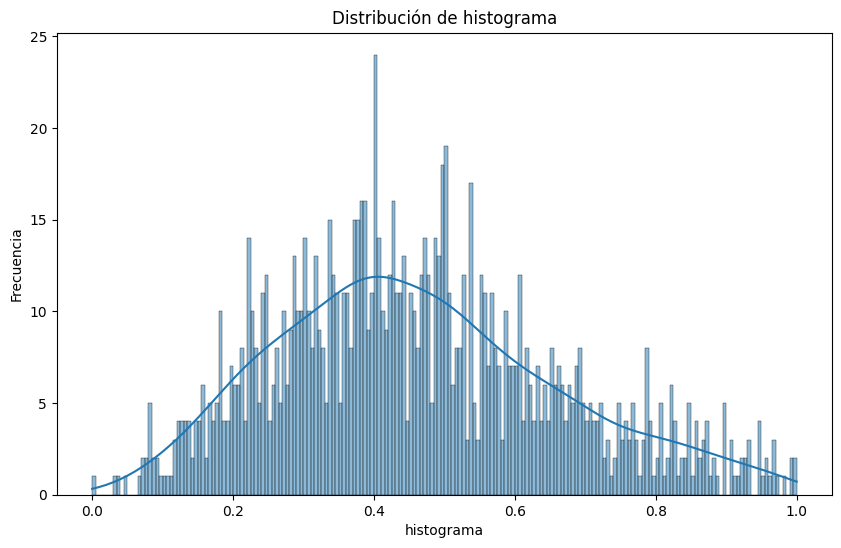

In [74]:
histogram(df_filtered_normalizado['km'],200)

In [75]:
df_filtered_normalizado['km'].describe()

count    1177.000000
mean        0.460960
std         0.200034
min         0.000000
25%         0.313845
50%         0.437168
75%         0.586810
max         1.000000
Name: km, dtype: float64

cortamos a los ambos costados de `km` para mejorar

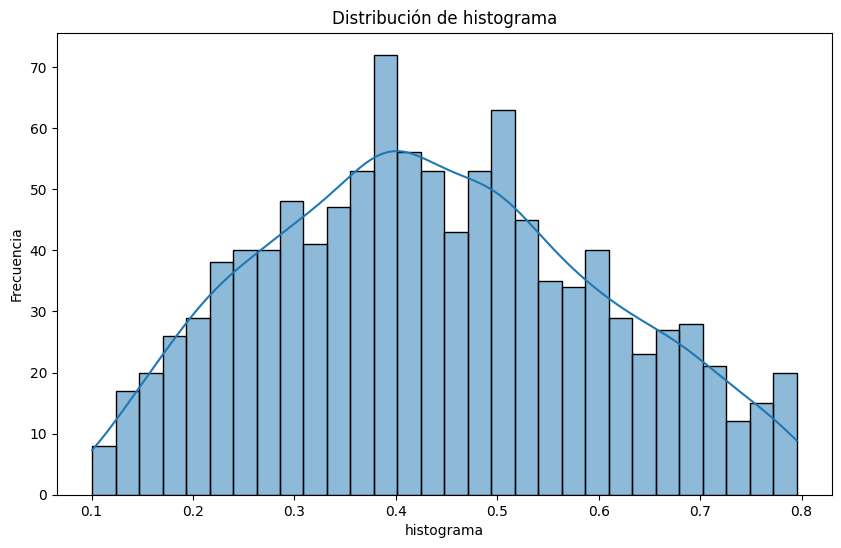

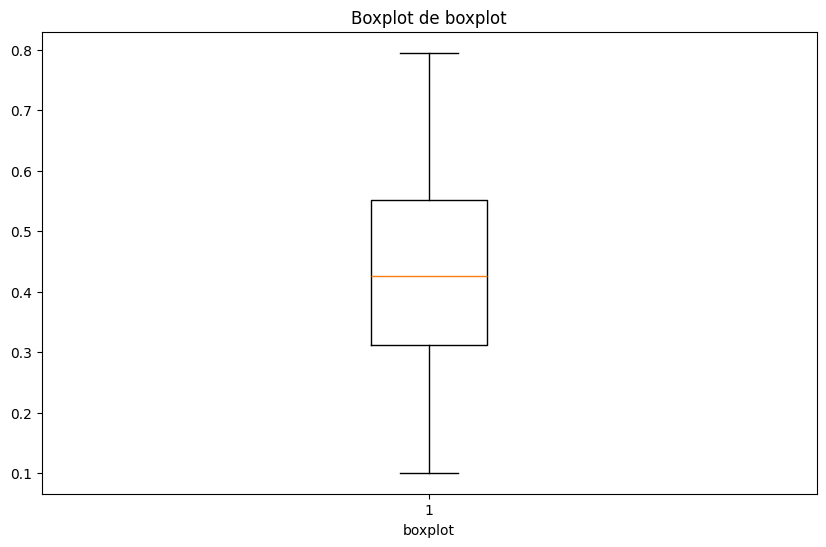

1076


In [76]:
km = df_filtered_normalizado['km'].copy()
km_f , mask_km = filtrar_columna_por_rango(km,0.1,0.8)

histogram(km_f)
boxplot(km_f)

print(len(km_f))










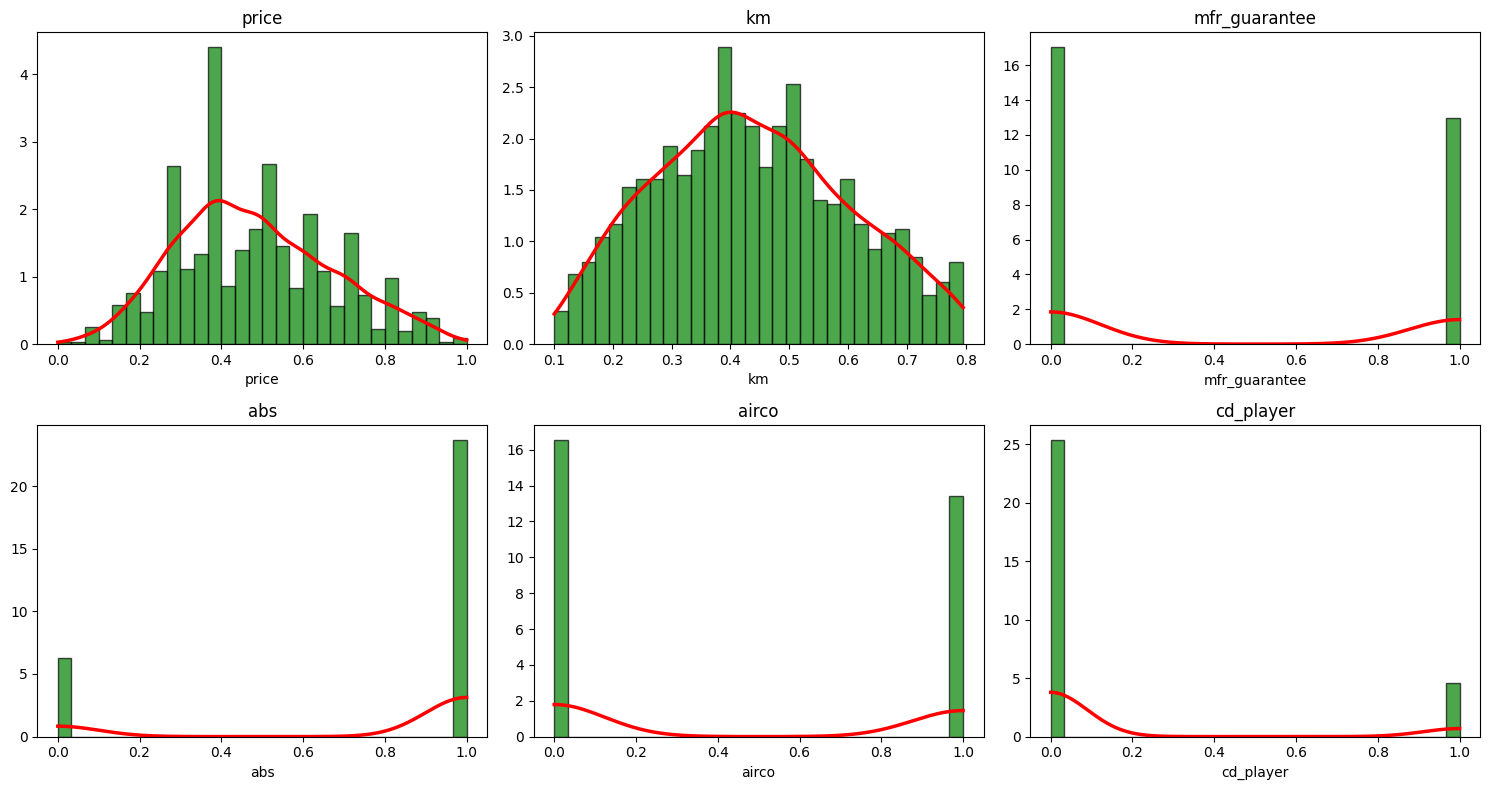

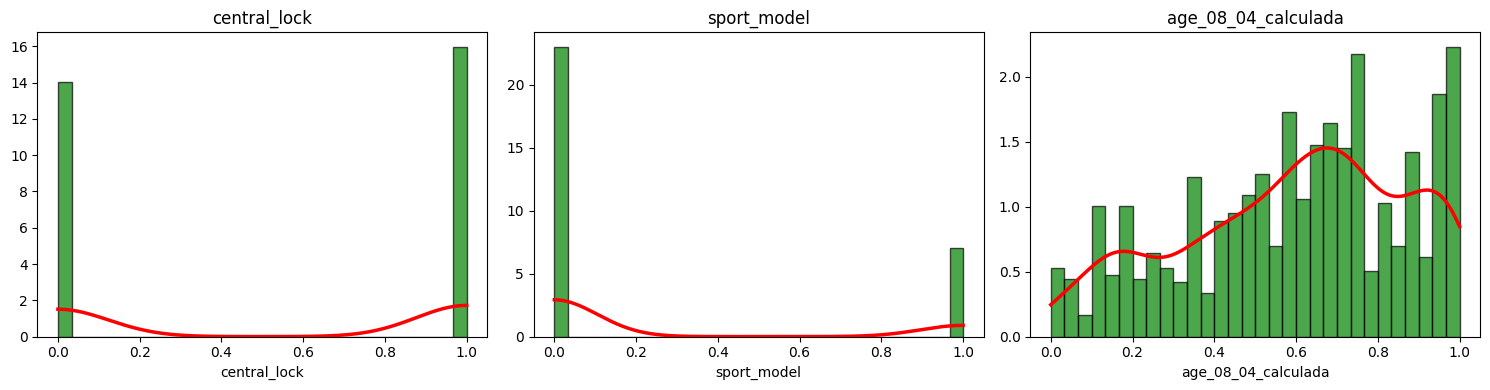

Index(['price', 'km', 'mfr_guarantee', 'abs', 'airco', 'cd_player',
       'central_lock', 'sport_model', 'age_08_04_calculada'],
      dtype='object')


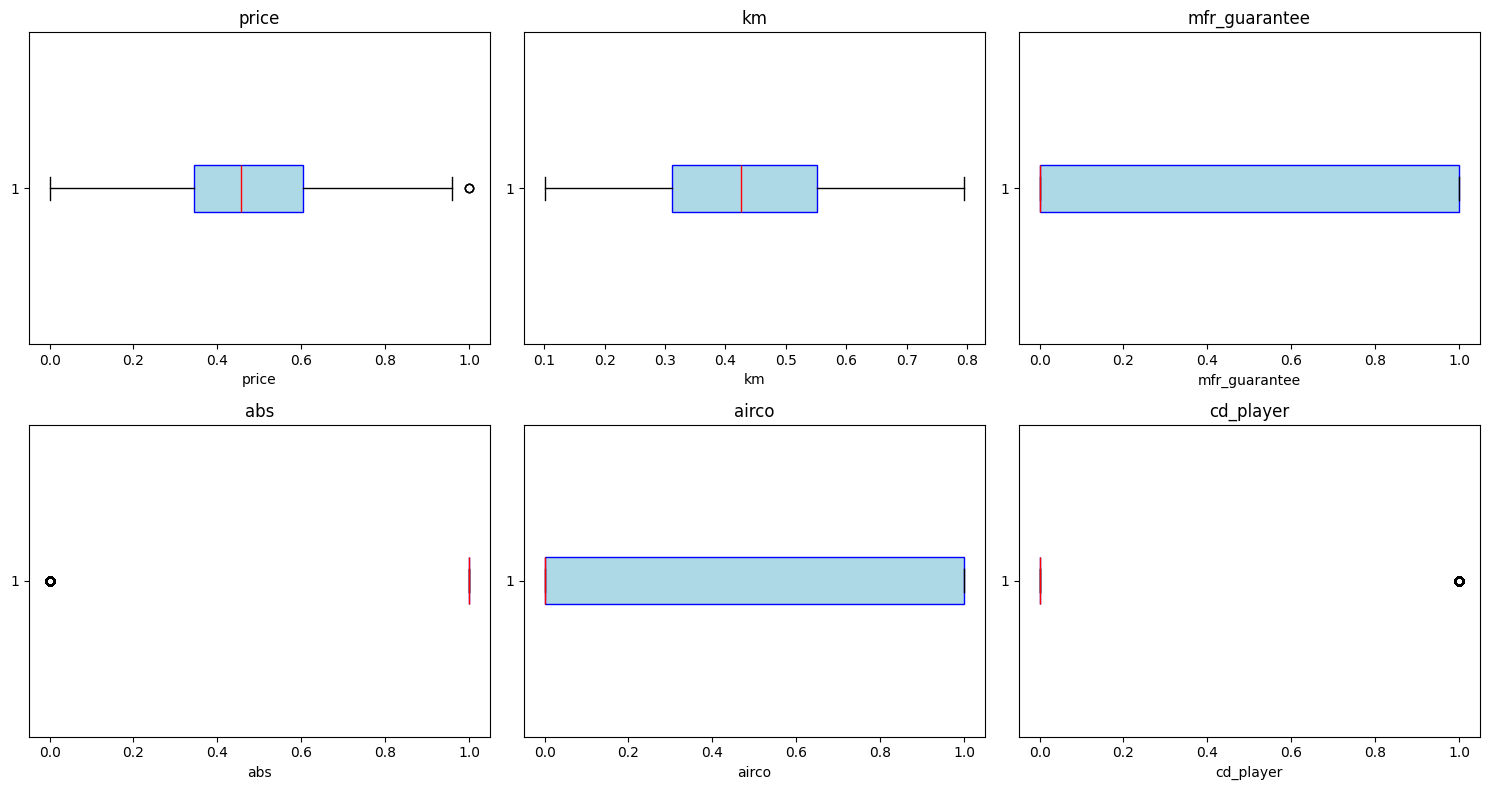

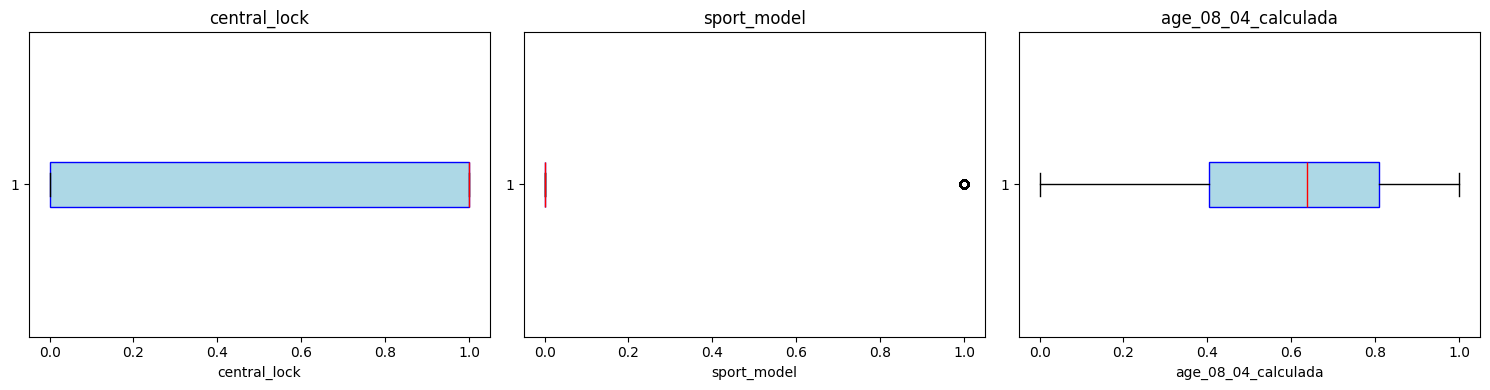

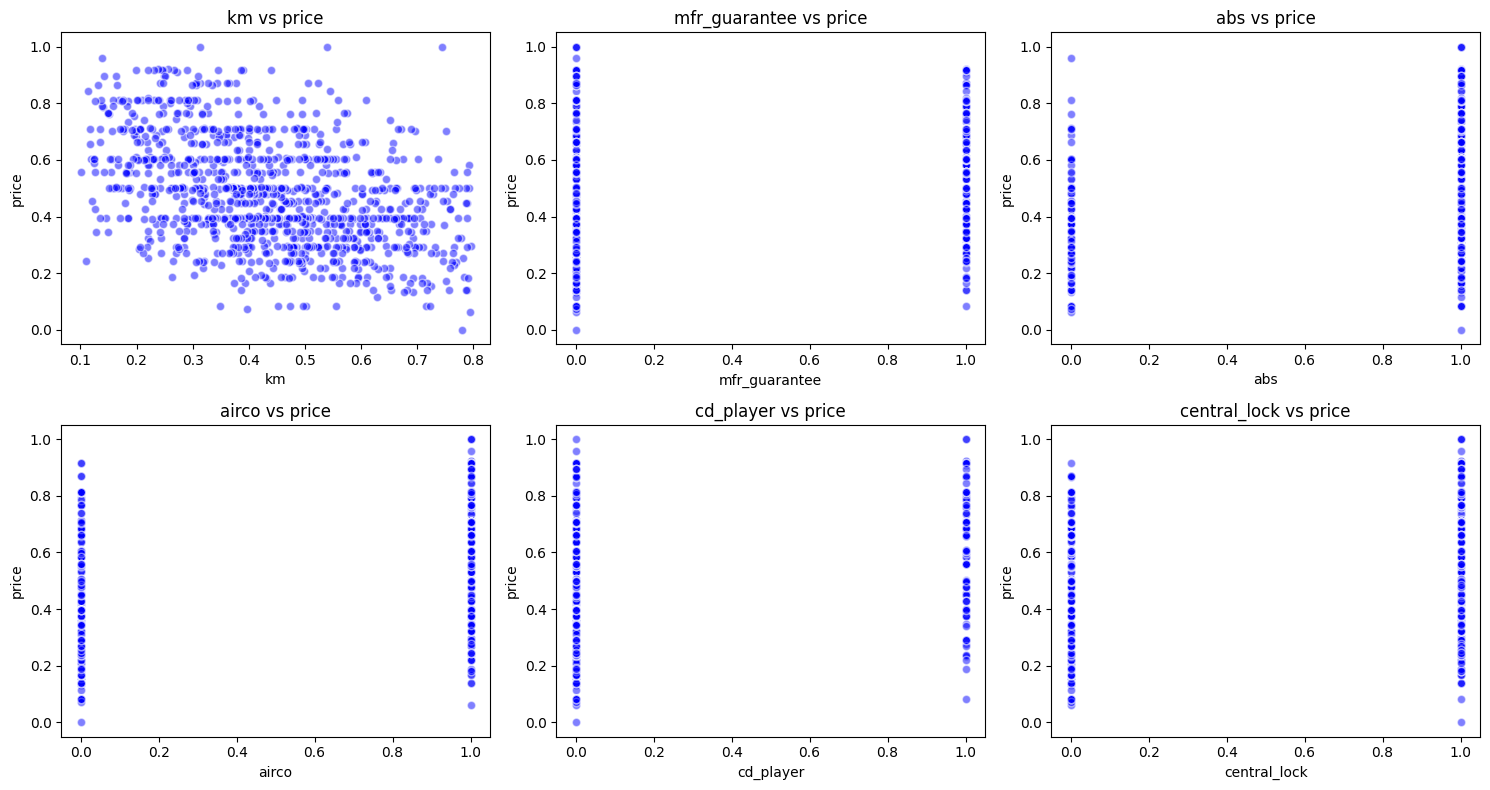

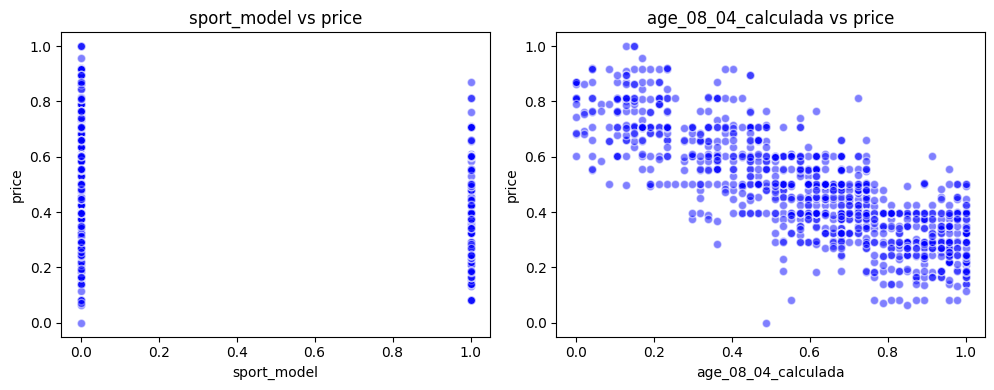

In [77]:
df_filtered_normalizado = df_filtered_normalizado[mask_km]

histogram_por_lotes(df_filtered_normalizado)
boxplots_por_lotes(df_filtered_normalizado)
scatter_por_lotes(df_filtered_normalizado)





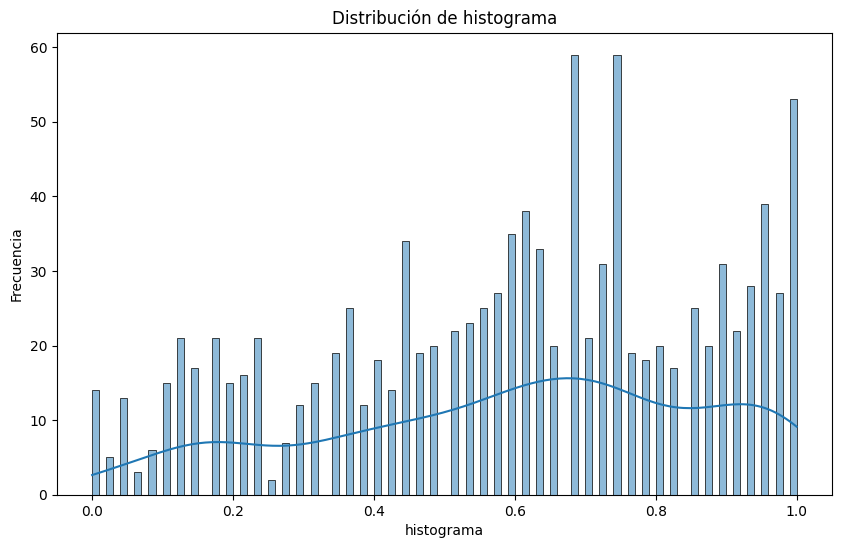

In [78]:
histogram(df_filtered_normalizado['age_08_04_calculada'],100)

MSE: 0.009153531183627899
MAE: 0.07493051612442368
MAPE: 20.776150098395448
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.719
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     237.5
Date:                Tue, 27 May 2025   Prob (F-statistic):          4.66e-199
Time:                        09:57:05   Log-Likelihood:                 656.50
No. Observations:                 753   AIC:                            -1295.
Df Residuals:                     744   BIC:                            -1253.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------

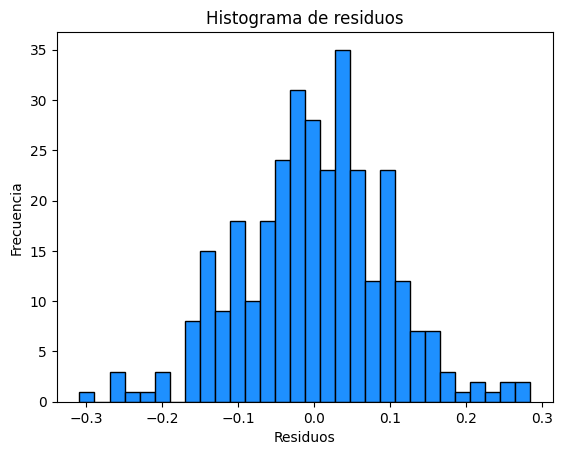

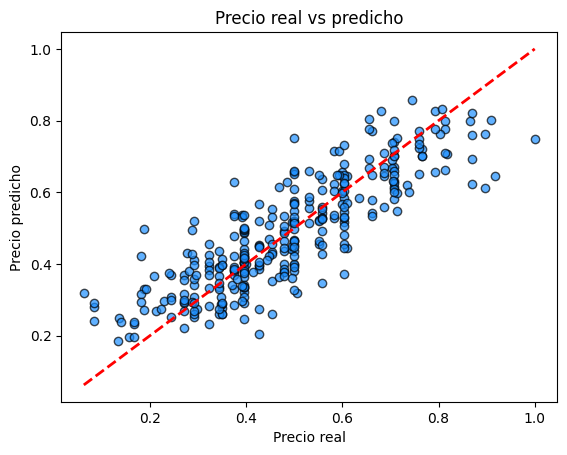

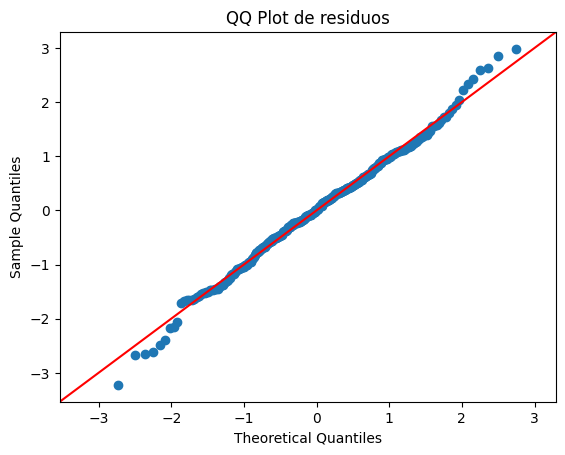

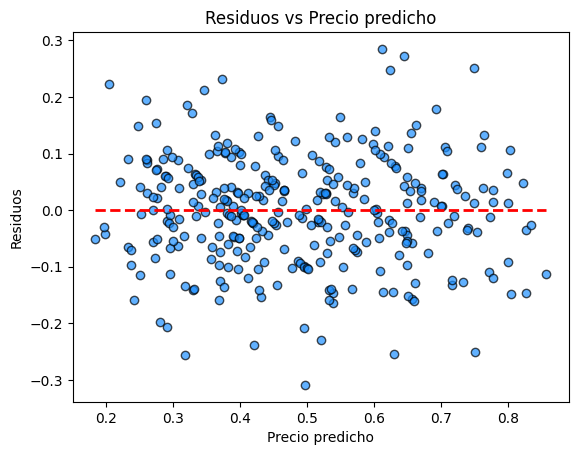

In [79]:
#aplicar regresion lineal de statsmodels con df_filtered_normalizado
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
# Añadir una constante a la matriz de diseño
x=df_filtered_normalizado.drop(columns=['price'])
y=df_filtered_normalizado['price']

#dividir en train y test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# entrenar modelo y añadiir constante
x_train_const = sm.add_constant(x_train)
modelo = sm.OLS(y_train, x_train_const)
modelo = modelo.fit()

#añadir conmstante de test
x_test_const = sm.add_constant(x_test)  
#predecir
y_pred = modelo.predict(x_test_const)

#evaluar
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f"MSE: {mse}")    
print(f"MAE: {mae}")
print(f"MAPE: {mape*100}")
print(modelo.summary())

#analisis de residuos
residuos = y_test - y_pred

#histograma de residuos
plt.hist(residuos, bins=30, color='dodgerblue', edgecolor='k')
plt.xlabel("Residuos")
plt.ylabel("Frecuencia")
plt.title("Histograma de residuos")
plt.show()

# valores predichos vs reales con una linea de referencia   
plt.scatter(y_test, y_pred, color='dodgerblue', alpha=0.7, edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Precio real")
plt.ylabel("Precio predicho")
plt.title("Precio real vs predicho")
plt.show()

# qqplot de residuos
sm.qqplot(residuos, line='45', fit=True)
plt.title("QQ Plot de residuos")
plt.show()

# valores predichos vs residuos con linea de referencia
plt.scatter(y_pred, residuos, color='dodgerblue', alpha=0.7, edgecolors='k')
plt.plot([y_pred.min(), y_pred.max()], [0, 0], 'r--', lw=2)
plt.xlabel("Precio predicho")
plt.ylabel("Residuos")
plt.title("Residuos vs Precio predicho")
plt.show()















# SELECCION DE FEATURE CON RIDGE

In [104]:

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error

In [105]:
df_toyota_ridge = df_toyota_limpio.copy()



a la variable `fuel_type_encoded` la convertimos en variable dummmies 

In [106]:
dummies = pd.get_dummies(df_toyota_ridge['fuel_type_encoded'], prefix='fuel_type')

# Unir las dummies al DataFrame original
df_toyota_ridge = pd.concat([df_toyota_ridge, dummies], axis=1)

# Eliminar la columna original 'fuel_type_encoded'
df_toyota_ridge = df_toyota_ridge.drop('fuel_type_encoded', axis=1)

# Mostrar las primeras filas para verificar
print(df_toyota_ridge.head())

       price        km  met_color  mfr_guarantee  bovag_guarantee  abs  airco  \
193  11750.0  130062.0          1              0                1    1      1   
194  13250.0  123425.0          1              0                1    1      1   
195  11950.0  118217.0          1              0                1    1      1   
196  11900.0  110000.0          1              0                0    1      1   
197  14750.0  108847.0          1              0                1    1      1   

     cd_player  central_lock  radio  mistlamps  sport_model  backseat_divider  \
193          0             0      0          0            0                 1   
194          1             1      0          0            0                 1   
195          1             1      0          0            0                 1   
196          0             1      0          0            0                 0   
197          0             1      0          1            0                 1   

     metallic_rim  tow_bar

## Ridge Coeficientes

**visualizacion de los coeficientes vs lambdas**

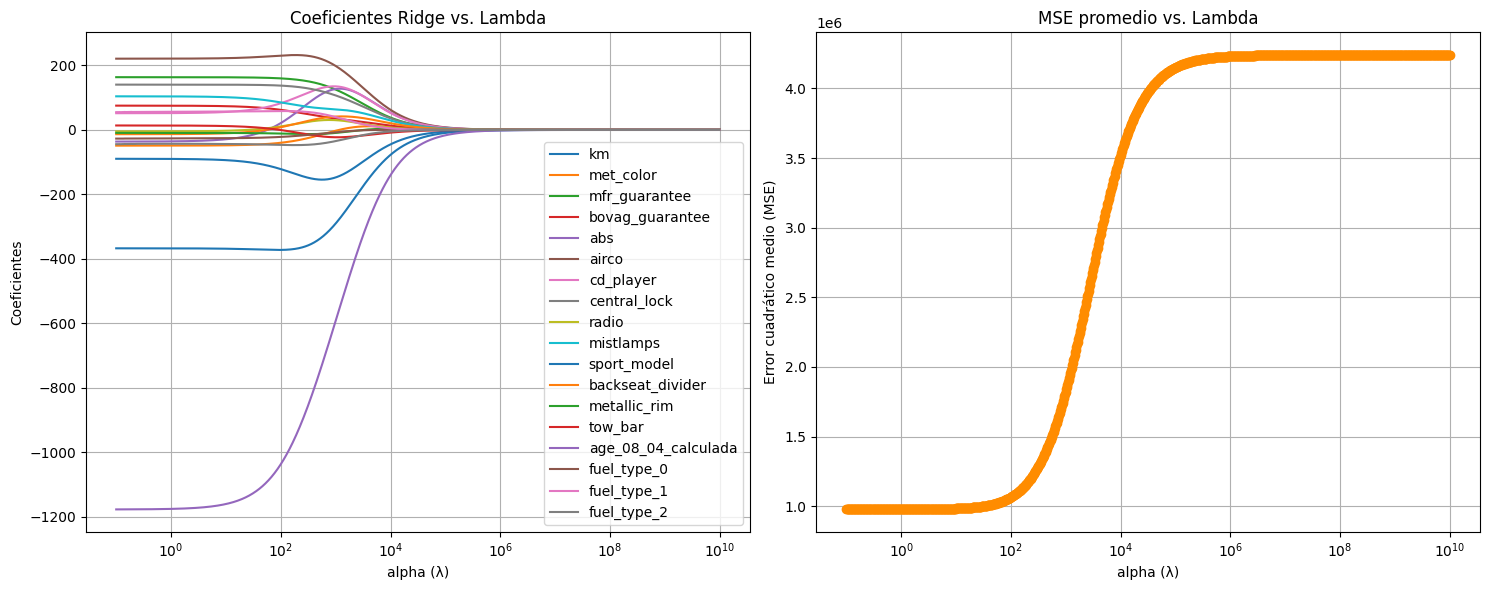

In [107]:

# Separar variables predictoras y variable objetivo
x = df_toyota_ridge.drop(columns=['price'])
y = df_toyota_ridge['price']

# Escalar las variables predictoras
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Generar valores de lambda (alpha)
lambdas = np.logspace(-1, 10, num=1000)
coefs = []
mse_scores = []


for alpha in lambdas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(x_scaled, y)
    coefs.append(ridge.coef_)
    
    # Validación cruzada para obtener MSE promedio (negativo, por convención)
    neg_mse = cross_val_score(ridge, x_scaled, y, scoring='neg_mean_squared_error', cv=5)
    mse_scores.append(-neg_mse.mean())  # Hacemos positivo el MSE

coefs = np.array(coefs)

# Crear subplots: 1 fila, 2 columnas
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# --- Gráfico 1: Coeficientes vs Lambda ---
for i, column in enumerate(x.columns):
    axs[0].plot(lambdas, coefs[:, i], label=column)

axs[0].set_xscale("log")
axs[0].set_xlabel("alpha (λ)")
axs[0].set_ylabel("Coeficientes")
axs[0].set_title("Coeficientes Ridge vs. Lambda")
axs[0].legend(loc='best')
axs[0].grid(True)

# --- Gráfico 2: MSE vs Lambda ---
axs[1].plot(lambdas, mse_scores, marker='o', color='darkorange')
axs[1].set_xscale("log")
axs[1].set_xlabel("alpha (λ)")
axs[1].set_ylabel("Error cuadrático medio (MSE)")
axs[1].set_title("MSE promedio vs. Lambda")
axs[1].grid(True)

plt.tight_layout()
plt.show()


pasar a dagster

Mejor lambda (alpha): 0.1
MSE: 847409.6250
MAE: 730.0212
MAPE: 7.80%
R2: 0.7449
               Variable  Coeficiente
0                    km  -353.565277
1             met_color   -50.489452
2         mfr_guarantee   141.822830
3       bovag_guarantee    76.893677
4                   abs   -60.176620
5                 airco   206.260223
6             cd_player    68.108177
7          central_lock   127.182457
8                 radio   -22.279259
9             mistlamps   121.302322
10          sport_model   -83.797562
11     backseat_divider   -19.270477
12         metallic_rim    -3.698360
13              tow_bar    21.449940
14  age_08_04_calculada -1208.367676
15          fuel_type_0   -37.775700
16          fuel_type_1    65.140793
17          fuel_type_2   -43.727467

Fold 1 - Primeras filas:
   Precio real  Precio predicho  Diferencia (Error)
0      10450.0     12688.750000        -2238.750000
1      13500.0     13127.927734          372.072266
2      12950.0     12216.945312    

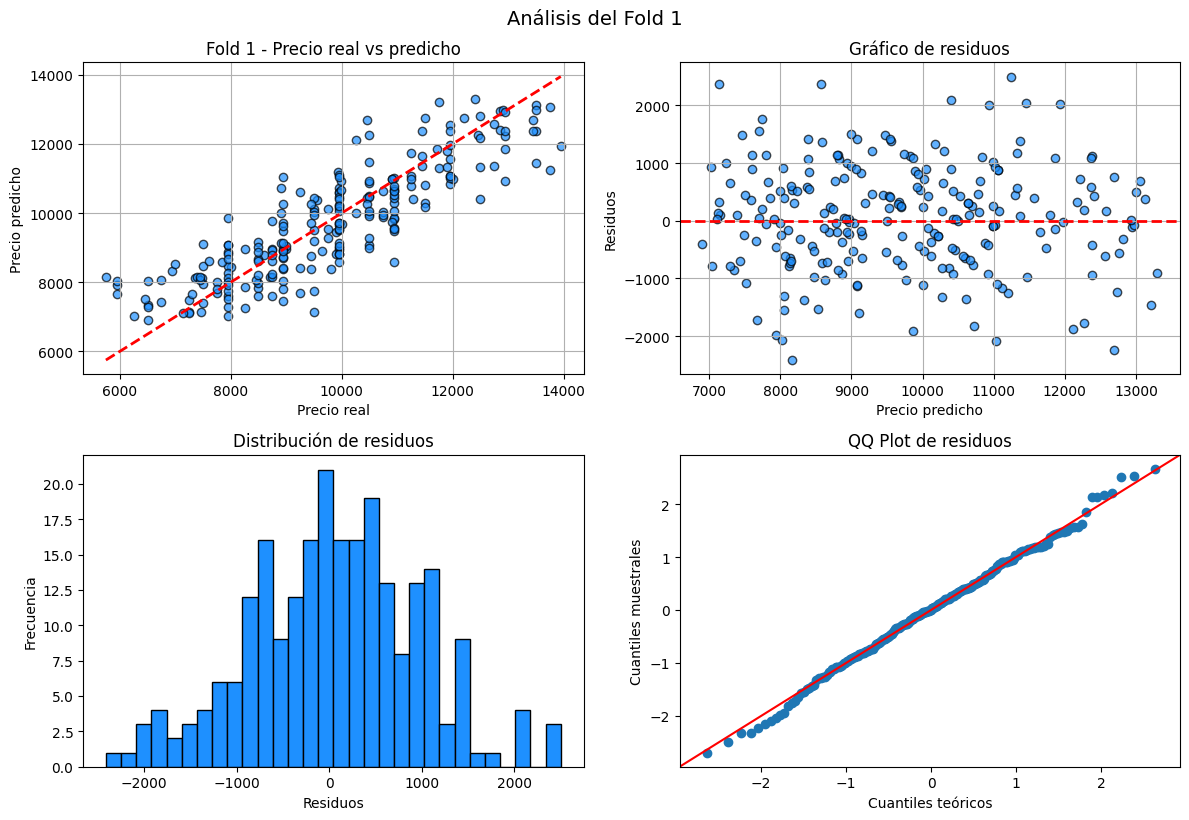

MSE: 1044523.3750
MAE: 816.2394
MAPE: 8.57%
R2: 0.6654
               Variable  Coeficiente
0                    km  -393.579834
1             met_color   -17.636942
2         mfr_guarantee   145.482224
3       bovag_guarantee   113.754463
4                   abs   -38.057545
5                 airco   214.556442
6             cd_player    27.628935
7          central_lock   161.157867
8                 radio   -28.955141
9             mistlamps    98.952950
10          sport_model   -67.649666
11     backseat_divider   -31.446337
12         metallic_rim    18.712830
13              tow_bar    15.754767
14  age_08_04_calculada -1177.322632
15          fuel_type_0   -59.165028
16          fuel_type_1    78.911758
17          fuel_type_2   -56.736282

Fold 2 - Primeras filas:
   Precio real  Precio predicho  Diferencia (Error)
0      11950.0     11463.220703          486.779297
1      11900.0     11079.780273          820.219727
2      11950.0     11507.500000          442.500000
3      1

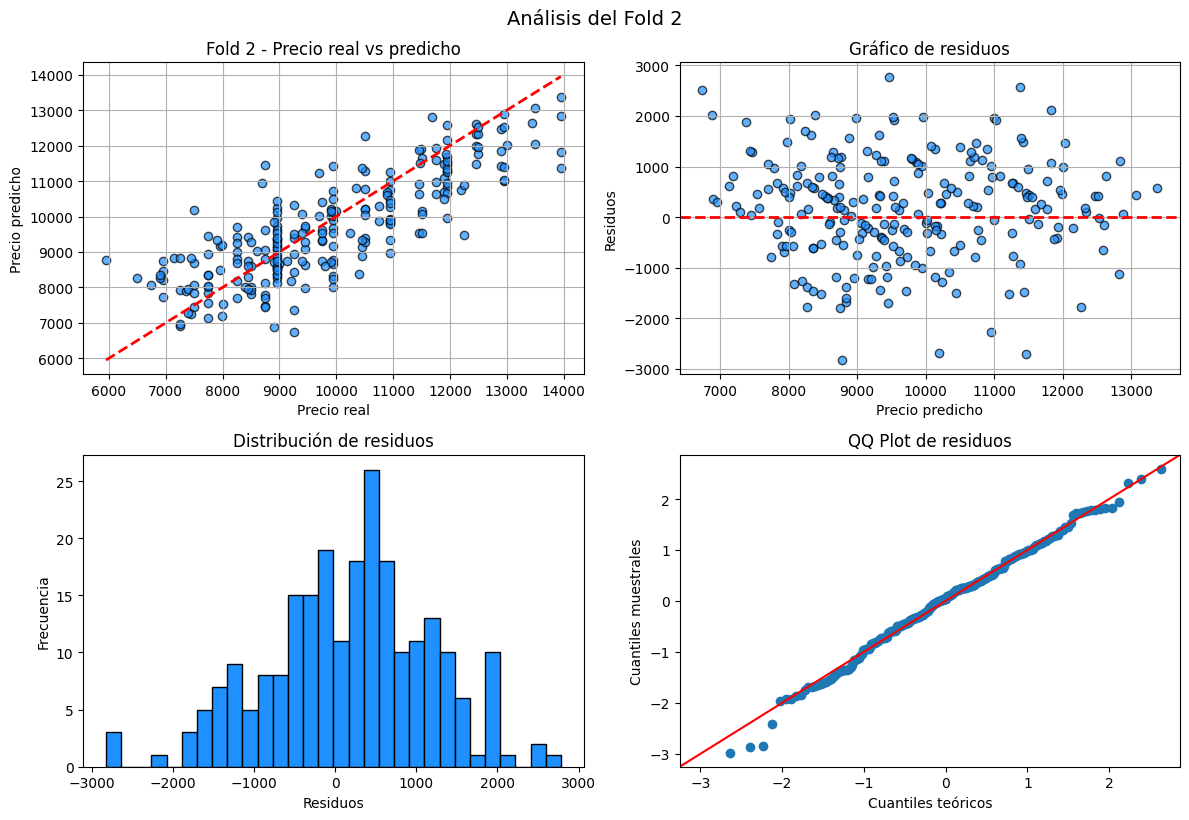

MSE: 1089285.5000
MAE: 783.7475
MAPE: 8.84%
R2: 0.7024
               Variable  Coeficiente
0                    km  -341.190979
1             met_color   -83.337830
2         mfr_guarantee   169.850342
3       bovag_guarantee    78.463272
4                   abs   -16.589117
5                 airco   188.758530
6             cd_player    46.305710
7          central_lock   170.170868
8                 radio     5.497753
9             mistlamps    91.198845
10          sport_model  -114.462250
11     backseat_divider     1.040900
12         metallic_rim   -28.390837
13              tow_bar     7.958410
14  age_08_04_calculada -1167.584839
15          fuel_type_0   -28.958288
16          fuel_type_1    48.066582
17          fuel_type_2   -36.816925

Fold 3 - Primeras filas:
   Precio real  Precio predicho  Diferencia (Error)
0      11750.0     11093.410156          656.589844
1       9950.0     10480.372070         -530.372070
2      11495.0     11187.875000          307.125000
3      1

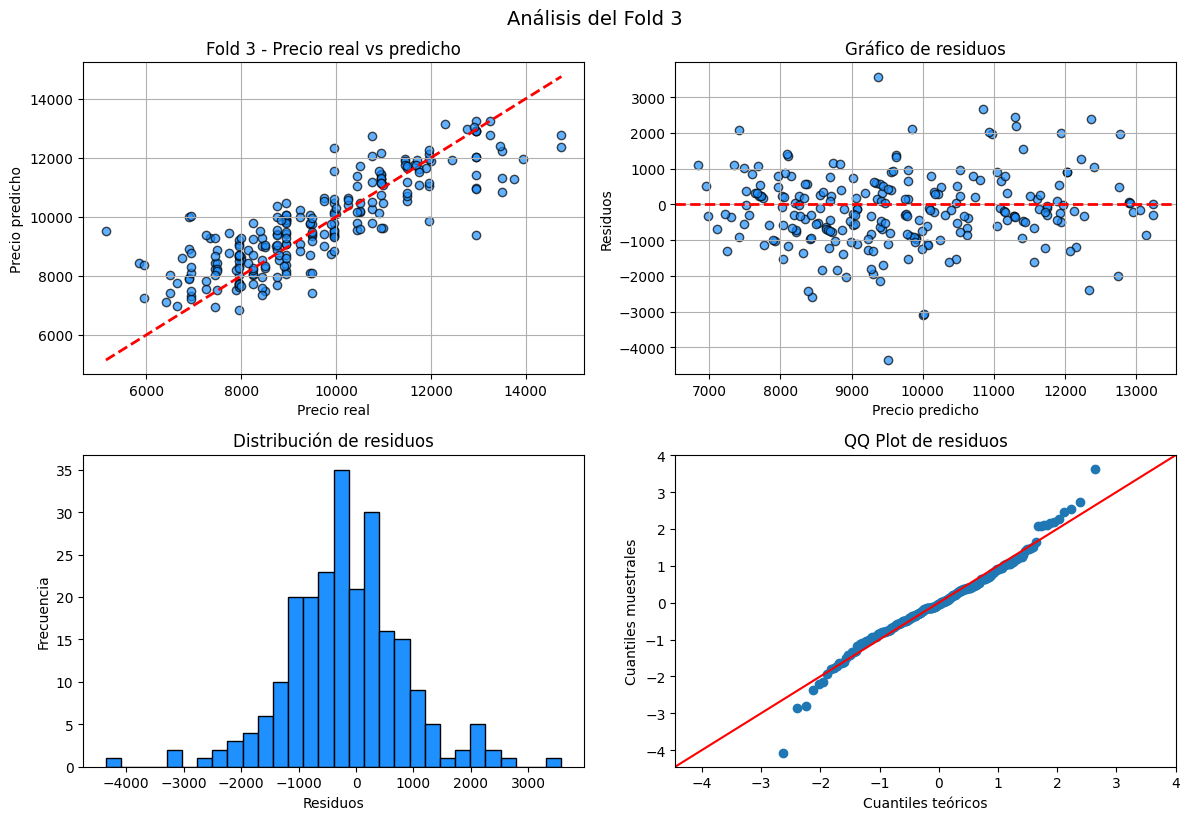

MSE: 1000850.3750
MAE: 792.7435
MAPE: 8.34%
R2: 0.7160
               Variable  Coeficiente
0                    km  -355.068054
1             met_color   -53.715675
2         mfr_guarantee   194.003769
3       bovag_guarantee    61.622257
4                   abs   -50.300884
5                 airco   244.554413
6             cd_player    75.477646
7          central_lock   125.686066
8                 radio    19.449329
9             mistlamps   112.722908
10          sport_model   -85.363205
11     backseat_divider    -5.883351
12         metallic_rim   -23.419090
13              tow_bar    -5.935953
14  age_08_04_calculada -1165.770630
15          fuel_type_0    -0.291417
16          fuel_type_1    38.360607
17          fuel_type_2   -37.178997

Fold 4 - Primeras filas:
   Precio real  Precio predicho  Diferencia (Error)
0      14750.0     11876.135742         2873.864258
1      11950.0     12850.925781         -900.925781
2      13250.0     11795.946289         1454.053711
3      1

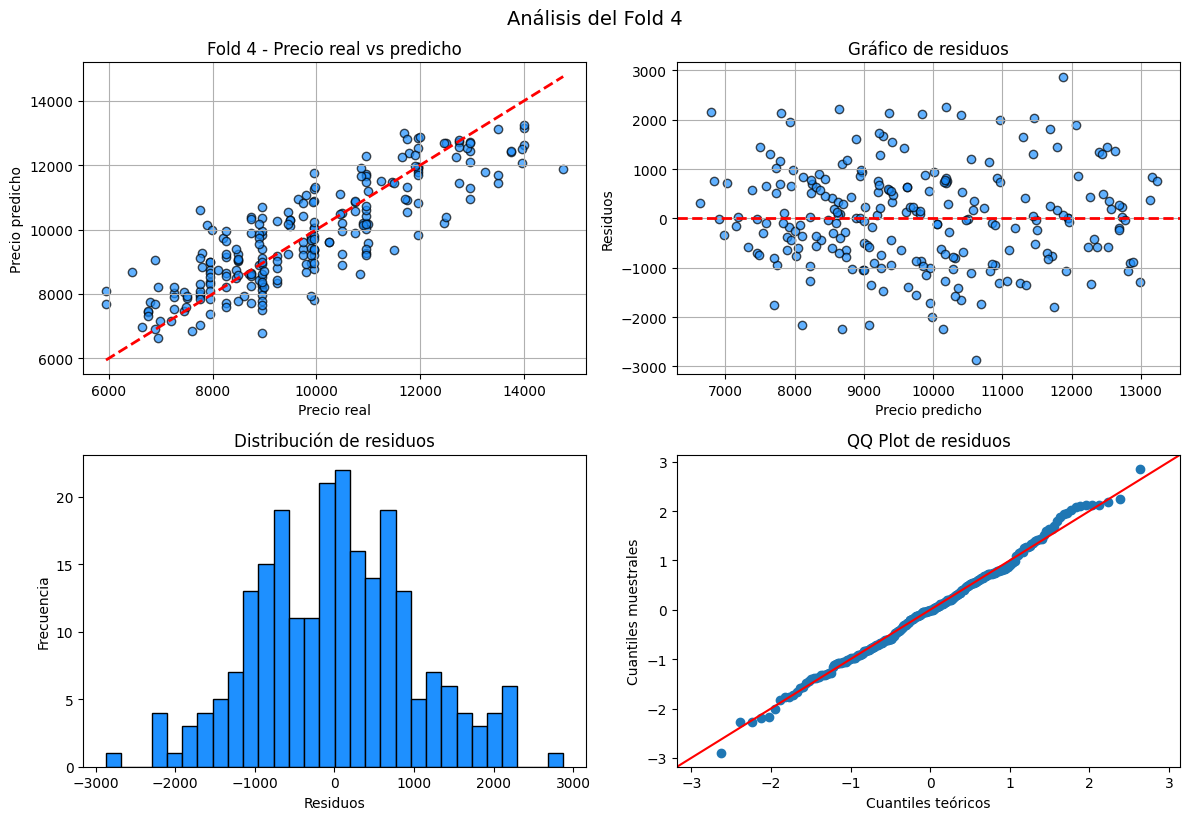

MSE: 792231.1875
MAE: 698.1020
MAPE: 7.62%
R2: 0.7059
               Variable  Coeficiente
0                    km  -390.735199
1             met_color   -36.394539
2         mfr_guarantee   166.056015
3       bovag_guarantee    49.544415
4                   abs   -13.705625
5                 airco   248.418747
6             cd_player    40.639786
7          central_lock   122.154060
8                 radio     4.033178
9             mistlamps    95.716171
10          sport_model   -95.078117
11     backseat_divider    -7.058216
12         metallic_rim   -11.058710
13              tow_bar    22.290619
14  age_08_04_calculada -1160.235352
15          fuel_type_0   -10.125302
16          fuel_type_1    49.144405
17          fuel_type_2   -44.866154

Fold 5 - Primeras filas:
   Precio real  Precio predicho  Diferencia (Error)
0      13250.0     11441.305664         1808.694336
1      11250.0     11262.034180          -12.034180
2      12500.0     11586.979492          913.020508
3      10

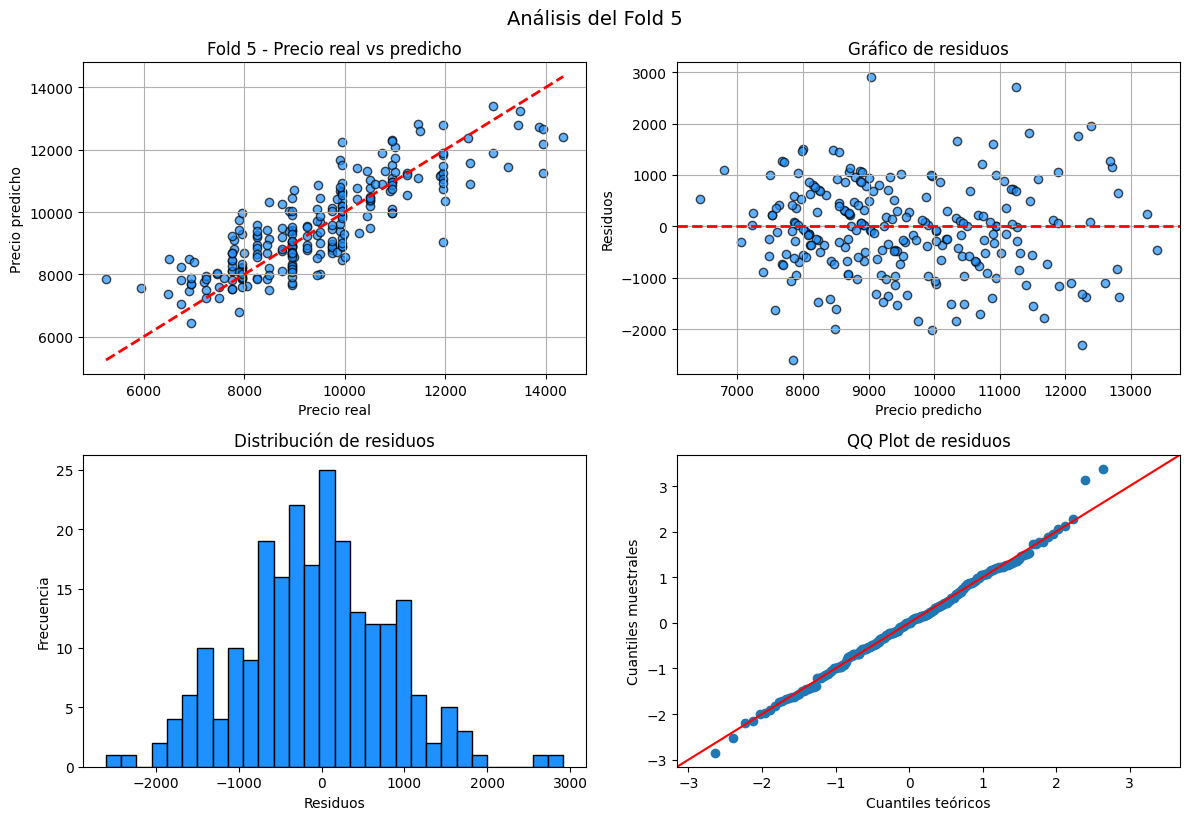


--- Resultados promedio en test (K-Fold) ---
MAE:  764.17
MSE:  954860.01
MAPE: 8.23%
R2:   0.7069


In [108]:

# Separar variables
x = df_toyota_ridge.drop(columns=['price'])
y = df_toyota_ridge['price']

# Escalado
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Buscar mejor alpha con RidgeCV
lambdas = np.logspace(-1, 10, num=1000)
ridge_cv = RidgeCV(alphas=lambdas, cv=5)
ridge_cv.fit(x_scaled, y)
best_alpha = ridge_cv.alpha_
print("Mejor lambda (alpha):", best_alpha)

# Validación con KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

fold = 1
mse_scores, mae_scores, mape_scores, r2_scores = [], [], [], []

for train_index, test_index in kf.split(x_scaled):
    x_train, x_test = x_scaled[train_index], x_scaled[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model = Ridge(alpha=best_alpha)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    # Guardar métricas
    mse_scores.append(mean_squared_error(y_test, y_pred))
    mae_scores.append(mean_absolute_error(y_test, y_pred))
    mape_scores.append(mean_absolute_percentage_error(y_test, y_pred))
    r2_scores.append(r2_score(y_test, y_pred))
    # mostrar mse , mae , mape , r2
    print(f"MSE: {mse_scores[-1]:.4f}")
    print(f"MAE: {mae_scores[-1]:.4f}")
    print(f"MAPE: {mape_scores[-1]*100:.2f}%")
    print(f"R2: {r2_scores[-1]:.4f}")

    # mostrar los coefientes y nombre de las variables
    coef_df = pd.DataFrame({
        'Variable': x.columns,
        'Coeficiente': model.coef_
    })
    print(coef_df)  

    # Crear DataFrame de comparación
    comparacion = pd.DataFrame({
        'Precio real': y_test.values,
        'Precio predicho': y_pred,
        'Diferencia (Error)': y_test.values - y_pred
    })

    print(f"\nFold {fold} - Primeras filas:")
    print(comparacion.head(5))
    comparacion.to_csv(f'archivo_fold_{fold}.txt', sep='\t', index=False)

    # Graficar
    fig, axs = plt.subplots(2, 2, figsize=(12, 8))

    # Gráfico real vs predicho
    axs[0, 0].scatter(y_test, y_pred, color='dodgerblue', alpha=0.7, edgecolors='k')
    axs[0, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    axs[0, 0].set_xlabel("Precio real")
    axs[0, 0].set_ylabel("Precio predicho")
    axs[0, 0].set_title(f"Fold {fold} - Precio real vs predicho")
    axs[0, 0].grid(True)

    # Gráfico de residuos
    resid = y_test - y_pred
    axs[0, 1].scatter(y_pred, resid, color='dodgerblue', alpha=0.7, edgecolors='k')
    axs[0, 1].axhline(y=0, color='r', linestyle='--', lw=2)
    axs[0, 1].set_xlabel("Precio predicho")
    axs[0, 1].set_ylabel("Residuos")
    axs[0, 1].set_title("Gráfico de residuos")
    axs[0, 1].grid(True)

    # Histograma de residuos
    axs[1, 0].hist(resid, bins=30, color='dodgerblue', edgecolor='k')
    axs[1, 0].set_xlabel("Residuos")
    axs[1, 0].set_ylabel("Frecuencia")
    axs[1, 0].set_title("Distribución de residuos")

    # QQ Plot de residuos
    sm.qqplot(resid, line='45', fit=True, ax=axs[1, 1])
    axs[1, 1].set_title("QQ Plot de residuos")
    axs[1, 1].set_xlabel("Cuantiles teóricos")
    axs[1, 1].set_ylabel("Cuantiles muestrales")

    plt.tight_layout()
    plt.suptitle(f'Análisis del Fold {fold}', fontsize=14, y=1.02)
    plt.show()

    fold += 1

# Mostrar métricas promedio
print("\n--- Resultados promedio en test (K-Fold) ---")
print(f"MAE:  {np.mean(mae_scores):.2f}")
print(f"MSE:  {np.mean(mse_scores):.2f}")
print(f"MAPE: {np.mean(mape_scores)*100:.2f}%")
print(f"R2:   {np.mean(r2_scores):.4f}")


# Seleccion feature con lasso

In [84]:
df_toyota_lasso = df_toyota_limpio.copy()

In [85]:
dummies = pd.get_dummies(df_toyota_lasso['fuel_type_encoded'], prefix='fuel_type')

# Unir las dummies al DataFrame original
df_toyota_lasso = pd.concat([df_toyota_lasso, dummies], axis=1)

# Eliminar la columna original 'fuel_type_encoded'
df_toyota_lasso = df_toyota_lasso.drop('fuel_type_encoded', axis=1)

# Mostrar las primeras filas para verificar
print(df_toyota_lasso.head())

       price        km  met_color  mfr_guarantee  bovag_guarantee  abs  airco  \
193  11750.0  130062.0          1              0                1    1      1   
194  13250.0  123425.0          1              0                1    1      1   
195  11950.0  118217.0          1              0                1    1      1   
196  11900.0  110000.0          1              0                0    1      1   
197  14750.0  108847.0          1              0                1    1      1   

     cd_player  central_lock  radio  mistlamps  sport_model  backseat_divider  \
193          0             0      0          0            0                 1   
194          1             1      0          0            0                 1   
195          1             1      0          0            0                 1   
196          0             1      0          0            0                 0   
197          0             1      0          1            0                 1   

     metallic_rim  tow_bar

agregar a dagster

Alpha óptimo encontrado por LassoCV: 10.890230


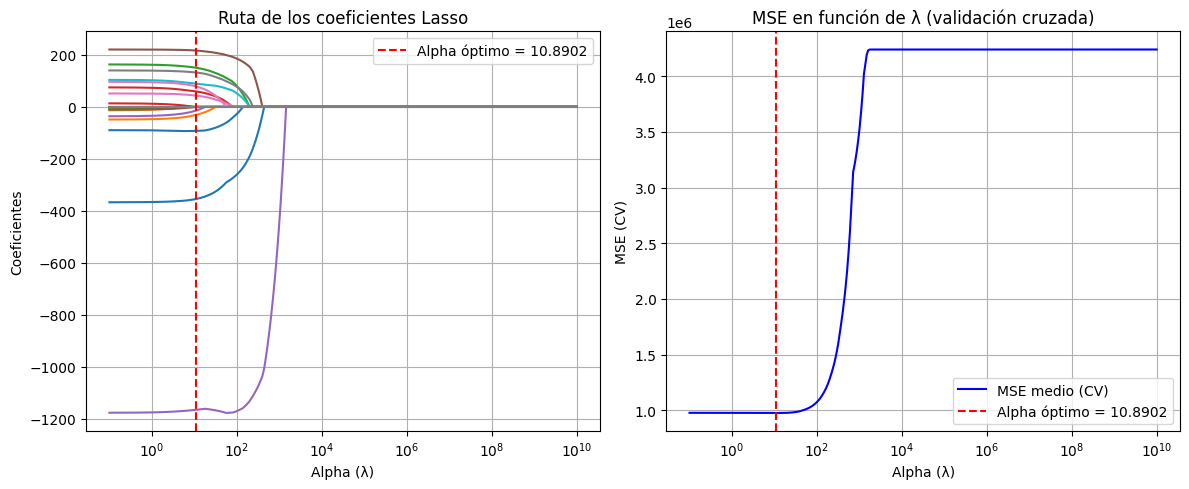

In [86]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import Lasso,LassoCV
from sklearn.preprocessing import StandardScaler

# Datos
X = df_toyota_lasso.drop(columns=['price'])
y = df_toyota_lasso['price']

# Escalado
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Rango de alphas
alphas = np.logspace(-1, 10, 1000)

# Entrenar modelo LassoCV
lasso_cv_model = LassoCV(alphas=alphas, cv=5, random_state=42, max_iter=10000)
lasso_cv_model.fit(X_scaled, y)

# Mejor alpha
optimal_alpha = lasso_cv_model.alpha_
print(f"Alpha óptimo encontrado por LassoCV: {optimal_alpha:.6f}")

# --- GRÁFICA 1: Coeficientes vs Alphas ---
coefs = []

for a in alphas:
    lasso = Lasso(alpha=a, max_iter=10000)
    lasso.fit(X_scaled, y)
    coefs.append(lasso.coef_)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(alphas, coefs)
plt.xscale('log')
plt.xlabel('Alpha (λ)')
plt.ylabel('Coeficientes')
plt.title('Ruta de los coeficientes Lasso')
plt.axvline(optimal_alpha, color='red', linestyle='--', label=f'Alpha óptimo = {optimal_alpha:.4f}')
plt.legend()
plt.grid(True)

# --- GRÁFICA 2: MSE vs Alphas ---
plt.subplot(1, 2, 2)
mean_mse = np.mean(lasso_cv_model.mse_path_, axis=1)
plt.plot(lasso_cv_model.alphas_, mean_mse, color='blue', label='MSE medio (CV)')
plt.axvline(optimal_alpha, color='red', linestyle='--', label=f'Alpha óptimo = {optimal_alpha:.4f}')
plt.xscale('log')
plt.xlabel('Alpha (λ)')
plt.ylabel('MSE (CV)')
plt.title('MSE en función de λ (validación cruzada)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [87]:
import numpy as np
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler


X = df_toyota_lasso.drop(columns=['price'])
y = df_toyota_lasso['price']


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


alphas = np.logspace(-1, 10, 1000)  


lasso_cv_model = LassoCV(alphas=alphas, cv=5, random_state=42, max_iter=10000)
lasso_cv_model.fit(X_scaled, y)


optimal_alpha = lasso_cv_model.alpha_
print(f"Alpha óptimo encontrado por LassoCV: {optimal_alpha:.6f}")
feature_names = X.columns

# Obtener coeficientes del modelo entrenado
coefficients = lasso_cv_model.coef_

# Crear DataFrame para visualización
coef_df = pd.DataFrame({
    'Variable': feature_names,
    'Coeficiente': coefficients
})

# Mostrar el resultado
print(coef_df)


Alpha óptimo encontrado por LassoCV: 10.890230
               Variable  Coeficiente
0                    km  -354.684418
1             met_color   -30.846615
2         mfr_guarantee   150.803497
3       bovag_guarantee    59.814434
4                   abs   -14.272021
5                 airco   217.004837
6             cd_player    43.560852
7          central_lock   132.355896
8                 radio    -0.000000
9             mistlamps    89.617302
10          sport_model   -92.255508
11     backseat_divider    -0.000000
12         metallic_rim    -0.000000
13              tow_bar     0.000000
14  age_08_04_calculada -1165.661377
15          fuel_type_0    -0.000000
16          fuel_type_1    79.053703
17          fuel_type_2    -0.000000


In [88]:
df_toyota_lasso.drop(columns=['fuel_type_0','fuel_type_1','tow_bar','metallic_rim','backseat_divider','radio'],inplace=True,axis=1)

Mejor lambda (alpha): 0.1
               Variable  Coeficiente
0                    km  -354.946045
1             met_color   -48.951286
2         mfr_guarantee   137.718124
3       bovag_guarantee    70.938553
4                   abs   -61.034801
5                 airco   207.580826
6             cd_player    66.610680
7          central_lock   122.507034
8             mistlamps   117.220230
9           sport_model   -89.257790
10  age_08_04_calculada -1201.170776
11          fuel_type_2   -89.306366
MSE: 839108.1875
MAE: 723.2117
MAPE: 7.72%
R2: 0.7474

Fold 1 - Primeras filas:
   Precio real  Precio predicho  Diferencia (Error)
0      10450.0     12591.502930        -2141.502930
1      13500.0     13089.378906          410.621094
2      12950.0     12219.355469          730.644531
3      13950.0     11927.203125         2022.796875
4      13500.0     12969.503906          530.496094


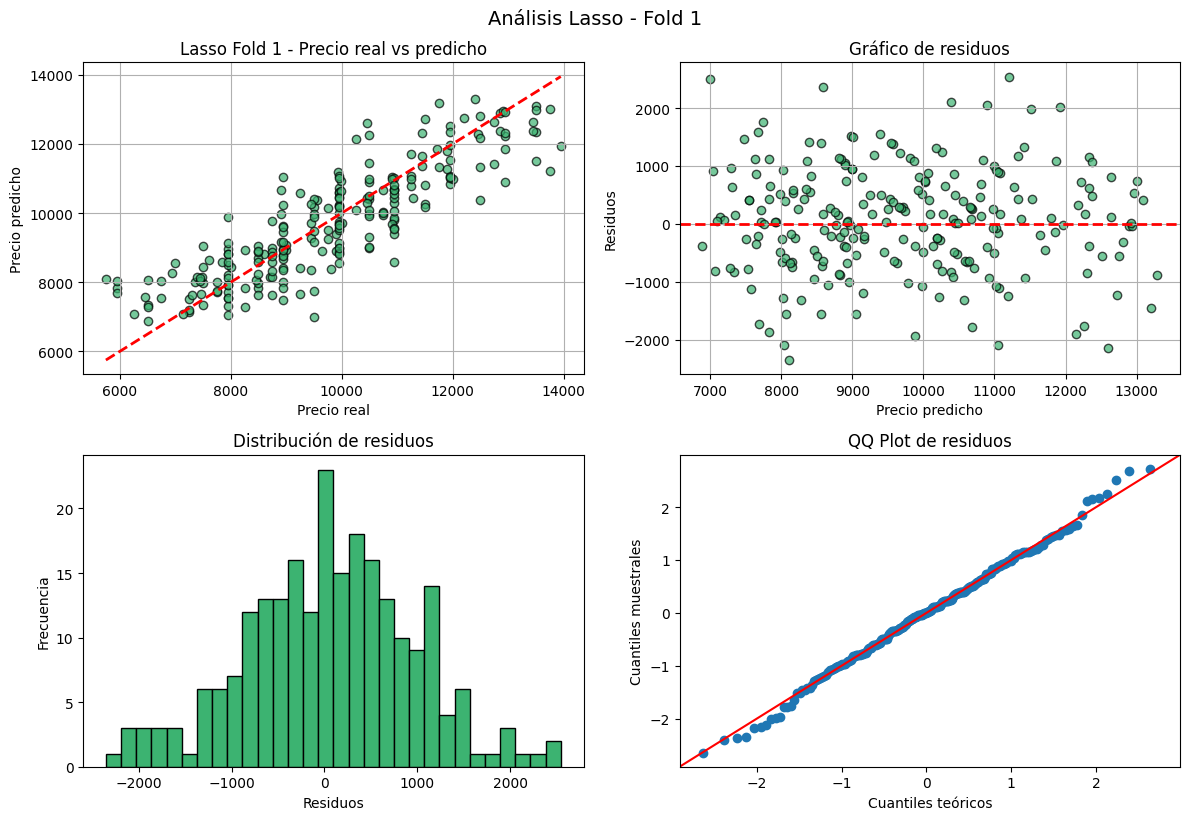

               Variable  Coeficiente
0                    km  -395.710876
1             met_color   -18.017069
2         mfr_guarantee   141.203445
3       bovag_guarantee   104.624573
4                   abs   -38.590832
5                 airco   219.274796
6             cd_player    23.048721
7          central_lock   156.312332
8             mistlamps   102.161110
9           sport_model   -73.913475
10  age_08_04_calculada -1169.110474
11          fuel_type_2  -112.383331
MSE: 1014638.5625
MAE: 804.4866
MAPE: 8.45%
R2: 0.6750

Fold 2 - Primeras filas:
   Precio real  Precio predicho  Diferencia (Error)
0      11950.0     11459.354492          490.645508
1      11900.0     10942.347656          957.652344
2      11950.0     12262.035156         -312.035156
3      11500.0     11577.012695          -77.012695
4      10950.0     11217.249023         -267.249023


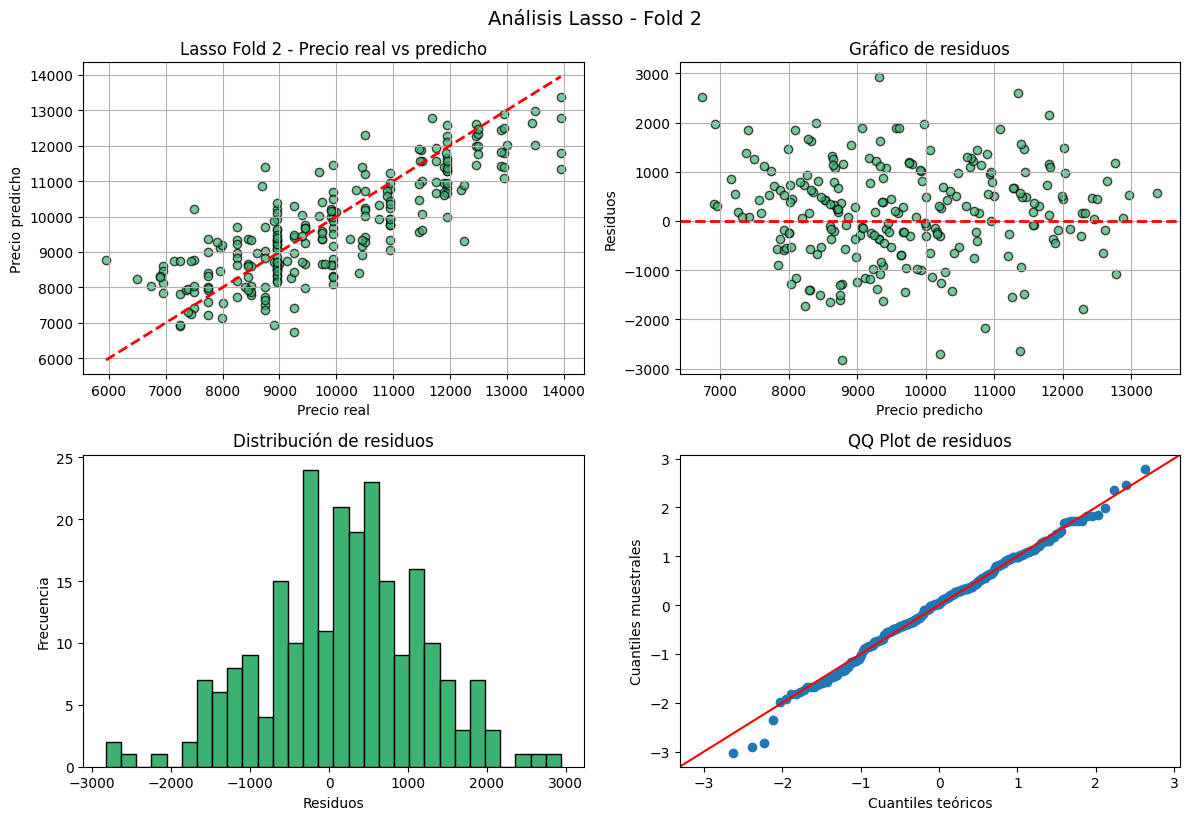

               Variable  Coeficiente
0                    km  -340.014008
1             met_color   -81.404305
2         mfr_guarantee   168.178177
3       bovag_guarantee    78.587364
4                   abs   -18.212761
5                 airco   191.727478
6             cd_player    41.113525
7          central_lock   164.537109
8             mistlamps    77.910011
9           sport_model  -115.216591
10  age_08_04_calculada -1170.529297
11          fuel_type_2   -69.490623
MSE: 1086448.8750
MAE: 783.8693
MAPE: 8.84%
R2: 0.7032

Fold 3 - Primeras filas:
   Precio real  Precio predicho  Diferencia (Error)
0      11750.0     11028.297852          721.702148
1       9950.0     10495.262695         -545.262695
2      11495.0     11262.192383          232.807617
3      10500.0     11717.416992        -1217.416992
4      12950.0     10966.458008         1983.541992


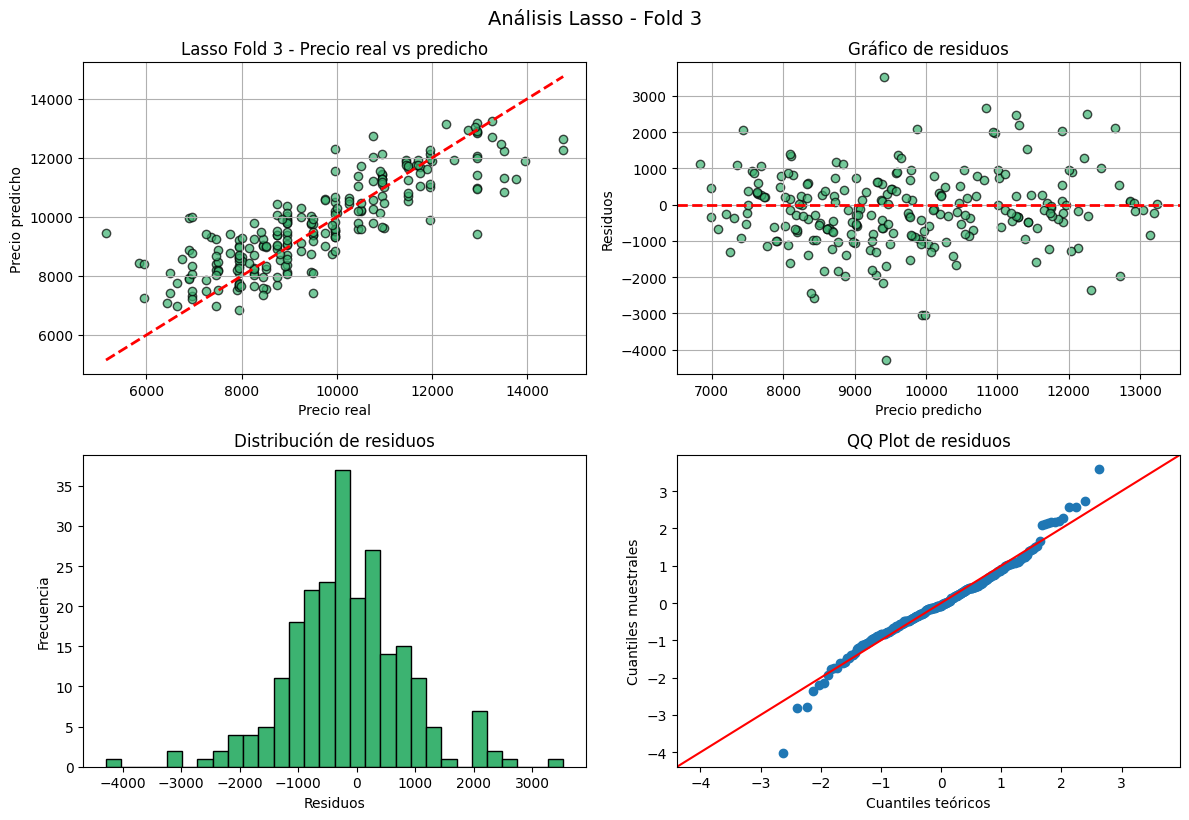

               Variable  Coeficiente
0                    km  -355.285950
1             met_color   -53.575283
2         mfr_guarantee   191.589523
3       bovag_guarantee    59.749989
4                   abs   -51.976177
5                 airco   244.810623
6             cd_player    71.363525
7          central_lock   123.309982
8             mistlamps   100.712936
9           sport_model   -89.388763
10  age_08_04_calculada -1169.424561
11          fuel_type_2   -73.966904
MSE: 999745.7500
MAE: 793.7695
MAPE: 8.35%
R2: 0.7163

Fold 4 - Primeras filas:
   Precio real  Precio predicho  Diferencia (Error)
0      14750.0     11856.509766         2893.490234
1      11950.0     12960.050781        -1010.050781
2      13250.0     11791.312500         1458.687500
3      11790.0     12382.435547         -592.435547
4      10950.0     12293.437500        -1343.437500


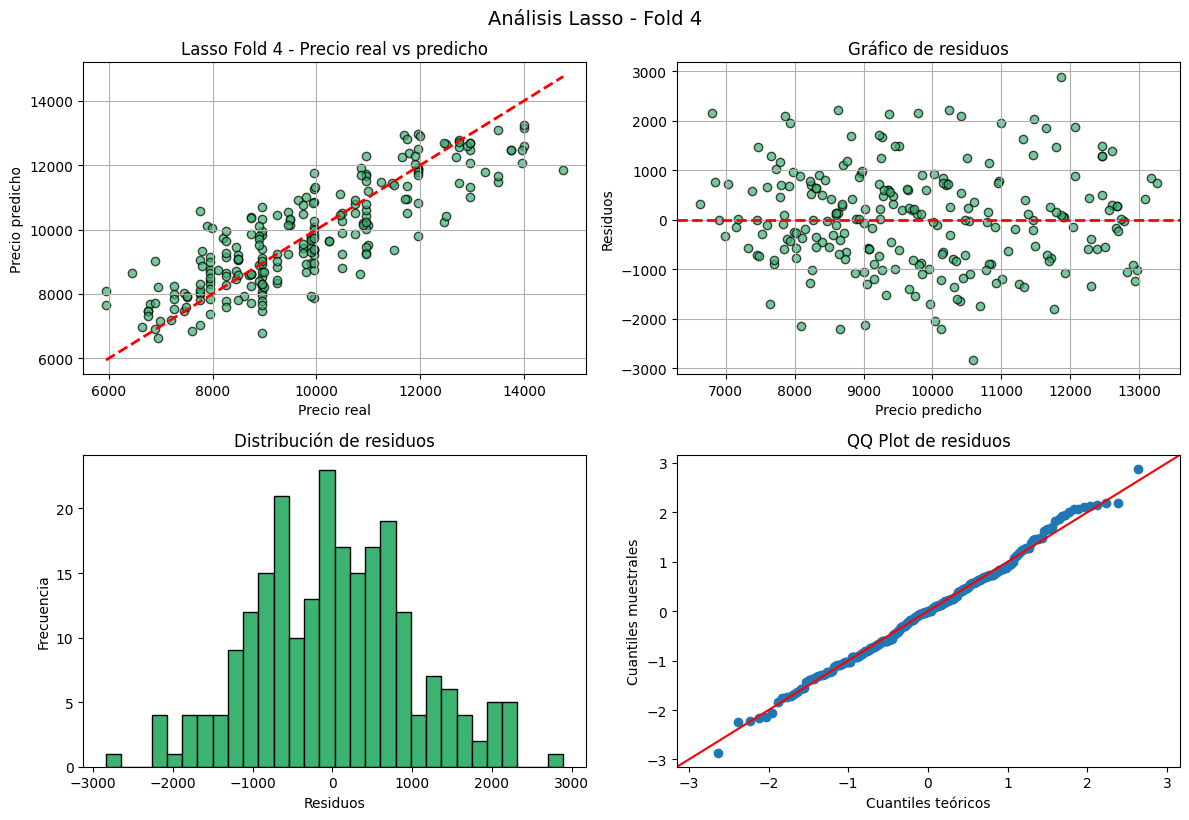

               Variable  Coeficiente
0                    km  -392.357544
1             met_color   -32.298229
2         mfr_guarantee   162.539139
3       bovag_guarantee    46.024998
4                   abs   -12.807928
5                 airco   250.266663
6             cd_player    37.855286
7          central_lock   121.469330
8             mistlamps    85.840744
9           sport_model   -99.407799
10  age_08_04_calculada -1157.281982
11          fuel_type_2   -86.211998
MSE: 796575.1875
MAE: 698.2016
MAPE: 7.62%
R2: 0.7042

Fold 5 - Primeras filas:
   Precio real  Precio predicho  Diferencia (Error)
0      13250.0     11414.767578         1835.232422
1      11250.0     11212.005859           37.994141
2      12500.0     11612.122070          887.877930
3      10950.0     11102.596680         -152.596680
4      11450.0     11068.218750          381.781250


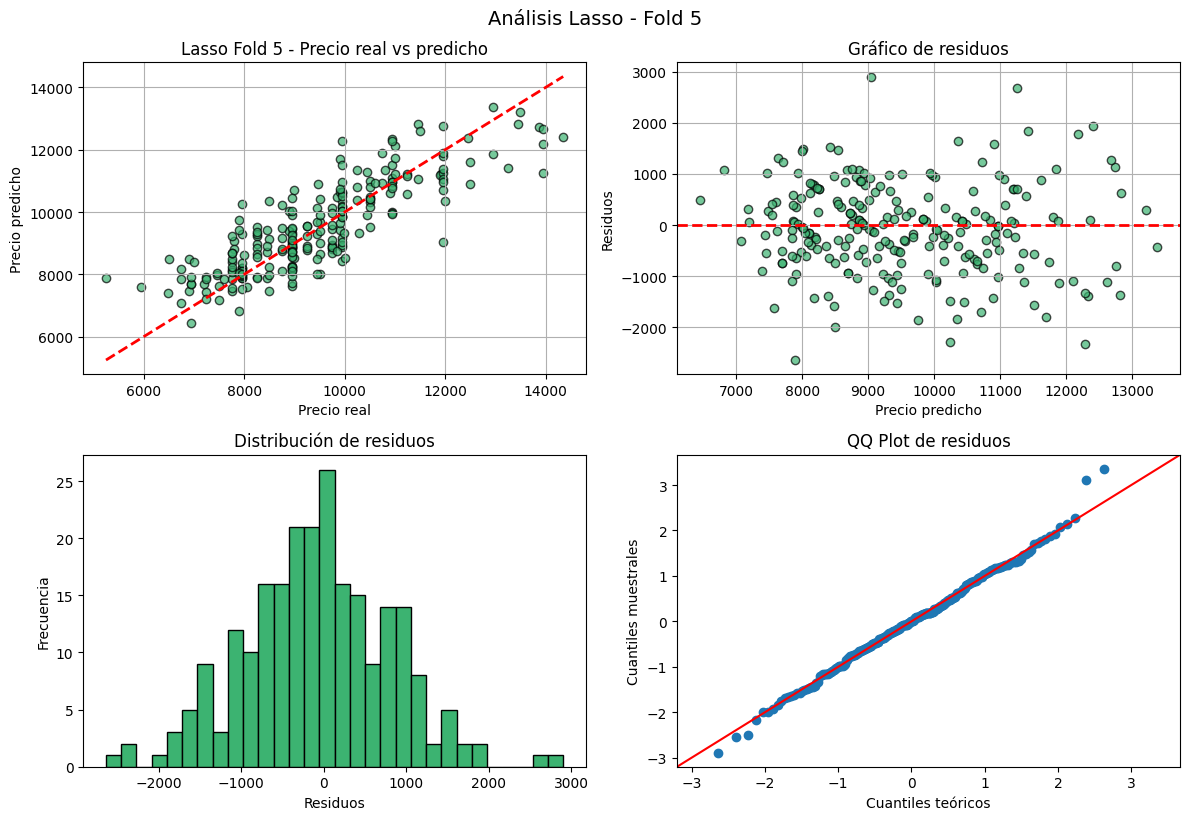


--- Resultados promedio en test (K-Fold) ---
MAE:  760.71
MSE:  947303.31
MAPE: 8.19%
R2:   0.7092


In [89]:

from sklearn.linear_model import LassoCV, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error

# Separar variables
x = df_toyota_lasso.drop(columns=['price'])
y = df_toyota_lasso['price']

# Escalado
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Buscar mejor alpha con LassoCV
lambdas = np.logspace(-1, 10, num=1000)
lasso_cv = LassoCV(alphas=lambdas, cv=5, random_state=42, max_iter=10000)
lasso_cv.fit(x_scaled, y)
best_alpha = lasso_cv.alpha_
print("Mejor lambda (alpha):", best_alpha)

# Validación con KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

fold = 1
mse_scores, mae_scores, mape_scores, r2_scores = [], [], [], []

for train_index, test_index in kf.split(x_scaled):
    x_train, x_test = x_scaled[train_index], x_scaled[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model = Lasso(alpha=best_alpha, max_iter=10000)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    # Guardar métricas
    mse_scores.append(mean_squared_error(y_test, y_pred))
    mae_scores.append(mean_absolute_error(y_test, y_pred))
    mape_scores.append(mean_absolute_percentage_error(y_test, y_pred))
    r2_scores.append(r2_score(y_test, y_pred))
    #mostrar un datadrame con el nombre de las variables y los coeficientes
    coef_df = pd.DataFrame({
        'Variable': x.columns,
        'Coeficiente': model.coef_
    })
    print(coef_df)
    # mostrar mse , mae , mape , r2
    print(f"MSE: {mse_scores[-1]:.4f}")
    print(f"MAE: {mae_scores[-1]:.4f}")
    print(f"MAPE: {mape_scores[-1]*100:.2f}%")
    print(f"R2: {r2_scores[-1]:.4f}")

    # Crear DataFrame de comparación
    comparacion = pd.DataFrame({
        'Precio real': y_test.values,
        'Precio predicho': y_pred,
        'Diferencia (Error)': y_test.values - y_pred
    })

    print(f"\nFold {fold} - Primeras filas:")
    print(comparacion.head(5))
    comparacion.to_csv(f'archivo_lasso_fold_{fold}.txt', sep='\t', index=False)

    # Graficar
    fig, axs = plt.subplots(2, 2, figsize=(12, 8))

    # Gráfico real vs predicho
    axs[0, 0].scatter(y_test, y_pred, color='mediumseagreen', alpha=0.7, edgecolors='k')
    axs[0, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    axs[0, 0].set_xlabel("Precio real")
    axs[0, 0].set_ylabel("Precio predicho")
    axs[0, 0].set_title(f"Lasso Fold {fold} - Precio real vs predicho")
    axs[0, 0].grid(True)

    # Gráfico de residuos
    resid = y_test - y_pred
    axs[0, 1].scatter(y_pred, resid, color='mediumseagreen', alpha=0.7, edgecolors='k')
    axs[0, 1].axhline(y=0, color='r', linestyle='--', lw=2)
    axs[0, 1].set_xlabel("Precio predicho")
    axs[0, 1].set_ylabel("Residuos")
    axs[0, 1].set_title("Gráfico de residuos")
    axs[0, 1].grid(True)

    # Histograma de residuos
    axs[1, 0].hist(resid, bins=30, color='mediumseagreen', edgecolor='k')
    axs[1, 0].set_xlabel("Residuos")
    axs[1, 0].set_ylabel("Frecuencia")
    axs[1, 0].set_title("Distribución de residuos")

    # QQ Plot de residuos
    sm.qqplot(resid, line='45', fit=True, ax=axs[1, 1])
    axs[1, 1].set_title("QQ Plot de residuos")
    axs[1, 1].set_xlabel("Cuantiles teóricos")
    axs[1, 1].set_ylabel("Cuantiles muestrales")

    plt.tight_layout()
    plt.suptitle(f'Análisis Lasso - Fold {fold}', fontsize=14, y=1.02)
    plt.show()

    fold += 1

# Mostrar métricas promedio
print("\n--- Resultados promedio en test (K-Fold) ---")
print(f"MAE:  {np.mean(mae_scores):.2f}")
print(f"MSE:  {np.mean(mse_scores):.2f}")
print(f"MAPE: {np.mean(mape_scores)*100:.2f}%")
print(f"R2:   {np.mean(r2_scores):.4f}")


# PCA

In [90]:
df_toyota_pca=df_toyota_limpio.copy()

# ahcer dummies a fuel_type_encoded
df_toyota_pca=pd.get_dummies(df_toyota_pca,columns=['fuel_type_encoded'])  

df_toyota_pca.columns


Index(['price', 'km', 'met_color', 'mfr_guarantee', 'bovag_guarantee', 'abs',
       'airco', 'cd_player', 'central_lock', 'radio', 'mistlamps',
       'sport_model', 'backseat_divider', 'metallic_rim', 'tow_bar',
       'age_08_04_calculada', 'fuel_type_encoded_0', 'fuel_type_encoded_1',
       'fuel_type_encoded_2'],
      dtype='object')

MSE (Error cuadrático medio): 910358.9375
R² (Coeficiente de determinación): 0.7259864807128906
MAE (Error absoluto medio): 753.1970825195312
MAPE (Error porcentual absoluto medio): 8.031371235847473
Número de componentes usados: 15


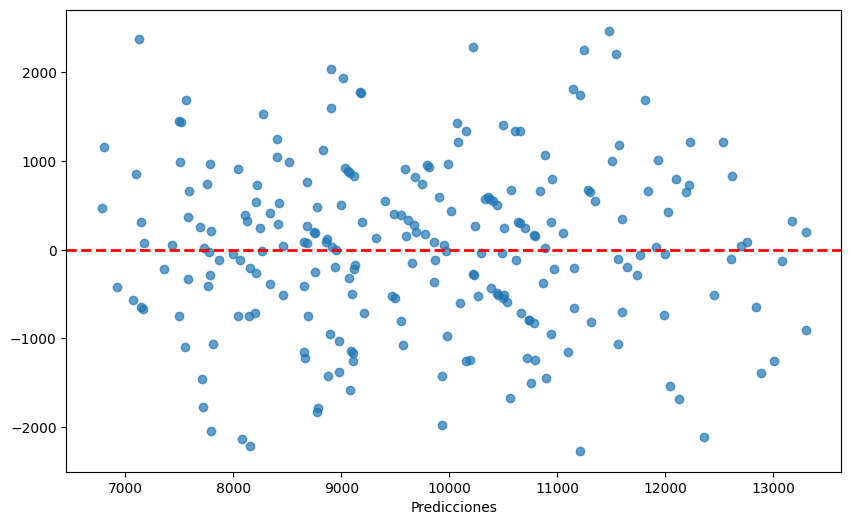

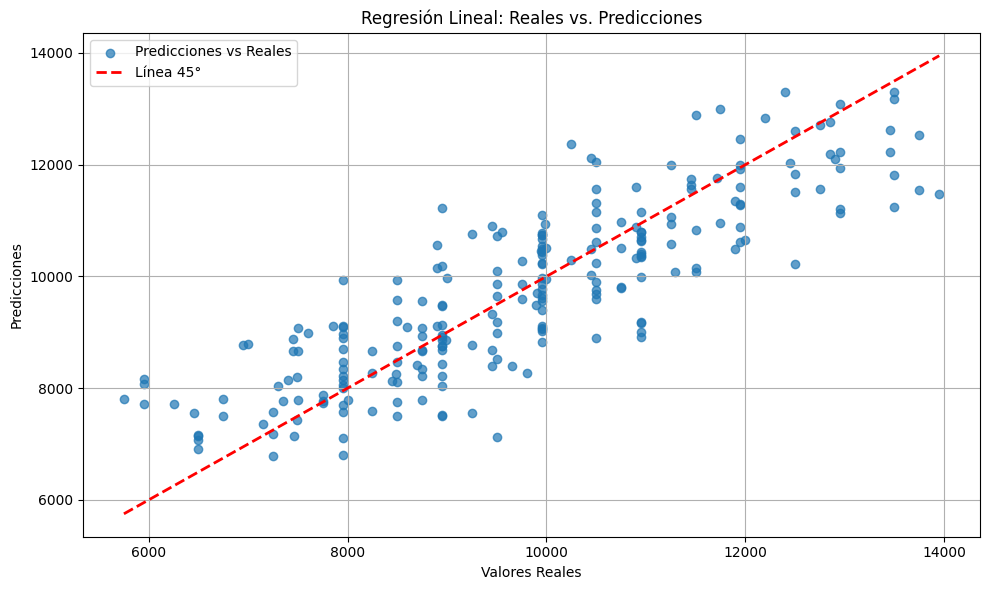

NameError: name 'stats' is not defined

<Figure size 1000x600 with 0 Axes>

In [91]:

from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score ,mean_absolute_error,mean_absolute_percentage_error
import pandas as pd
import numpy as np
X=df_toyota_pca.drop(columns=['price'])
y=df_toyota_pca['price']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- 5. Aplicar PCA (con n_components que explique 95% de la varianza) ---
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

# --- 6. Dividir en train y test ---
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# --- 7. Entrenar regresión lineal ---
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# --- 8. Predecir y evaluar ---
y_pred = modelo.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

# --- 9. Mostrar resultados ---
print("MSE (Error cuadrático medio):", mse)
print("R² (Coeficiente de determinación):", r2)
print("MAE (Error absoluto medio):", mae)
print("MAPE (Error porcentual absoluto medio):", mape*100)
print("Número de componentes usados:", pca.n_components_)


# grafico de residuos y los valores predichos
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, y_test - y_pred, alpha=0.7, label="Residuos vs Predicciones")
plt.axhline(y=0, color='r', linestyle='--', lw=2, label="Línea de Residuos = 0")
plt.xlabel("Predicciones")

# grafico de valores predichos vs valores reales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, label="Predicciones vs Reales")
limites = [min(y_test.min(), y_pred.min()), max(y_test.max(), y_pred.max())]
plt.plot(limites, limites, color='red', linestyle='--', linewidth=2, label='Línea 45°')
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.title("Regresión Lineal: Reales vs. Predicciones")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# qq plot de residuos
plt.figure(figsize=(10, 6))
stats.probplot(y_test - y_pred, dist="norm", plot=plt)
plt.title("QQ Plot de Residuos")
plt.show()

## histograma de residuos
plt.figure(figsize=(10, 6))
plt.hist(y_test - y_pred, bins=30, edgecolor='black')
plt.xlabel("Residuos")
plt.ylabel("Frecuencia")
plt.title("Histograma de Residuos")
plt.show()




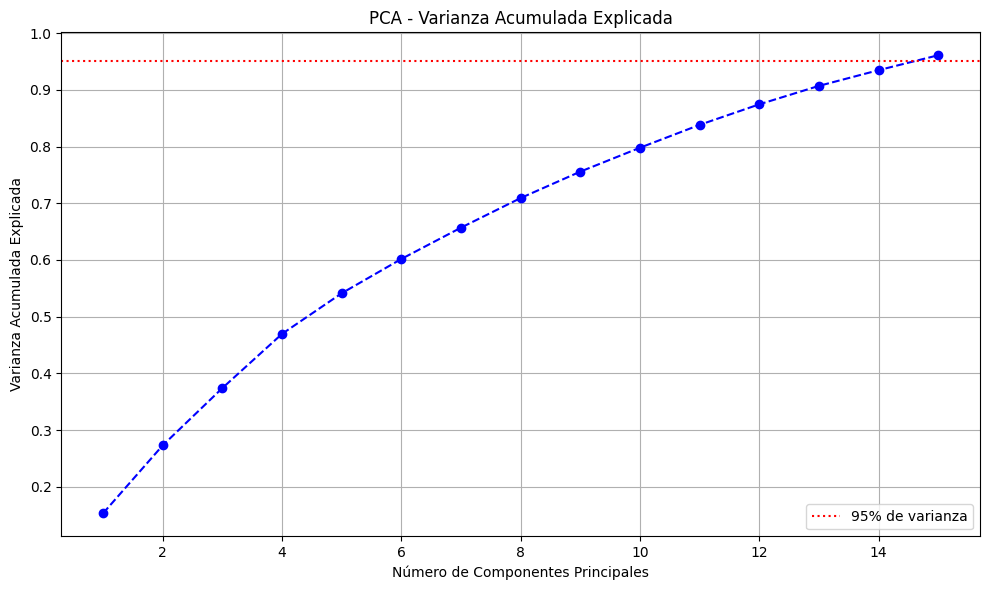

In [243]:
# --- Gráfico de varianza acumulada ---
varianza_acumulada = np.cumsum(pca.explained_variance_ratio_)
componentes = np.arange(1, len(varianza_acumulada) + 1)

plt.figure(figsize=(10, 6))
plt.plot(componentes, varianza_acumulada, marker='o', linestyle='--', color='b')
plt.axhline(y=0.95, color='r', linestyle=':', label='95% de varianza')
plt.xlabel("Número de Componentes Principales")
plt.ylabel("Varianza Acumulada Explicada")
plt.title("PCA - Varianza Acumulada Explicada")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


Mejor número de componentes: 18
Mejor R² promedio en CV: 0.3101


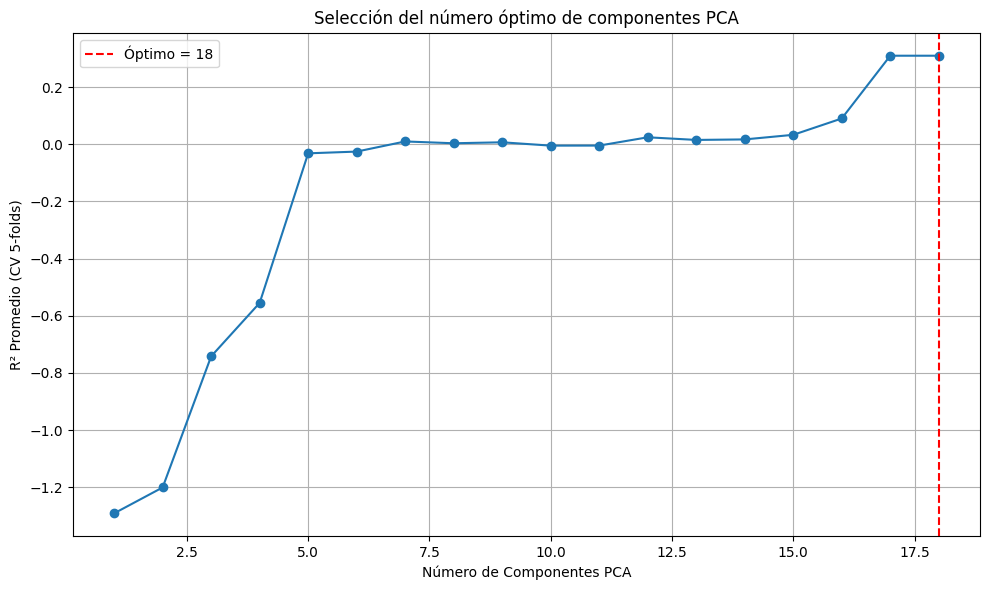

In [240]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import numpy as np

X = df_toyota_pca.drop(columns=['price'])
y = df_toyota_pca['price']

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Lista para guardar los resultados
componentes_range = range(1, X.shape[1] + 1)
scores = []

# Evaluar cada número de componentes
for n in componentes_range:
    pipeline = Pipeline([
        ('pca', PCA(n_components=n)),
        ('reg', LinearRegression())
    ])
    # Validación cruzada con 5 folds
    score = cross_val_score(pipeline, X_scaled, y, cv=5, scoring='r2')
    scores.append(score.mean())

# Convertir a array para facilitar búsqueda del mejor
scores = np.array(scores)
mejor_n = componentes_range[np.argmax(scores)]
mejor_score = scores.max()

# Mostrar resultados
print(f"Mejor número de componentes: {mejor_n}")
print(f"Mejor R² promedio en CV: {mejor_score:.4f}")

# Graficar resultados
plt.figure(figsize=(10, 6))
plt.plot(componentes_range, scores, marker='o')
plt.axvline(mejor_n, color='r', linestyle='--', label=f'Óptimo = {mejor_n}')
plt.xlabel("Número de Componentes PCA")
plt.ylabel("R² Promedio (CV 5-folds)")
plt.title("Selección del número óptimo de componentes PCA")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


# mio

In [219]:
prueba= df_toyota_ridge[['price','age_08_04_calculada']].copy()


# Convertir columnas en vectores unitarios (normalización L2 por columna)
def normalizar_vector_columna(columna):
    norma = np.linalg.norm(columna)
    if norma == 0:
        return columna  # evitar división por cero
    return columna / norma

# Aplicar normalización por columnas
prueba_unitario = prueba.apply(normalizar_vector_columna, axis=0)

import math
# tangente inversa
prueba_unitario['angulo_x']=np.degrees(np.arctan(prueba_unitario['age_08_04_calculada']/prueba_unitario['price']))

prueba_unitario

price  age_08_04_calculada   angulo_x
193   0.034755             0.018464  27.979751
194   0.039192             0.018937  25.789548
195   0.035347             0.017044  25.742573
196   0.035199             0.020358  30.043402
197   0.043629             0.017991  22.408936
...        ...                  ...        ...
1430  0.024994             0.037401  56.246358
1431  0.022184             0.032194  55.429715
1432  0.032078             0.033614  46.338985
1433  0.025142             0.033140  52.814092
1434  0.021445             0.032667  56.716499

[1177 rows x 3 columns]

In [220]:
prueba_unitario['angulo_x'].describe()

count    1177.000000
mean       44.787326
std        10.700675
min        20.776577
25%        37.047640
50%        46.536641
75%        53.449132
max        65.203982
Name: angulo_x, dtype: float64

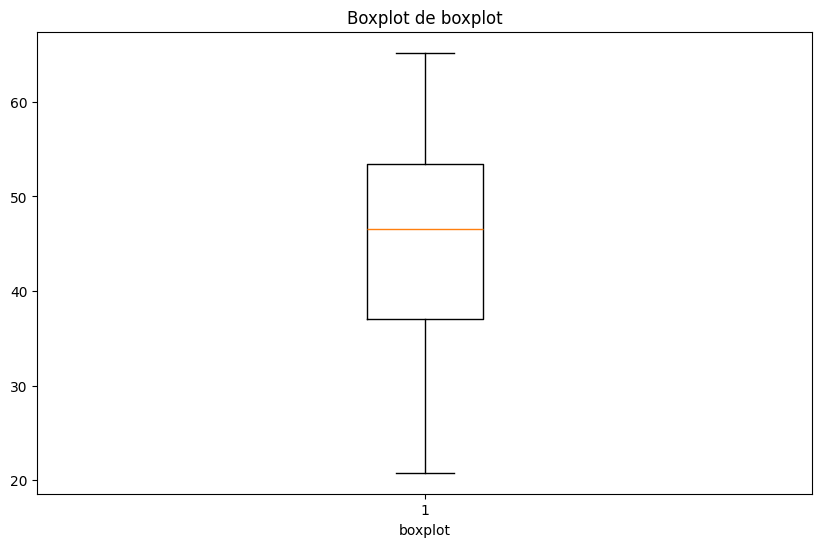

In [221]:
boxplot(prueba_unitario['angulo_x'])

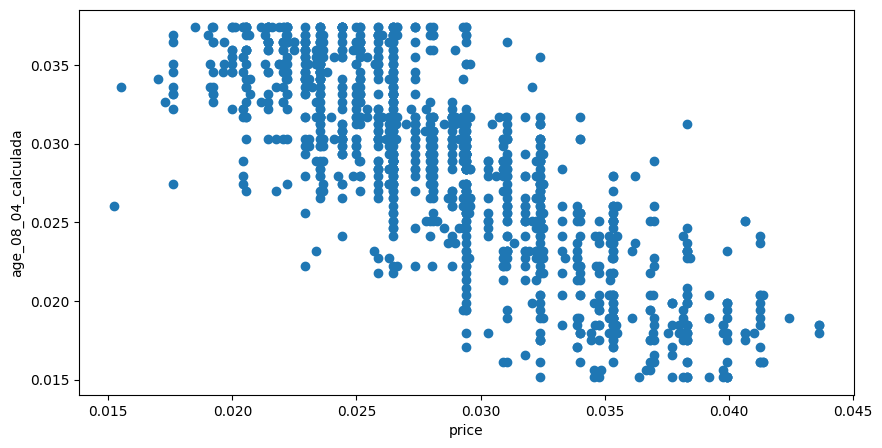

In [222]:
scatter_plot(prueba_unitario['price'],prueba_unitario['age_08_04_calculada'])

In [229]:
prueba_unitario['angulo_x'].describe()

count    1123.000000
mean       43.987362
std        10.294541
min        20.776577
25%        36.457427
50%        45.963767
75%        52.435769
max        59.984901
Name: angulo_x, dtype: float64

In [226]:
prueba_unitario

price  age_08_04_calculada   angulo_x
193   0.034755             0.018464  27.979751
194   0.039192             0.018937  25.789548
195   0.035347             0.017044  25.742573
196   0.035199             0.020358  30.043402
197   0.043629             0.017991  22.408936
...        ...                  ...        ...
1430  0.024994             0.037401  56.246358
1431  0.022184             0.032194  55.429715
1432  0.032078             0.033614  46.338985
1433  0.025142             0.033140  52.814092
1434  0.021445             0.032667  56.716499

[1123 rows x 3 columns]

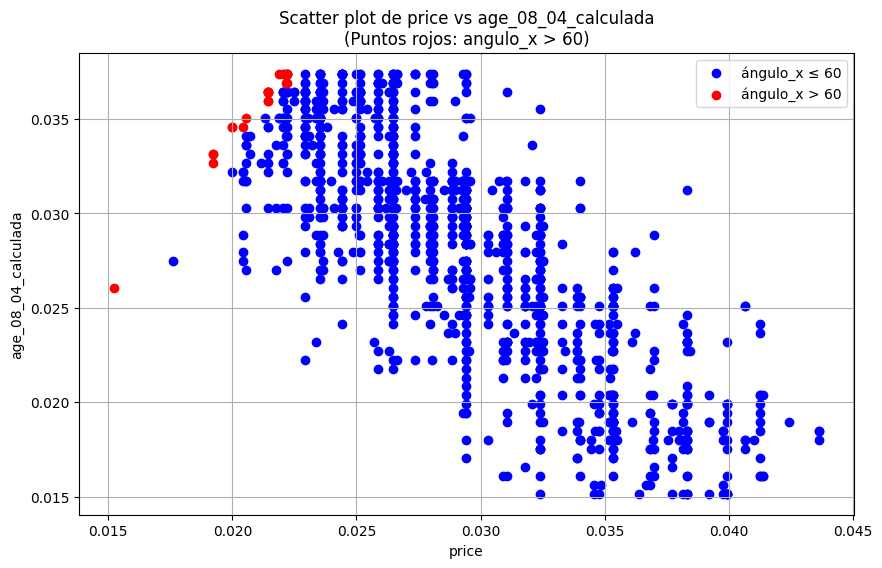

In [233]:
mask_rojo = prueba_unitario['angulo_x'] > 59

# Crear el gráfico
plt.figure(figsize=(10, 6))

# Puntos normales (en azul)
plt.scatter(
    prueba_unitario.loc[~mask_rojo, 'price'],
    prueba_unitario.loc[~mask_rojo, 'age_08_04_calculada'],
    color='blue',
    label='ángulo_x ≤ 60'
)

# Puntos con angulo_x > 60 (en rojo)
plt.scatter(
    prueba_unitario.loc[mask_rojo, 'price'],
    prueba_unitario.loc[mask_rojo, 'age_08_04_calculada'],
    color='red',
    label='ángulo_x > 60'
)

# Etiquetas y leyenda
plt.xlabel('price')
plt.ylabel('age_08_04_calculada')
plt.title('Scatter plot de price vs age_08_04_calculada\n(Puntos rojos: angulo_x > 60)')
plt.legend()
plt.grid(True)
plt.show()